In [1]:
import math
import pandas as pd
import numpy as np
from scipy.stats import norm

In [2]:
ace_list = {1:'depress', 2:'alcoabuse', 3:'drugabuse', 4:'prison',
            5:'patdivorce', 6:'phyabuse1', 7:'phyabuse2', 8:'verbalabuse',
            9:'sexabuse1', 10:'sexabuse2', 11:'sexabuse3', 12:'foodinsecure'} 

In [3]:
ace_list.values()

dict_values(['depress', 'alcoabuse', 'drugabuse', 'prison', 'patdivorce', 'phyabuse1', 'phyabuse2', 'verbalabuse', 'sexabuse1', 'sexabuse2', 'sexabuse3', 'foodinsecure'])

In [4]:
bfdata = pd.read_csv('SCBRFSS.csv', low_memory=False) # SCBRFSS data

In [5]:
bfdata.keys()

Index(['PHYSHLTH', 'MENTHLTH', 'POORHLTH', 'HLTHPLN1', 'PERSDOC2', 'MEDCOST',
       'CHECKUP1', 'EXERANY2', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3',
       'ASTHNOW', 'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD1', 'HAVARTH3', 'ADDEPEV2',
       'CHCKIDNY', 'DIABETE3', 'AGE', 'VETERAN3', 'MARITAL', 'CHILDREN',
       'EMPLOY1', 'CTYCODE1', 'RENTHOM1', 'SEX', 'PREGNANT', 'BLIND', 'DECIDE',
       'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'STOPSMK2', '_STSTR', '_RACE_G1',
       '_BMI5CAT', '_EDUCAG', '_INCOMG', '_SMOKER3', 'DRNKANY5', '_RFBING5',
       '_rfdrhv5', 'new_wt', 'depress', 'alcoabuse', 'drugabuse', 'prison',
       'patdivorce', 'phyabuse1', 'phyabuse2', 'verbalabuse', 'sexabuse1',
       'sexabuse2', 'sexabuse3', 'DEAF', '_ECIGSTS', 'rrclass',
       'rr_class_other', 'rrcognt', 'rratwork', 'rrhcare', 'rrphysym',
       'rremtsym', 'foodinsecure', 'homeless', 'ace_dentist', 'safehome',
       'HSgrad_mom', 'HSgrad_dad', 'singleparent', 'basicneeds'],
      dtype='object')

In [6]:
for ace in ace_list.values():
    print(ace, bfdata[ace].unique())

depress [nan  2.  1.  9.  7.]
alcoabuse [nan  2.  1.  7.  9.]
drugabuse [nan  2.  1.  7.  9.]
prison [nan  2.  1.  7.  9.]
patdivorce [nan  2.  1.  8.  7.  9.]
phyabuse1 [nan  1.  3.  9.  7.  2.]
phyabuse2 [nan  1.  3.  2.  9.  7.]
verbalabuse [nan  3.  1.  2.  7.  9.]
sexabuse1 [nan  1.  2.  7.  3.  9.]
sexabuse2 [nan  1.  2.  7.  3.  9.]
sexabuse3 [nan  1.  3.  2.  7.  9.]
foodinsecure [nan  1.  2.  9.  3.  5.  7.  4.]


In [7]:
bfdata[bfdata['patdivorce'] == 8]

PHYSHLTH  MENTHLTH  POORHLTH  HLTHPLN1  PERSDOC2  MEDCOST  CHECKUP1  \
170           5        88      88.0         1         3        2         1   
311          88        15       6.0         2         1        1         1   
333          30        77      77.0         1         1        2         1   
461           4        88      88.0         1         1        2         1   
495          23         7      21.0         1         1        1         1   
...         ...       ...       ...       ...       ...      ...       ...   
33680        88        88       NaN         1         1        2         2   
33695        88         5      88.0         1         1        2         3   
33714        88        88       NaN         1         1        2         1   
33757        88        88       NaN         1         1        2         1   
33811         5         6      30.0         2         1        1         3   

       EXERANY2  CVDINFR4  CVDCRHD4  ...  rrphysym  rremtsym  foodinsecure  \
170         1.0         2         2  ...       NaN       NaN           NaN   
311         1.0         2         2  ...       NaN       NaN           NaN   
333         2.0         2         1  ...       NaN       NaN           NaN   
461         1.0         2         2  ...       NaN       NaN           NaN   
495         2.0         2         2  ...       NaN       NaN           NaN   
...         ...       ...       ...  ...       ...       ...           ...   
33680       2.0         2         2  ...       2.0       2.0           2.0   
33695       1.0         2         2  ...       2.0       2.0           1.0   
33714       2.0         2         2  ...       2.0       2.0           1.0   
33757       1.0         2         2  ...       2.0       2.0           5.0   
33811       1.0         1         2  ...       2.0       2.0           1.0   

       homeless  ace_dentist  safehome  HSgrad_mom  HSgrad_dad  singleparent  \
170         NaN          NaN       NaN         NaN         NaN           NaN   
311         NaN          NaN       NaN         NaN         NaN           NaN   
333         NaN          NaN       NaN         NaN         NaN           NaN   
461         NaN          NaN       NaN         NaN         NaN           NaN   
495         NaN          NaN       NaN         NaN         NaN           NaN   
...         ...          ...       ...         ...         ...           ...   
33680       2.0          1.0       5.0         7.0         2.0           5.0   
33695       1.0          1.0       4.0         1.0         2.0           5.0   
33714       1.0          7.0       5.0         1.0         1.0           2.0   
33757       1.0          1.0       1.0         1.0         7.0           4.0   
33811       1.0          1.0       5.0         2.0         7.0           5.0   

       basicneeds  
170           NaN  
311           NaN  
333           NaN  
461           NaN  
495           NaN  
...           ...  
33680         4.0  
33695         5.0  
33714         5.0  
33757         5.0  
33811         5.0  

[560 rows x 73 columns]

In [8]:
bfdata['_INCOMG'].unique()

array([5, 4, 9, 2, 3, 1])

In [9]:
bfdata['_RACE_G1'].unique()

array([ 3.,  2.,  5.,  1., nan,  4.])

In [10]:
race_list = {1:'White', 2:'Black', 3:'Hispanic', 4:'Other', 5:'Multi'}

In [11]:
income_list = {1:'< 15000', 2:'15000 - 24999', 3:'25000 - 34999', 
               4:'35000 - 49999', 5:'50000 +', 9:'Don\'t Know'}

In [12]:
w_15 = bfdata[(bfdata[['_RACE_G1', '_INCOMG']] == [1,1]).all(axis=1)]
w_15 = w_15[w_15['depress'].isin([1,2])]
w_15

PHYSHLTH  MENTHLTH  POORHLTH  HLTHPLN1  PERSDOC2  MEDCOST  CHECKUP1  \
154          88        88       NaN         2         3        2         1   
163          30        30      88.0         1         1        2         1   
187          88         2      88.0         1         1        2         1   
220          30        30      88.0         1         1        2         1   
227           3        15      15.0         1         1        2         3   
...         ...       ...       ...       ...       ...      ...       ...   
33729         5        88       2.0         1         2        2         1   
33730        88        88       NaN         1         1        1         2   
33735        99        88      30.0         1         1        2         1   
33813        30        30      24.0         1         1        1         2   
33815        30        10      30.0         1         2        2         1   

       EXERANY2  CVDINFR4  CVDCRHD4  ...  rrphysym  rremtsym  foodinsecure  \
154         1.0         2         2  ...       NaN       NaN           NaN   
163         2.0         1         1  ...       NaN       NaN           NaN   
187         1.0         2         2  ...       NaN       NaN           NaN   
220         1.0         2         2  ...       NaN       NaN           NaN   
227         1.0         2         2  ...       NaN       NaN           NaN   
...         ...       ...       ...  ...       ...       ...           ...   
33729       1.0         2         2  ...       2.0       2.0           1.0   
33730       2.0         2         2  ...       2.0       2.0           1.0   
33735       1.0         2         2  ...       2.0       2.0           1.0   
33813       2.0         2         2  ...       2.0       1.0           3.0   
33815       2.0         2         2  ...       2.0       2.0           1.0   

       homeless  ace_dentist  safehome  HSgrad_mom  HSgrad_dad  singleparent  \
154         NaN          NaN       NaN         NaN         NaN           NaN   
163         NaN          NaN       NaN         NaN         NaN           NaN   
187         NaN          NaN       NaN         NaN         NaN           NaN   
220         NaN          NaN       NaN         NaN         NaN           NaN   
227         NaN          NaN       NaN         NaN         NaN           NaN   
...         ...          ...       ...         ...         ...           ...   
33729       1.0          1.0       5.0         1.0         1.0           1.0   
33730       1.0          8.0       5.0         1.0         1.0           1.0   
33735       1.0          3.0       5.0         1.0         2.0           1.0   
33813       3.0          2.0       4.0         1.0         1.0           4.0   
33815       1.0          3.0       5.0         2.0         2.0           1.0   

       basicneeds  
154           NaN  
163           NaN  
187           NaN  
220           NaN  
227           NaN  
...           ...  
33729         5.0  
33730         5.0  
33735         5.0  
33813         5.0  
33815         5.0  

[1384 rows x 73 columns]

#### Distribution

##### ACE group 1
depress, alcoabuse, drugabuse, prison, patdivorce

BRFSS Code

    1 -> Yes
    2 -> No
    7,9,NaN -> . (unknown)
    
##### ACE group 2
phyabuse1, phyabuse2, verbalabuse, sexabuse1, sexabuse2, sexabuse3

BRFSS Code

    2,3 -> Yes (3: more than one time, count as one)
    1 -> No
    7,9,NaN -> . (unknown)
    
##### ACE group 3
foodinsecure

BRFSS Code 

    2,3,4,5 -> Yes
    1 -> No
    7,9,NaN -> . (unknown)
      
##### Proportion, standard error and confidence interval
k <- number of Yes

n <- number of all except unknown

$$ prop = \frac{k}{n} $$

$$ se = \sqrt{\frac{prop \times (1-prop)}{n}} $$

$$ ci_l = prop - norm.ppf(0.975) \times se $$

$$ ci_u = prop + norm.ppf(0.975) \times se $$

In [13]:
prop = (w_15['depress'] == 1).sum()/len(w_15); prop

0.21170520231213874

In [14]:
(w_15['depress'] == 1).sum()

293

In [15]:
(w_15['depress'] == 2).sum()

1091

In [16]:
# w_15['depress'].sem(ddof=0)
se = math.sqrt(prop*(1-prop)/len(w_15)); se

0.010981004013833038

In [17]:
prop + norm.ppf(0.975) * se

0.23322757469334127

In [18]:
prop - norm.ppf(0.975) * se

0.19018282993093621

In [19]:
ace_list.values()

dict_values(['depress', 'alcoabuse', 'drugabuse', 'prison', 'patdivorce', 'phyabuse1', 'phyabuse2', 'verbalabuse', 'sexabuse1', 'sexabuse2', 'sexabuse3', 'foodinsecure'])

In [20]:
groupa = list(ace_list.values())[0:5]
groupb = list(ace_list.values())[5:-1]
groupc = list(ace_list.values())[-1]

In [21]:
def get_dist(gpdata, ace_type):
    
    if ace_type in groupa:
        dlen = (gpdata[ace_type].isin([1,2])).sum()
        prop = (gpdata[ace_type] == 1).sum()/dlen
        
    elif ace_type in groupb:
        dlen = (gpdata[ace_type].isin([1,2,3])).sum()
        prop = (gpdata[ace_type].isin([2,3])).sum()/dlen
    
    else:
        dlen = (gpdata[ace_type].isin([1,2,3,4,5])).sum()
        prop = (gpdata[ace_type].isin([2,3,4,5])).sum()/dlen
        
    se = math.sqrt(prop*(1-prop)/dlen)
    return [prop, se, prop - norm.ppf(0.975) * se, prop + norm.ppf(0.975)* se]

In [22]:
res_index = [[], [], []]
res_dist = []
for ace in ace_list.values():
    for r in race_list.keys():
        for i in income_list.keys():
            gpdata = bfdata[(bfdata[['_RACE_G1', '_INCOMG']] == [r,i]).all(axis=1)]
            # print([r,i], len(gpdata), get_dist(gpdata, ace))
            res_dist.append(get_dist(gpdata, ace))
            res_index[0].append(ace)
            res_index[1].append(race_list[r])
            res_index[2].append(income_list[i])
# print(res_index)

In [23]:
brfss_dist = pd.DataFrame(res_dist, columns=['Proportion', 'Standard Error', 
                                     'L 95% CI', 'U 95% CI'], index=res_index)
brfss_dist # distribution of 12 aces in different (race, income) group

Proportion  Standard Error  L 95% CI  \
depress      White < 15000          0.211705        0.010981  0.190183   
                   15000 - 24999    0.163790        0.007248  0.149584   
                   25000 - 34999    0.146769        0.008281  0.130538   
                   35000 - 49999    0.153333        0.006934  0.139743   
                   50000 +          0.141829        0.003853  0.134278   
...                                      ...             ...       ...   
foodinsecure Multi 15000 - 24999    0.291667        0.053567  0.186678   
                   25000 - 34999    0.146341        0.055199  0.038153   
                   35000 - 49999    0.254902        0.061025  0.135295   
                   50000 +          0.237624        0.042352  0.154616   
                   Don't Know       0.327869        0.060105  0.210065   

                                  U 95% CI  
depress      White < 15000        0.233228  
                   15000 - 24999  0.177996  
                   25000 - 34999  0.163000  
                   35000 - 49999  0.166924  
                   50000 +        0.149380  
...                                    ...  
foodinsecure Multi 15000 - 24999  0.396656  
                   25000 - 34999  0.254530  
                   35000 - 49999  0.374509  
                   50000 +        0.320631  
                   Don't Know     0.445673  

[360 rows x 4 columns]

In [24]:
brfss_dist.loc['depress'] # distribution of ace depress on the SCBRFSS

Proportion  Standard Error  L 95% CI  U 95% CI
White    < 15000          0.211705        0.010981  0.190183  0.233228
         15000 - 24999    0.163790        0.007248  0.149584  0.177996
         25000 - 34999    0.146769        0.008281  0.130538  0.163000
         35000 - 49999    0.153333        0.006934  0.139743  0.166924
         50000 +          0.141829        0.003853  0.134278  0.149380
         Don't Know       0.108592        0.005560  0.097694  0.119489
Black    < 15000          0.083449        0.007293  0.069155  0.097743
         15000 - 24999    0.079953        0.006576  0.067064  0.092842
         25000 - 34999    0.073341        0.008895  0.055908  0.090775
         35000 - 49999    0.067715        0.008737  0.050590  0.084839
         50000 +          0.084615        0.007719  0.069487  0.099744
         Don't Know       0.060660        0.007130  0.046687  0.074634
Hispanic < 15000          0.174603        0.047829  0.080861  0.268345
         15000 - 24999    0.076336        0.023200  0.030865  0.121807
         25000 - 34999    0.138889        0.040757  0.059008  0.218770
         35000 - 49999    0.090909        0.035386  0.021553  0.160265
         50000 +          0.190141        0.032930  0.125598  0.254683
         Don't Know       0.216216        0.047855  0.122422  0.310010
Other    < 15000          0.250000        0.052511  0.147081  0.352919
         15000 - 24999    0.178571        0.041788  0.096669  0.260474
         25000 - 34999    0.203390        0.052404  0.100681  0.306099
         35000 - 49999    0.183673        0.055317  0.075255  0.292092
         50000 +          0.095890        0.024368  0.048130  0.143651
         Don't Know       0.128205        0.037854  0.054013  0.202398
Multi    < 15000          0.263889        0.051942  0.162085  0.365693
         15000 - 24999    0.285714        0.044087  0.199306  0.372123
         25000 - 34999    0.352941        0.066917  0.221786  0.484097
         35000 - 49999    0.178571        0.041788  0.096669  0.260474
         50000 +          0.269231        0.038903  0.192983  0.345479
         Don't Know       0.226667        0.048344  0.131913  0.321420

In [25]:
brfss_dist.index

MultiIndex([(     'depress', 'White',       '< 15000'),
            (     'depress', 'White', '15000 - 24999'),
            (     'depress', 'White', '25000 - 34999'),
            (     'depress', 'White', '35000 - 49999'),
            (     'depress', 'White',       '50000 +'),
            (     'depress', 'White',    'Don't Know'),
            (     'depress', 'Black',       '< 15000'),
            (     'depress', 'Black', '15000 - 24999'),
            (     'depress', 'Black', '25000 - 34999'),
            (     'depress', 'Black', '35000 - 49999'),
            ...
            ('foodinsecure', 'Other', '25000 - 34999'),
            ('foodinsecure', 'Other', '35000 - 49999'),
            ('foodinsecure', 'Other',       '50000 +'),
            ('foodinsecure', 'Other',    'Don't Know'),
            ('foodinsecure', 'Multi',       '< 15000'),
            ('foodinsecure', 'Multi', '15000 - 24999'),
            ('foodinsecure', 'Multi', '25000 - 34999'),
            ('foodinsecure', 'Mu

In [26]:
brfss_dist.sort_index().loc['depress', race_list[1], income_list[1]] # the proportion of depress in the group (White, income < 15000)

Proportion        0.211705
Standard Error    0.010981
L 95% CI          0.190183
U 95% CI          0.233228
Name: (depress, White, < 15000), dtype: float64

In [27]:
# generate combinations of aces
def comb(l, n):
    res = []
    if n <= 0:
        return [[]]
    if n > len(l):
        return comb(l, len(l))
    for i in range(len(l) - n + 1):
        res += [[l[i]] + x for x in comb(l[i+1:], n - 1)]
    return res

In [28]:
ace_list

{1: 'depress',
 2: 'alcoabuse',
 3: 'drugabuse',
 4: 'prison',
 5: 'patdivorce',
 6: 'phyabuse1',
 7: 'phyabuse2',
 8: 'verbalabuse',
 9: 'sexabuse1',
 10: 'sexabuse2',
 11: 'sexabuse3',
 12: 'foodinsecure'}

In [29]:
two_ace_comb = comb(list(ace_list.values()), 2)

thre_ace_comb = comb(list(ace_list.values()), 3)
four_ace_comb = comb(list(ace_list.values()), 4)
five_ace_comb = comb(list(ace_list.values()), 5)

In [30]:
len(two_ace_comb)

66

In [31]:
two_ace_comb[0]

['depress', 'alcoabuse']

In [32]:
bf_uni_code = (bfdata[['_RACE_G1', '_INCOMG'] + list(ace_list.values())]).copy() # keep only the values needed, and copy them to a new df

In [33]:
bf_uni_code

_RACE_G1  _INCOMG  depress  alcoabuse  drugabuse  prison  patdivorce  \
0           3.0        5      NaN        NaN        NaN     NaN         NaN   
1           2.0        5      NaN        NaN        NaN     NaN         NaN   
2           3.0        5      NaN        NaN        NaN     NaN         NaN   
3           5.0        4      NaN        NaN        NaN     NaN         NaN   
4           5.0        9      NaN        NaN        NaN     NaN         NaN   
...         ...      ...      ...        ...        ...     ...         ...   
45176       1.0        5      NaN        NaN        NaN     NaN         NaN   
45177       1.0        9      NaN        NaN        NaN     NaN         NaN   
45178       3.0        5      NaN        NaN        NaN     NaN         NaN   
45179       3.0        5      NaN        NaN        NaN     NaN         NaN   
45180       1.0        1      NaN        NaN        NaN     NaN         NaN   

       phyabuse1  phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
0            NaN        NaN          NaN        NaN        NaN        NaN   
1            NaN        NaN          NaN        NaN        NaN        NaN   
2            NaN        NaN          NaN        NaN        NaN        NaN   
3            NaN        NaN          NaN        NaN        NaN        NaN   
4            NaN        NaN          NaN        NaN        NaN        NaN   
...          ...        ...          ...        ...        ...        ...   
45176        NaN        NaN          NaN        NaN        NaN        NaN   
45177        NaN        NaN          NaN        NaN        NaN        NaN   
45178        NaN        NaN          NaN        NaN        NaN        NaN   
45179        NaN        NaN          NaN        NaN        NaN        NaN   
45180        NaN        NaN          NaN        NaN        NaN        NaN   

       foodinsecure  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  
...             ...  
45176           NaN  
45177           NaN  
45178           NaN  
45179           NaN  
45180           NaN  

[45181 rows x 14 columns]

In [34]:
# cast the aces code in brfss, ori_code to 0 -> No, 1 -> Yes
def cat_code(ori_code, *args):
    # print(args)
    if pd.isna(ori_code):
        return ori_code

    if (args[0] in groupa and ori_code == 2) or \
        (args[0] in groupb and ori_code == 1) or \
        (args[0] in groupc and ori_code == 1):
        return 0
    if (args[0] in groupa and ori_code == 1) or \
        (args[0] in groupb and ori_code in [2,3]) or \
        (args[0] in groupc and ori_code in [2,3,4,5]):
        return 1    
    return np.NaN

In [35]:
# use cat_code to translate the scbrfss code in bf_uni_code to 0, 1
for ace in ace_list.values():
    bf_uni_code[ace] = bf_uni_code[ace].apply(cat_code, args=(ace,))

In [36]:
bf_uni_code

_RACE_G1  _INCOMG  depress  alcoabuse  drugabuse  prison  patdivorce  \
0           3.0        5      NaN        NaN        NaN     NaN         NaN   
1           2.0        5      NaN        NaN        NaN     NaN         NaN   
2           3.0        5      NaN        NaN        NaN     NaN         NaN   
3           5.0        4      NaN        NaN        NaN     NaN         NaN   
4           5.0        9      NaN        NaN        NaN     NaN         NaN   
...         ...      ...      ...        ...        ...     ...         ...   
45176       1.0        5      NaN        NaN        NaN     NaN         NaN   
45177       1.0        9      NaN        NaN        NaN     NaN         NaN   
45178       3.0        5      NaN        NaN        NaN     NaN         NaN   
45179       3.0        5      NaN        NaN        NaN     NaN         NaN   
45180       1.0        1      NaN        NaN        NaN     NaN         NaN   

       phyabuse1  phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
0            NaN        NaN          NaN        NaN        NaN        NaN   
1            NaN        NaN          NaN        NaN        NaN        NaN   
2            NaN        NaN          NaN        NaN        NaN        NaN   
3            NaN        NaN          NaN        NaN        NaN        NaN   
4            NaN        NaN          NaN        NaN        NaN        NaN   
...          ...        ...          ...        ...        ...        ...   
45176        NaN        NaN          NaN        NaN        NaN        NaN   
45177        NaN        NaN          NaN        NaN        NaN        NaN   
45178        NaN        NaN          NaN        NaN        NaN        NaN   
45179        NaN        NaN          NaN        NaN        NaN        NaN   
45180        NaN        NaN          NaN        NaN        NaN        NaN   

       foodinsecure  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  
...             ...  
45176           NaN  
45177           NaN  
45178           NaN  
45179           NaN  
45180           NaN  

[45181 rows x 14 columns]

#### Distribution of single ace

In [37]:
# calculate the proportion and se of an ace, ace_data is one of the ace columns in bf_uni_code 
def cal_dist(ace_data):
    
    dlen = (ace_data.isin([0,1])).sum()
    prop = (ace_data == 1).sum()/dlen
        
    se = math.sqrt(prop*(1-prop)/dlen)
    return [prop, se, prop - norm.ppf(0.975) * se, prop + norm.ppf(0.975)* se]

In [38]:
res_index = [[], [], []]
res_dist = []
for ace in ace_list.values():
    for r in race_list.keys():
        for i in income_list.keys():
            gpdata = bf_uni_code[(bf_uni_code[['_RACE_G1', '_INCOMG']] == [r,i]).all(axis=1)]
            # print([r,i], len(gpdata), get_dist(gpdata, ace))
            res_dist.append(cal_dist(gpdata[ace]))
            res_index[0].append(ace)
            res_index[1].append(race_list[r])
            res_index[2].append(income_list[i])
# print(res_index)

In [39]:
single_ace_dist = pd.DataFrame(res_dist, index = res_index, columns = ['Proportion','Standard Error','L 95% CI', 'U 95% CI'])
single_ace_dist

Proportion  Standard Error  L 95% CI  \
depress      White < 15000          0.211705        0.010981  0.190183   
                   15000 - 24999    0.163790        0.007248  0.149584   
                   25000 - 34999    0.146769        0.008281  0.130538   
                   35000 - 49999    0.153333        0.006934  0.139743   
                   50000 +          0.141829        0.003853  0.134278   
...                                      ...             ...       ...   
foodinsecure Multi 15000 - 24999    0.291667        0.053567  0.186678   
                   25000 - 34999    0.146341        0.055199  0.038153   
                   35000 - 49999    0.254902        0.061025  0.135295   
                   50000 +          0.237624        0.042352  0.154616   
                   Don't Know       0.327869        0.060105  0.210065   

                                  U 95% CI  
depress      White < 15000        0.233228  
                   15000 - 24999  0.177996  
                   25000 - 34999  0.163000  
                   35000 - 49999  0.166924  
                   50000 +        0.149380  
...                                    ...  
foodinsecure Multi 15000 - 24999  0.396656  
                   25000 - 34999  0.254530  
                   35000 - 49999  0.374509  
                   50000 +        0.320631  
                   Don't Know     0.445673  

[360 rows x 4 columns]

#### Calculate distribution without group

calculate the proportion of each ace and each ace combination 
in the SCBRFSS data. 

The proportion is based on all children 
without race/income seperating

For example:

|depress |alcoabuse |
|--------|----------|
|0|1|
|0|0|
|1|1|
|1|0|
|1|1|
|1|0|
|NaN|0|

==> 

k = 2 (ones with double 1)

n = 6 (all except NaN)

prop = k/n = 1/3

In [72]:
wog_index = [[], []]
wog_res = []
for i in range(1, 4):
    print(i)
    sub_index = 0
    for aces in comb(list(ace_list.values()), i):        
        mt_ace = bf_uni_code[aces]
        k = (mt_ace == 1).all(axis = 1).sum()
        n = (mt_ace.isin([0,1])).all(axis = 1).sum()
        if n == 0:
            print(aces)
        print('{: <40}\t{}\t{}\t{:.6f}'.format(str(aces), k, n, k/n))
        wog_res.append([str(aces), k, n, k/n])
        wog_index[0].append(i)
        wog_index[1].append(sub_index)
        sub_index += 1
wog_dist = pd.DataFrame(wog_res, index = wog_index, columns=['ace(s)', 'k', 'n', 'prop'])        

1
['depress']                             	3815	29347	0.129996
['alcoabuse']                           	6686	29432	0.227168
['drugabuse']                           	2230	29473	0.075662
['prison']                              	1792	29510	0.060725
['patdivorce']                          	6864	28779	0.238507
['phyabuse1']                           	4909	29032	0.169089
['phyabuse2']                           	3548	29338	0.120935
['verbalabuse']                         	7721	29064	0.265655
['sexabuse1']                           	2861	29184	0.098033
['sexabuse2']                           	1978	29210	0.067717
['sexabuse3']                           	1245	29232	0.042590
['foodinsecure']                        	3001	19528	0.153677
2
['depress', 'alcoabuse']                	1976	29201	0.067669
['depress', 'drugabuse']                	1097	29234	0.037525
['depress', 'prison']                   	671	29265	0.022928
['depress', 'patdivorce']               	1545	28548	0.054119
['depress', 'phyabuse

In [73]:
wog_dist

ace(s)     k      n      prop
1 0                                     ['depress']  3815  29347  0.129996
  1                                   ['alcoabuse']  6686  29432  0.227168
  2                                   ['drugabuse']  2230  29473  0.075662
  3                                      ['prison']  1792  29510  0.060725
  4                                  ['patdivorce']  6864  28779  0.238507
...                                             ...   ...    ...       ...
3 215  ['verbalabuse', 'sexabuse3', 'foodinsecure']   146   9594  0.015218
  216       ['sexabuse1', 'sexabuse2', 'sexabuse3']   838  28998  0.028899
  217    ['sexabuse1', 'sexabuse2', 'foodinsecure']   210   9671  0.021714
  218    ['sexabuse1', 'sexabuse3', 'foodinsecure']   162   9670  0.016753
  219    ['sexabuse2', 'sexabuse3', 'foodinsecure']   138   9685  0.014249

[298 rows x 4 columns]

#### Distributions of different ace combination

In [42]:
comb_list = {}
for i in range(1,12):
    comb_list[i] = comb(list(ace_list.values()), i)

In [43]:
# calculate proportion and se of multiple aces combination
def multi_dist(gpdata, aces):
    
    dlen = (gpdata[aces].isin([0,1])).all(axis = 1).sum()
    prop = (gpdata[aces] == 1).all(axis = 1).sum()/dlen
        
    se = math.sqrt(prop*(1-prop)/dlen)
    return [prop, se, prop - norm.ppf(0.975) * se, prop + norm.ppf(0.975)* se]

In [44]:
aces_dist_code = {}
result = []
res_index = [[], [], []]
res_dist = []
counter = 1
for t in range(1,12):
    res_index = [[], [], []]
    res_dist = []
    for aces in comb_list[t]:
        aces_dist_code[str(aces)] = counter    
        for r in race_list.keys():
            for i in income_list.keys():
                gpdata = bf_uni_code[(bf_uni_code[['_RACE_G1', '_INCOMG']] == [r,i]).all(axis=1)]
                # print([r,i], len(gpdata), get_dist(gpdata, ace))
                res_dist.append(multi_dist(gpdata, aces))
                res_index[0].append(counter)
                res_index[1].append(race_list[r])
                res_index[2].append(income_list[i])
        counter += 1
    multi_ace_dist = pd.DataFrame(res_dist, columns=['Proportion', 'Standard Error', 
                                   'L 95% CI', 'U 95% CI'], index=res_index)
    result.append(multi_ace_dist)
    # print(res_index)

In [45]:
counter = 1
aces_dist_code_r = {}
for t in range(1,12):
    for aces in comb_list[t]:
        aces_dist_code_r[counter] = aces
        counter += 1

In [46]:
f_dist = result[1]

In [47]:
f_dist

Proportion  Standard Error  L 95% CI  U 95% CI
13 White < 15000          0.135606        0.009220  0.117535  0.153676
         15000 - 24999    0.087476        0.005546  0.076606  0.098346
         25000 - 34999    0.075866        0.006208  0.063698  0.088034
         35000 - 49999    0.082095        0.005291  0.071725  0.092465
         50000 +          0.066235        0.002749  0.060847  0.071623
...                            ...             ...       ...       ...
78 Multi 15000 - 24999    0.060606        0.041536 -0.020803  0.142015
         25000 - 34999    0.050000        0.048734 -0.045517  0.145517
         35000 - 49999    0.000000        0.000000  0.000000  0.000000
         50000 +          0.033333        0.023174 -0.012087  0.078754
         Don't Know       0.034483        0.033883 -0.031927  0.100892

[1980 rows x 4 columns]

In [48]:
aces_dist_code_r[13]

['depress', 'alcoabuse']

##### Count the proportion value of different ace combination

In [49]:
mean_list = []
r_index = [[], []]
for i in f_dist.index.get_level_values(0).unique():
    tmp = f_dist.loc[i]['Proportion']
    ace_comb = aces_dist_code_r[i]
    r_index[0].append(ace_comb[0])
    r_index[1].append(ace_comb[1])
    mean_list.append([tmp.mean(), tmp.max(), tmp.min(), tmp.sem(ddof = 0)])

sta_df = pd.DataFrame(mean_list, index = r_index, columns = ['mean', 'max', 'min', 'se'])

In [50]:
sta_df

mean       max       min        se
depress   alcoabuse     0.093439  0.228571  0.029946  0.008925
          drugabuse     0.064368  0.196078  0.013699  0.008254
          prison        0.040684  0.123810  0.012528  0.005170
          patdivorce    0.076621  0.178082  0.023438  0.007455
          phyabuse1     0.082465  0.205882  0.015504  0.008487
...                          ...       ...       ...       ...
sexabuse1 sexabuse3     0.058678  0.180328  0.000000  0.007373
          foodinsecure  0.056212  0.333333  0.000000  0.012472
sexabuse2 sexabuse3     0.049418  0.177419  0.000000  0.006752
          foodinsecure  0.048482  0.222222  0.000000  0.009812
sexabuse3 foodinsecure  0.040241  0.222222  0.000000  0.008103

[66 rows x 4 columns]

#### Distribution of single ace in each age level

Find out the distribution of aces in different age level

The data in BRFSS doesn't have enough information about age group

In [51]:
print(sorted(bfdata['AGE'].unique()))

[7, 9, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [52]:
(bf_uni_code[['depress', 'depress']]==1).all(axis=1).sum()

3815

In [53]:
(bf_uni_code['depress'] == 1).sum()

3815

In [54]:
ace_list.values()

dict_values(['depress', 'alcoabuse', 'drugabuse', 'prison', 'patdivorce', 'phyabuse1', 'phyabuse2', 'verbalabuse', 'sexabuse1', 'sexabuse2', 'sexabuse3', 'foodinsecure'])

In [55]:
co_rel_matrix = []

for ace1 in ace_list.values():
    two_dist = [multi_dist(bf_uni_code, [ace1, ace2])[0] for ace2 in ace_list.values()]    
    co_rel_matrix.append(two_dist)
co_rel_matrix = pd.DataFrame(co_rel_matrix, index = list(ace_list.values()), columns = list(ace_list.values()))
co_rel_matrix

depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       0.129996   0.067669   0.037525  0.022928    0.054119   0.052518   
alcoabuse     0.067669   0.227168   0.049332  0.038414    0.090452   0.096813   
drugabuse     0.037525   0.049332   0.075662  0.028089    0.041154   0.035776   
prison        0.022928   0.038414   0.028089  0.060725    0.033607   0.029993   
patdivorce    0.054119   0.090452   0.041154  0.033607    0.238507   0.079148   
phyabuse1     0.052518   0.096813   0.035776  0.029993    0.079148   0.169089   
phyabuse2     0.046901   0.063609   0.027539  0.020396    0.053387   0.069841   
verbalabuse   0.079569   0.117503   0.047479  0.034483    0.099431   0.105000   
sexabuse1     0.036369   0.045210   0.021874  0.015694    0.041045   0.040385   
sexabuse2     0.026882   0.032236   0.017009  0.012455    0.030171   0.030118   
sexabuse3     0.017622   0.022758   0.012327  0.008914    0.020202   0.022129   
foodinsecure  0.038782   0.061494   0.024053  0.024627    0.058768   0.058006   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.046901     0.079569   0.036369   0.026882   0.017622   
alcoabuse      0.063609     0.117503   0.045210   0.032236   0.022758   
drugabuse      0.027539     0.047479   0.021874   0.017009   0.012327   
prison         0.020396     0.034483   0.015694   0.012455   0.008914   
patdivorce     0.053387     0.099431   0.041045   0.030171   0.020202   
phyabuse1      0.069841     0.105000   0.040385   0.030118   0.022129   
phyabuse2      0.120935     0.097580   0.036614   0.027388   0.020345   
verbalabuse    0.097580     0.265655   0.058009   0.041422   0.027891   
sexabuse1      0.036614     0.058009   0.098033   0.056423   0.036611   
sexabuse2      0.027388     0.041422   0.056423   0.067717   0.030509   
sexabuse3      0.020345     0.027891   0.036611   0.030509   0.042590   
foodinsecure   0.044321     0.071754   0.031537   0.025015   0.019130   

              foodinsecure  
depress           0.038782  
alcoabuse         0.061494  
drugabuse         0.024053  
prison            0.024627  
patdivorce        0.058768  
phyabuse1         0.058006  
phyabuse2         0.044321  
verbalabuse       0.071754  
sexabuse1         0.031537  
sexabuse2         0.025015  
sexabuse3         0.019130  
foodinsecure      0.153677

In [56]:
co_rel_matrix.to_numpy()

array([[0.12999625, 0.06766892, 0.0375248 , 0.02292841, 0.05411938,
        0.05251831, 0.04690077, 0.0795687 , 0.03636929, 0.02688153,
        0.0176219 , 0.03878202],
       [0.06766892, 0.22716771, 0.04933179, 0.03841438, 0.09045191,
        0.09681326, 0.06360896, 0.11750268, 0.04521038, 0.03223587,
        0.02275774, 0.06149431],
       [0.0375248 , 0.04933179, 0.07566247, 0.02808855, 0.0411537 ,
        0.03577601, 0.02753926, 0.04747928, 0.02187371, 0.01700914,
        0.01232703, 0.02405322],
       [0.02292841, 0.03841438, 0.02808855, 0.06072518, 0.0336073 ,
        0.02999344, 0.02039561, 0.03448276, 0.01569368, 0.01245539,
        0.00891449, 0.02462702],
       [0.05411938, 0.09045191, 0.0411537 , 0.0336073 , 0.23850724,
        0.07914839, 0.05338701, 0.09943091, 0.04104478, 0.0301709 ,
        0.02020167, 0.05876807],
       [0.05251831, 0.09681326, 0.03577601, 0.02999344, 0.07914839,
        0.16908928, 0.06984072, 0.10500017, 0.04038468, 0.03011838,
        0.02212944,

In [57]:
import matplotlib
import matplotlib.pyplot as plt

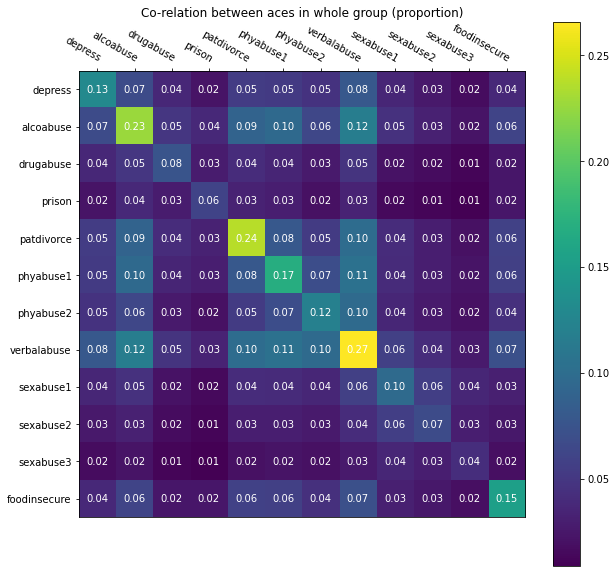

In [58]:
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(co_rel_matrix.to_numpy())
cbar = ax.figure.colorbar(im, ax = ax)
cbar.ax.set_ylabel('', rotation = -90, va = 'bottom')

ax.set_xticks(np.arange(len(ace_list)))
ax.set_yticks(np.arange(len(ace_list)))
# ... and label them with the respective list entries
ax.set_xticklabels(list(ace_list.values()))
ax.set_yticklabels(list(ace_list.values()))

ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

ax.set_title("Co-relation between aces in whole group (proportion)")

plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

for i in range(len(ace_list)):
    for j in range(len(ace_list)):
        text = ax.text(j, i, '{:.2f}'.format(co_rel_matrix.to_numpy()[i, j]),
                       ha="center", va="center", color="w")

#fig.tight_layout()
plt.show()

In [59]:
race_list

{1: 'White', 2: 'Black', 3: 'Hispanic', 4: 'Other', 5: 'Multi'}

In [60]:
income_list

{1: '< 15000',
 2: '15000 - 24999',
 3: '25000 - 34999',
 4: '35000 - 49999',
 5: '50000 +',
 9: "Don't Know"}

In [61]:
ri_group_dist = {}
for r in race_list.keys():
    ri_group_dist[r] = {}
    for i in income_list.keys():
        gpdata = bf_uni_code[(bf_uni_code[['_RACE_G1', '_INCOMG']] == [r,i]).all(axis = 1)]
        
        co_rel_matrix = []
        for ace1 in ace_list.values():
            two_dist = [multi_dist(gpdata, [ace1, ace2])[0] for ace2 in ace_list.values()]    
            co_rel_matrix.append(two_dist)
        co_rel_matrix = pd.DataFrame(co_rel_matrix, index = list(ace_list.values()), columns = list(ace_list.values()))
        ri_group_dist[r][i] = co_rel_matrix

In [62]:
for r in race_list.keys():
    for i in income_list.keys():
        ri_dist = ri_group_dist[r][i]
        print('Race: ' + race_list[r] + ', Income: ' + income_list[i])
        display(ri_dist)
        print('')

Race: White, Income: < 15000


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       0.211705   0.135606   0.066278  0.047965    0.102432   0.109882   
alcoabuse     0.135606   0.333333   0.076424  0.083513    0.160584   0.183346   
drugabuse     0.066278   0.076424   0.108477  0.048410    0.062317   0.059341   
prison        0.047965   0.083513   0.048410  0.107604    0.058480   0.067202   
patdivorce    0.102432   0.160584   0.062317  0.058480    0.297965   0.137037   
phyabuse1     0.109882   0.183346   0.059341  0.067202    0.137037   0.261091   
phyabuse2     0.096350   0.132948   0.047170  0.046276    0.109238   0.133431   
verbalabuse   0.146413   0.198695   0.077875  0.071118    0.157469   0.177336   
sexabuse1     0.080324   0.111679   0.043223  0.047445    0.083766   0.088083   
sexabuse2     0.072539   0.092511   0.039057  0.037445    0.064036   0.070843   
sexabuse3     0.054613   0.068764   0.030837  0.026335    0.051852   0.058649   
foodinsecure  0.073171   0.092457   0.039024  0.050971    0.100985   0.098765   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.096350     0.146413   0.080324   0.072539   0.054613   
alcoabuse      0.132948     0.198695   0.111679   0.092511   0.068764   
drugabuse      0.047170     0.077875   0.043223   0.039057   0.030837   
prison         0.046276     0.071118   0.047445   0.037445   0.026335   
patdivorce     0.109238     0.157469   0.083766   0.064036   0.051852   
phyabuse1      0.133431     0.177336   0.088083   0.070843   0.058649   
phyabuse2      0.221583     0.188953   0.089377   0.070007   0.053598   
verbalabuse    0.188953     0.345848   0.125551   0.098155   0.070640   
sexabuse1      0.089377     0.125551   0.189091   0.125276   0.093314   
sexabuse2      0.070007     0.098155   0.125276   0.141185   0.080942   
sexabuse3      0.053598     0.070640   0.093314   0.080942   0.107872   
foodinsecure   0.087591     0.108374   0.071253   0.056373   0.046683   

              foodinsecure  
depress           0.073171  
alcoabuse         0.092457  
drugabuse         0.039024  
prison            0.050971  
patdivorce        0.100985  
phyabuse1         0.098765  
phyabuse2         0.087591  
verbalabuse       0.108374  
sexabuse1         0.071253  
sexabuse2         0.056373  
sexabuse3         0.046683  
foodinsecure      0.206410


Race: White, Income: 15000 - 24999


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       0.163790   0.087476   0.052328  0.031899    0.074117   0.070285   
alcoabuse     0.087476   0.269142   0.067536  0.042945    0.113865   0.116822   
drugabuse     0.052328   0.067536   0.094311  0.033270    0.056392   0.046214   
prison        0.031899   0.042945   0.033270  0.057612    0.035122   0.027961   
patdivorce    0.074117   0.113865   0.056392  0.035122    0.249711   0.100824   
phyabuse1     0.070285   0.116822   0.046214  0.027961    0.100824   0.187670   
phyabuse2     0.065536   0.086890   0.039539  0.023399    0.073199   0.093738   
verbalabuse   0.113663   0.147846   0.064366  0.037955    0.126810   0.131816   
sexabuse1     0.049609   0.057588   0.027983  0.016712    0.049863   0.047713   
sexabuse2     0.036314   0.040840   0.022542  0.015929    0.038854   0.035841   
sexabuse3     0.020647   0.026398   0.014358  0.007755    0.022718   0.025954   
foodinsecure  0.072660   0.088452   0.044118  0.034272    0.073474   0.069652   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.065536     0.113663   0.049609   0.036314   0.020647   
alcoabuse      0.086890     0.147846   0.057588   0.040840   0.026398   
drugabuse      0.039539     0.064366   0.027983   0.022542   0.014358   
prison         0.023399     0.037955   0.016712   0.015929   0.007755   
patdivorce     0.073199     0.126810   0.049863   0.038854   0.022718   
phyabuse1      0.093738     0.131816   0.047713   0.035841   0.025954   
phyabuse2      0.155496     0.132946   0.049027   0.038895   0.025999   
verbalabuse    0.132946     0.295938   0.071906   0.054203   0.031360   
sexabuse1      0.049027     0.071906   0.117579   0.070928   0.043309   
sexabuse2      0.038895     0.054203   0.070928   0.082622   0.038596   
sexabuse3      0.025999     0.031360   0.043309   0.038596   0.048393   
foodinsecure   0.068627     0.099877   0.043641   0.033708   0.022305   

              foodinsecure  
depress           0.072660  
alcoabuse         0.088452  
drugabuse         0.044118  
prison            0.034272  
patdivorce        0.073474  
phyabuse1         0.069652  
phyabuse2         0.068627  
verbalabuse       0.099877  
sexabuse1         0.043641  
sexabuse2         0.033708  
sexabuse3         0.022305  
foodinsecure      0.191194


Race: White, Income: 25000 - 34999


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       0.146769   0.075866   0.043884  0.026879    0.055832   0.053621   
alcoabuse     0.075866   0.240306   0.056346  0.038840    0.089305   0.094319   
drugabuse     0.043884   0.056346   0.076839  0.023472    0.039604   0.034122   
prison        0.026879   0.038840   0.023472  0.052861    0.033535   0.024202   
patdivorce    0.055832   0.089305   0.039604  0.033535    0.209775   0.063193   
phyabuse1     0.053621   0.094319   0.034122  0.024202    0.063193   0.152747   
phyabuse2     0.053444   0.069231   0.025782  0.020833    0.053039   0.074586   
verbalabuse   0.090757   0.127222   0.046009  0.031025    0.084869   0.099888   
sexabuse1     0.037099   0.044751   0.019846  0.012672    0.039401   0.041111   
sexabuse2     0.023295   0.030437   0.014357  0.009382    0.026111   0.027268   
sexabuse3     0.015487   0.019857   0.008255  0.006601    0.016066   0.017184   
foodinsecure  0.054482   0.073427   0.022688  0.031469    0.066784   0.070547   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.053444     0.090757   0.037099   0.023295   0.015487   
alcoabuse      0.069231     0.127222   0.044751   0.030437   0.019857   
drugabuse      0.025782     0.046009   0.019846   0.014357   0.008255   
prison         0.020833     0.031025   0.012672   0.009382   0.006601   
patdivorce     0.053039     0.084869   0.039401   0.026111   0.016066   
phyabuse1      0.074586     0.099888   0.041111   0.027268   0.017184   
phyabuse2      0.125411     0.101610   0.034826   0.022148   0.015461   
verbalabuse    0.101610     0.267847   0.054749   0.035814   0.020636   
sexabuse1      0.034826     0.054749   0.099615   0.050829   0.025358   
sexabuse2      0.022148     0.035814   0.050829   0.063396   0.022652   
sexabuse3      0.015461     0.020636   0.025358   0.022652   0.030769   
foodinsecure   0.066550     0.091711   0.045694   0.035273   0.026362   

              foodinsecure  
depress           0.054482  
alcoabuse         0.073427  
drugabuse         0.022688  
prison            0.031469  
patdivorce        0.066784  
phyabuse1         0.070547  
phyabuse2         0.066550  
verbalabuse       0.091711  
sexabuse1         0.045694  
sexabuse2         0.035273  
sexabuse3         0.026362  
foodinsecure      0.154321


Race: White, Income: 35000 - 49999


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       0.153333   0.082095   0.044510  0.019681    0.063830   0.056138   
alcoabuse     0.082095   0.252869   0.050056  0.030056    0.102277   0.097305   
drugabuse     0.044510   0.050056   0.072089  0.021868    0.044709   0.034380   
prison        0.019681   0.030056   0.021868  0.044412    0.027612   0.023569   
patdivorce    0.063830   0.102277   0.044709  0.027612    0.219866   0.074840   
phyabuse1     0.056138   0.097305   0.034380  0.023569    0.074840   0.145522   
phyabuse2     0.054255   0.070208   0.030404  0.018938    0.057132   0.069985   
verbalabuse   0.092342   0.131332   0.047976  0.029257    0.099623   0.107791   
sexabuse1     0.041045   0.046980   0.020857  0.011182    0.035246   0.035687   
sexabuse2     0.027912   0.029390   0.014487  0.009669    0.025804   0.026976   
sexabuse3     0.020849   0.019725   0.009290  0.005208    0.013842   0.017248   
foodinsecure  0.041176   0.056338   0.016432  0.015276    0.041420   0.050888   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.054255     0.092342   0.041045   0.027912   0.020849   
alcoabuse      0.070208     0.131332   0.046980   0.029390   0.019725   
drugabuse      0.030404     0.047976   0.020857   0.014487   0.009290   
prison         0.018938     0.029257   0.011182   0.009669   0.005208   
patdivorce     0.057132     0.099623   0.035246   0.025804   0.013842   
phyabuse1      0.069985     0.107791   0.035687   0.026976   0.017248   
phyabuse2      0.126667     0.100563   0.034328   0.024563   0.017870   
verbalabuse    0.100563     0.274701   0.056561   0.034599   0.024078   
sexabuse1      0.034328     0.056561   0.103756   0.055080   0.033557   
sexabuse2      0.024563     0.034599   0.055080   0.063798   0.027509   
sexabuse3      0.017870     0.024078   0.033557   0.027509   0.038219   
foodinsecure   0.045936     0.064133   0.029481   0.019953   0.014101   

              foodinsecure  
depress           0.041176  
alcoabuse         0.056338  
drugabuse         0.016432  
prison            0.015276  
patdivorce        0.041420  
phyabuse1         0.050888  
phyabuse2         0.045936  
verbalabuse       0.064133  
sexabuse1         0.029481  
sexabuse2         0.019953  
sexabuse3         0.014101  
foodinsecure      0.127635


Race: White, Income: 50000 +


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       0.141829   0.066235   0.034959  0.015745    0.048921   0.048637   
alcoabuse     0.066235   0.208815   0.040503  0.022658    0.076603   0.077357   
drugabuse     0.034959   0.040503   0.067462  0.017544    0.033656   0.027829   
prison        0.015745   0.022658   0.017544  0.033062    0.018568   0.017625   
patdivorce    0.048921   0.076603   0.033656  0.018568    0.185737   0.058021   
phyabuse1     0.048637   0.077357   0.027829  0.017625    0.058021   0.129206   
phyabuse2     0.042712   0.053262   0.022722  0.012195    0.041391   0.057763   
verbalabuse   0.080651   0.112123   0.042097  0.020398    0.086018   0.092538   
sexabuse1     0.031791   0.035412   0.016422  0.008564    0.029733   0.029166   
sexabuse2     0.023056   0.023993   0.011632  0.005867    0.021235   0.021269   
sexabuse3     0.011039   0.011387   0.006980  0.003300    0.009330   0.011067   
foodinsecure  0.029784   0.039762   0.021949  0.012607    0.037272   0.036968   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.042712     0.080651   0.031791   0.023056   0.011039   
alcoabuse      0.053262     0.112123   0.035412   0.023993   0.011387   
drugabuse      0.022722     0.042097   0.016422   0.011632   0.006980   
prison         0.012195     0.020398   0.008564   0.005867   0.003300   
patdivorce     0.041391     0.086018   0.029733   0.021235   0.009330   
phyabuse1      0.057763     0.092538   0.029166   0.021269   0.011067   
phyabuse2      0.104108     0.087588   0.026471   0.019589   0.010902   
verbalabuse    0.087588     0.276256   0.048618   0.033543   0.016531   
sexabuse1      0.026471     0.048618   0.084862   0.046896   0.021566   
sexabuse2      0.019589     0.033543   0.046896   0.057544   0.018485   
sexabuse3      0.010902     0.016531   0.021566   0.018485   0.022849   
foodinsecure   0.029729     0.052219   0.023446   0.017851   0.011918   

              foodinsecure  
depress           0.029784  
alcoabuse         0.039762  
drugabuse         0.021949  
prison            0.012607  
patdivorce        0.037272  
phyabuse1         0.036968  
phyabuse2         0.029729  
verbalabuse       0.052219  
sexabuse1         0.023446  
sexabuse2         0.017851  
sexabuse3         0.011918  
foodinsecure      0.100018


Race: White, Income: Don't Know


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       0.108592   0.051357   0.021516  0.012528    0.041505   0.035668   
alcoabuse     0.051357   0.199681   0.027538  0.024648    0.065006   0.066841   
drugabuse     0.021516   0.027538   0.042472  0.012090    0.020572   0.019799   
prison        0.012528   0.024648   0.012090  0.037096    0.016399   0.017197   
patdivorce    0.041505   0.065006   0.020572  0.016399    0.164265   0.052666   
phyabuse1     0.035668   0.066841   0.019799  0.017197    0.052666   0.109567   
phyabuse2     0.040506   0.055016   0.017047  0.014474    0.042194   0.051859   
verbalabuse   0.064013   0.087865   0.025041  0.019446    0.069884   0.062166   
sexabuse1     0.029768   0.032669   0.011360  0.008442    0.028834   0.026064   
sexabuse2     0.018561   0.023097   0.008078  0.006787    0.019896   0.016765   
sexabuse3     0.013025   0.015270   0.006131  0.004843    0.014663   0.013793   
foodinsecure  0.025641   0.049765   0.011246  0.015009    0.041627   0.038059   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.040506     0.064013   0.029768   0.018561   0.013025   
alcoabuse      0.055016     0.087865   0.032669   0.023097   0.015270   
drugabuse      0.017047     0.025041   0.011360   0.008078   0.006131   
prison         0.014474     0.019446   0.008442   0.006787   0.004843   
patdivorce     0.042194     0.069884   0.028834   0.019896   0.014663   
phyabuse1      0.051859     0.062166   0.026064   0.016765   0.013793   
phyabuse2      0.101217     0.082617   0.032005   0.022454   0.016569   
verbalabuse    0.082617     0.212340   0.045151   0.031312   0.020986   
sexabuse1      0.032005     0.045151   0.082121   0.043492   0.024723   
sexabuse2      0.022454     0.031312   0.043492   0.051175   0.020725   
sexabuse3      0.016569     0.020986   0.024723   0.020725   0.029904   
foodinsecure   0.033019     0.051011   0.019029   0.011396   0.011331   

              foodinsecure  
depress           0.025641  
alcoabuse         0.049765  
drugabuse         0.011246  
prison            0.015009  
patdivorce        0.041627  
phyabuse1         0.038059  
phyabuse2         0.033019  
verbalabuse       0.051011  
sexabuse1         0.019029  
sexabuse2         0.011396  
sexabuse3         0.011331  
foodinsecure      0.111270


Race: Black, Income: < 15000


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       0.083449   0.046283   0.029515  0.030028    0.045802   0.034858   
alcoabuse     0.046283   0.219140   0.060224  0.057063    0.101901   0.104499   
drugabuse     0.029515   0.060224   0.072222  0.037604    0.045697   0.037818   
prison        0.030028   0.057063   0.037604  0.093793    0.053747   0.039740   
patdivorce    0.045802   0.101901   0.045697  0.053747    0.345633   0.106216   
phyabuse1     0.034858   0.104499   0.037818  0.039740    0.106216   0.215827   
phyabuse2     0.029830   0.053191   0.026969  0.023961    0.059049   0.066812   
verbalabuse   0.046067   0.106082   0.043262  0.043662    0.102919   0.105378   
sexabuse1     0.023404   0.046001   0.025550  0.019014    0.055300   0.043764   
sexabuse2     0.020538   0.035286   0.022631  0.018258    0.041379   0.034960   
sexabuse3     0.020509   0.040169   0.024735  0.020337    0.045107   0.037818   
foodinsecure  0.026374   0.070175   0.017467  0.032468    0.093897   0.060948   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.029830     0.046067   0.023404   0.020538   0.020509   
alcoabuse      0.053191     0.106082   0.046001   0.035286   0.040169   
drugabuse      0.026969     0.043262   0.025550   0.022631   0.024735   
prison         0.023961     0.043662   0.019014   0.018258   0.020337   
patdivorce     0.059049     0.102919   0.055300   0.041379   0.045107   
phyabuse1      0.066812     0.105378   0.043764   0.034960   0.037818   
phyabuse2      0.109397     0.078612   0.032787   0.028450   0.029099   
verbalabuse    0.078612     0.224790   0.054054   0.041193   0.040397   
sexabuse1      0.032787     0.054054   0.090463   0.057625   0.059733   
sexabuse2      0.028450     0.041193   0.057625   0.067832   0.044849   
sexabuse3      0.029099     0.040397   0.059733   0.044849   0.071229   
foodinsecure   0.046053     0.072368   0.035320   0.028446   0.032823   

              foodinsecure  
depress           0.026374  
alcoabuse         0.070175  
drugabuse         0.017467  
prison            0.032468  
patdivorce        0.093897  
phyabuse1         0.060948  
phyabuse2         0.046053  
verbalabuse       0.072368  
sexabuse1         0.035320  
sexabuse2         0.028446  
sexabuse3         0.032823  
foodinsecure      0.242558


Race: Black, Income: 15000 - 24999


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       0.079953   0.046154   0.027745  0.027107    0.041428   0.040939   
alcoabuse     0.046154   0.218512   0.054706  0.056371    0.103624   0.112710   
drugabuse     0.027745   0.054706   0.088889  0.046838    0.050063   0.037725   
prison        0.027107   0.056371   0.046838  0.107872    0.063211   0.048416   
patdivorce    0.041428   0.103624   0.050063  0.063211    0.352681   0.110465   
phyabuse1     0.040939   0.112710   0.037725  0.048416    0.110465   0.226730   
phyabuse2     0.032009   0.050207   0.019458  0.026471    0.048285   0.062912   
verbalabuse   0.049582   0.103510   0.046884  0.058091    0.117798   0.106627   
sexabuse1     0.027365   0.042112   0.022485  0.024203    0.046526   0.045126   
sexabuse2     0.021403   0.032583   0.019504  0.020637    0.035646   0.036079   
sexabuse3     0.014854   0.027219   0.013585  0.014732    0.027371   0.032452   
foodinsecure  0.030945   0.073290   0.027464  0.038772    0.098446   0.082237   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.032009     0.049582   0.027365   0.021403   0.014854   
alcoabuse      0.050207     0.103510   0.042112   0.032583   0.027219   
drugabuse      0.019458     0.046884   0.022485   0.019504   0.013585   
prison         0.026471     0.058091   0.024203   0.020637   0.014732   
patdivorce     0.048285     0.117798   0.046526   0.035646   0.027371   
phyabuse1      0.062912     0.106627   0.045126   0.036079   0.032452   
phyabuse2      0.098649     0.071301   0.025489   0.020722   0.019527   
verbalabuse    0.071301     0.236095   0.051374   0.038760   0.035736   
sexabuse1      0.025489     0.051374   0.087213   0.053783   0.049734   
sexabuse2      0.020722     0.038760   0.053783   0.064155   0.040118   
sexabuse3      0.019527     0.035736   0.049734   0.040118   0.058824   
foodinsecure   0.042071     0.097720   0.034146   0.032520   0.030945   

              foodinsecure  
depress           0.030945  
alcoabuse         0.073290  
drugabuse         0.027464  
prison            0.038772  
patdivorce        0.098446  
phyabuse1         0.082237  
phyabuse2         0.042071  
verbalabuse       0.097720  
sexabuse1         0.034146  
sexabuse2         0.032520  
sexabuse3         0.030945  
foodinsecure      0.203020


Race: Black, Income: 25000 - 34999


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       0.073341   0.035006   0.024504  0.013986    0.031646   0.029727   
alcoabuse     0.035006   0.208817   0.047619  0.040603    0.072061   0.099526   
drugabuse     0.024504   0.047619   0.083527  0.037123    0.040455   0.039100   
prison        0.013986   0.040603   0.037123  0.092700    0.042929   0.039053   
patdivorce    0.031646   0.072061   0.040455  0.042929    0.319042   0.072165   
phyabuse1     0.029727   0.099526   0.039100  0.039053    0.072165   0.206856   
phyabuse2     0.016393   0.040840   0.024504  0.017483    0.034264   0.053381   
verbalabuse   0.035377   0.086957   0.045828  0.039906    0.097187   0.093079   
sexabuse1     0.014101   0.033958   0.022248  0.017544    0.034351   0.040524   
sexabuse2     0.007117   0.022459   0.014184  0.011806    0.023107   0.026442   
sexabuse3     0.010613   0.018801   0.012926  0.009390    0.020434   0.025120   
foodinsecure  0.014286   0.060714   0.017857  0.021429    0.042802   0.064748   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.016393     0.035377   0.014101   0.007117   0.010613   
alcoabuse      0.040840     0.086957   0.033958   0.022459   0.018801   
drugabuse      0.024504     0.045828   0.022248   0.014184   0.012926   
prison         0.017483     0.039906   0.017544   0.011806   0.009390   
patdivorce     0.034264     0.097187   0.034351   0.023107   0.020434   
phyabuse1      0.053381     0.093079   0.040524   0.026442   0.025120   
phyabuse2      0.090803     0.058754   0.029343   0.011848   0.016490   
verbalabuse    0.058754     0.234467   0.046045   0.029797   0.029621   
sexabuse1      0.029343     0.046045   0.080607   0.042503   0.045882   
sexabuse2      0.011848     0.029797   0.042503   0.051887   0.029621   
sexabuse3      0.016490     0.029621   0.045882   0.029621   0.050410   
foodinsecure   0.032143     0.057143   0.021505   0.021739   0.017921   

              foodinsecure  
depress           0.014286  
alcoabuse         0.060714  
drugabuse         0.017857  
prison            0.021429  
patdivorce        0.042802  
phyabuse1         0.064748  
phyabuse2         0.032143  
verbalabuse       0.057143  
sexabuse1         0.021505  
sexabuse2         0.021739  
sexabuse3         0.017921  
foodinsecure      0.185662


Race: Black, Income: 35000 - 49999


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       0.067715   0.043636   0.020656  0.020631    0.033722   0.031211   
alcoabuse     0.043636   0.209190   0.052248  0.063107    0.084416   0.096010   
drugabuse     0.020656   0.052248   0.089697  0.046173    0.046814   0.031289   
prison        0.020631   0.063107   0.046173  0.110036    0.060881   0.043641   
patdivorce    0.033722   0.084416   0.046814  0.060881    0.311370   0.073333   
phyabuse1     0.031211   0.096010   0.031289  0.043641    0.073333   0.199005   
phyabuse2     0.023199   0.050061   0.017136  0.024420    0.040417   0.052500   
verbalabuse   0.039168   0.100367   0.040491  0.056304    0.108355   0.100503   
sexabuse1     0.019512   0.034146   0.013447  0.019512    0.042913   0.035088   
sexabuse2     0.017136   0.022005   0.007362  0.011016    0.027379   0.025126   
sexabuse3     0.013415   0.020732   0.011002  0.014634    0.028609   0.023810   
foodinsecure  0.014085   0.056140   0.014134  0.038732    0.052632   0.057971   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.023199     0.039168   0.019512   0.017136   0.013415   
alcoabuse      0.050061     0.100367   0.034146   0.022005   0.020732   
drugabuse      0.017136     0.040491   0.013447   0.007362   0.011002   
prison         0.024420     0.056304   0.019512   0.011016   0.014634   
patdivorce     0.040417     0.108355   0.042913   0.027379   0.028609   
phyabuse1      0.052500     0.100503   0.035088   0.025126   0.023810   
phyabuse2      0.093674     0.070025   0.026928   0.019656   0.017136   
verbalabuse    0.070025     0.246341   0.046626   0.025862   0.025767   
sexabuse1      0.026928     0.046626   0.077764   0.043902   0.035280   
sexabuse2      0.019656     0.025862   0.043902   0.054878   0.028049   
sexabuse3      0.017136     0.025767   0.035280   0.028049   0.042527   
foodinsecure   0.024648     0.071174   0.024561   0.010601   0.010563   

              foodinsecure  
depress           0.014085  
alcoabuse         0.056140  
drugabuse         0.014134  
prison            0.038732  
patdivorce        0.052632  
phyabuse1         0.057971  
phyabuse2         0.024648  
verbalabuse       0.071174  
sexabuse1         0.024561  
sexabuse2         0.010601  
sexabuse3         0.010563  
foodinsecure      0.176265


Race: Black, Income: 50000 +


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       0.084615   0.044015   0.019260  0.018462    0.036948   0.044741   
alcoabuse     0.044015   0.207373   0.037721  0.039201    0.080257   0.113636   
drugabuse     0.019260   0.037721   0.075153  0.042210    0.037630   0.045419   
prison        0.018462   0.039201   0.042210  0.084227    0.039169   0.043750   
patdivorce    0.036948   0.080257   0.037630  0.039169    0.294964   0.100326   
phyabuse1     0.044741   0.113636   0.045419  0.043750    0.100326   0.215625   
phyabuse2     0.017788   0.028571   0.016962  0.016936    0.030547   0.041536   
verbalabuse   0.045136   0.087024   0.044220  0.039504    0.086360   0.105678   
sexabuse1     0.024980   0.031956   0.017121  0.012432    0.040486   0.042654   
sexabuse2     0.018677   0.024087   0.017067  0.011619    0.032284   0.033858   
sexabuse3     0.010140   0.016355   0.010886  0.009317    0.016181   0.019732   
foodinsecure  0.032990   0.055670   0.014374  0.024641    0.061571   0.065263   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.017788     0.045136   0.024980   0.018677   0.010140   
alcoabuse      0.028571     0.087024   0.031956   0.024087   0.016355   
drugabuse      0.016962     0.044220   0.017121   0.017067   0.010886   
prison         0.016936     0.039504   0.012432   0.011619   0.009317   
patdivorce     0.030547     0.086360   0.040486   0.032284   0.016181   
phyabuse1      0.041536     0.105678   0.042654   0.033858   0.019732   
phyabuse2      0.067692     0.047360   0.023401   0.019440   0.013250   
verbalabuse    0.047360     0.246904   0.047022   0.034348   0.021127   
sexabuse1      0.023401     0.047022   0.090062   0.054560   0.031201   
sexabuse2      0.019440     0.034348   0.054560   0.069659   0.030327   
sexabuse3      0.013250     0.021127   0.031201   0.030327   0.038014   
foodinsecure   0.012397     0.054167   0.018672   0.010373   0.008316   

              foodinsecure  
depress           0.032990  
alcoabuse         0.055670  
drugabuse         0.014374  
prison            0.024641  
patdivorce        0.061571  
phyabuse1         0.065263  
phyabuse2         0.012397  
verbalabuse       0.054167  
sexabuse1         0.018672  
sexabuse2         0.010373  
sexabuse3         0.008316  
foodinsecure      0.137968


Race: Black, Income: Don't Know


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       0.060660   0.029946   0.018002  0.014388    0.026367   0.023674   
alcoabuse     0.029946   0.171099   0.026786  0.033868    0.058196   0.074178   
drugabuse     0.018002   0.026786   0.046532  0.022085    0.023121   0.022367   
prison        0.014388   0.033868   0.022085  0.063103    0.031670   0.027829   
patdivorce    0.026367   0.058196   0.023121  0.031670    0.280115   0.058645   
phyabuse1     0.023674   0.074178   0.022367  0.027829    0.058645   0.150647   
phyabuse2     0.016364   0.034173   0.015152  0.013357    0.032978   0.046685   
verbalabuse   0.028704   0.071691   0.028233  0.030909    0.073340   0.072175   
sexabuse1     0.016484   0.026340   0.013489  0.013453    0.031373   0.026415   
sexabuse2     0.010036   0.022624   0.011649  0.009839    0.020508   0.021678   
sexabuse3     0.006387   0.020814   0.007175  0.005372    0.019493   0.022620   
foodinsecure  0.009756   0.048544   0.012019  0.014388    0.046392   0.039900   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.016364     0.028704   0.016484   0.010036   0.006387   
alcoabuse      0.034173     0.071691   0.026340   0.022624   0.020814   
drugabuse      0.015152     0.028233   0.013489   0.011649   0.007175   
prison         0.013357     0.030909   0.013453   0.009839   0.005372   
patdivorce     0.032978     0.073340   0.031373   0.020508   0.019493   
phyabuse1      0.046685     0.072175   0.026415   0.021678   0.022620   
phyabuse2      0.086726     0.057482   0.019856   0.012601   0.015315   
verbalabuse    0.057482     0.186257   0.033119   0.023788   0.022018   
sexabuse1      0.019856     0.033119   0.059662   0.028648   0.028700   
sexabuse2      0.012601     0.023788   0.028648   0.041704   0.022341   
sexabuse3      0.015315     0.022018   0.028700   0.022341   0.042629   
foodinsecure   0.016827     0.041975   0.007229   0.009592   0.009569   

              foodinsecure  
depress           0.009756  
alcoabuse         0.048544  
drugabuse         0.012019  
prison            0.014388  
patdivorce        0.046392  
phyabuse1         0.039900  
phyabuse2         0.016827  
verbalabuse       0.041975  
sexabuse1         0.007229  
sexabuse2         0.009592  
sexabuse3         0.009569  
foodinsecure      0.172082


Race: Hispanic, Income: < 15000


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       0.174603   0.142857   0.080645  0.064516    0.116667   0.129032   
alcoabuse     0.142857   0.296875   0.096774  0.079365    0.131148   0.238095   
drugabuse     0.080645   0.096774   0.145161  0.065574    0.118644   0.114754   
prison        0.064516   0.079365   0.065574  0.126984    0.066667   0.096774   
patdivorce    0.116667   0.131148   0.118644  0.066667    0.278689   0.183333   
phyabuse1     0.129032   0.238095   0.114754  0.096774    0.183333   0.634921   
phyabuse2     0.111111   0.140625   0.064516  0.095238    0.081967   0.222222   
verbalabuse   0.126984   0.187500   0.096774  0.095238    0.131148   0.333333   
sexabuse1     0.114754   0.193548   0.066667  0.081967    0.116667   0.229508   
sexabuse2     0.064516   0.142857   0.049180  0.064516    0.083333   0.193548   
sexabuse3     0.081967   0.129032   0.050000  0.065574    0.067797   0.196721   
foodinsecure  0.000000   0.333333   0.000000  0.000000    0.000000   0.333333   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.111111     0.126984   0.114754   0.064516   0.081967   
alcoabuse      0.140625     0.187500   0.193548   0.142857   0.129032   
drugabuse      0.064516     0.096774   0.066667   0.049180   0.050000   
prison         0.095238     0.095238   0.081967   0.064516   0.065574   
patdivorce     0.081967     0.131148   0.116667   0.083333   0.067797   
phyabuse1      0.222222     0.333333   0.229508   0.193548   0.196721   
phyabuse2      0.281250     0.218750   0.177419   0.142857   0.161290   
verbalabuse    0.218750     0.437500   0.209677   0.190476   0.177419   
sexabuse1      0.177419     0.209677   0.274194   0.209677   0.180328   
sexabuse2      0.142857     0.190476   0.209677   0.238095   0.177419   
sexabuse3      0.161290     0.177419   0.180328   0.177419   0.225806   
foodinsecure   0.222222     0.444444   0.333333   0.222222   0.222222   

              foodinsecure  
depress           0.000000  
alcoabuse         0.333333  
drugabuse         0.000000  
prison            0.000000  
patdivorce        0.000000  
phyabuse1         0.333333  
phyabuse2         0.222222  
verbalabuse       0.444444  
sexabuse1         0.333333  
sexabuse2         0.222222  
sexabuse3         0.222222  
foodinsecure      0.409091


Race: Hispanic, Income: 15000 - 24999


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       0.076336   0.045802   0.022901  0.015267    0.023438   0.015504   
alcoabuse     0.045802   0.270677   0.067669  0.052632    0.100000   0.099237   
drugabuse     0.022901   0.067669   0.082707  0.037594    0.046154   0.030534   
prison        0.015267   0.052632   0.037594  0.067669    0.046154   0.030534   
patdivorce    0.023438   0.100000   0.046154  0.046154    0.307692   0.132812   
phyabuse1     0.015504   0.099237   0.030534  0.030534    0.132812   0.396947   
phyabuse2     0.054264   0.115385   0.015385  0.030769    0.102362   0.139535   
verbalabuse   0.069767   0.175573   0.061069  0.045802    0.125000   0.146154   
sexabuse1     0.038760   0.069231   0.015385  0.015385    0.039370   0.038760   
sexabuse2     0.023438   0.031008   0.015504  0.015504    0.031496   0.039062   
sexabuse3     0.015504   0.030769   0.015385  0.015385    0.023438   0.023256   
foodinsecure  0.029412   0.138889   0.083333  0.055556    0.085714   0.142857   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.054264     0.069767   0.038760   0.023438   0.015504   
alcoabuse      0.115385     0.175573   0.069231   0.031008   0.030769   
drugabuse      0.015385     0.061069   0.015385   0.015504   0.015385   
prison         0.030769     0.045802   0.015385   0.015504   0.015385   
patdivorce     0.102362     0.125000   0.039370   0.031496   0.023438   
phyabuse1      0.139535     0.146154   0.038760   0.039062   0.023256   
phyabuse2      0.315385     0.218750   0.077519   0.062500   0.038760   
verbalabuse    0.218750     0.335878   0.078125   0.047244   0.046875   
sexabuse1      0.077519     0.078125   0.100000   0.046512   0.031008   
sexabuse2      0.062500     0.047244   0.046512   0.062016   0.015504   
sexabuse3      0.038760     0.046875   0.031008   0.015504   0.061538   
foodinsecure   0.090909     0.194444   0.000000   0.000000   0.000000   

              foodinsecure  
depress           0.029412  
alcoabuse         0.138889  
drugabuse         0.083333  
prison            0.055556  
patdivorce        0.085714  
phyabuse1         0.142857  
phyabuse2         0.090909  
verbalabuse       0.194444  
sexabuse1         0.000000  
sexabuse2         0.000000  
sexabuse3         0.000000  
foodinsecure      0.364583


Race: Hispanic, Income: 25000 - 34999


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       0.138889   0.097222   0.083333  0.013889    0.085714   0.098592   
alcoabuse     0.097222   0.250000   0.097222  0.013889    0.114286   0.169014   
drugabuse     0.083333   0.097222   0.138889  0.013889    0.114286   0.098592   
prison        0.013889   0.013889   0.013889  0.041667    0.000000   0.014085   
patdivorce    0.085714   0.114286   0.114286  0.000000    0.285714   0.159420   
phyabuse1     0.098592   0.169014   0.098592  0.014085    0.159420   0.422535   
phyabuse2     0.083333   0.180556   0.097222  0.013889    0.142857   0.225352   
verbalabuse   0.070423   0.126761   0.070423  0.014085    0.157143   0.214286   
sexabuse1     0.013889   0.041667   0.027778  0.000000    0.057143   0.098592   
sexabuse2     0.013889   0.013889   0.013889  0.000000    0.028571   0.070423   
sexabuse3     0.013889   0.013889   0.013889  0.000000    0.028571   0.028169   
foodinsecure  0.038462   0.115385   0.038462  0.000000    0.080000   0.120000   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.083333     0.070423   0.013889   0.013889   0.013889   
alcoabuse      0.180556     0.126761   0.041667   0.013889   0.013889   
drugabuse      0.097222     0.070423   0.027778   0.013889   0.013889   
prison         0.013889     0.014085   0.000000   0.000000   0.000000   
patdivorce     0.142857     0.157143   0.057143   0.028571   0.028571   
phyabuse1      0.225352     0.214286   0.098592   0.070423   0.028169   
phyabuse2      0.319444     0.197183   0.041667   0.041667   0.013889   
verbalabuse    0.197183     0.323944   0.084507   0.042254   0.028169   
sexabuse1      0.041667     0.084507   0.111111   0.069444   0.041667   
sexabuse2      0.041667     0.042254   0.069444   0.083333   0.041667   
sexabuse3      0.013889     0.028169   0.041667   0.041667   0.041667   
foodinsecure   0.153846     0.115385   0.076923   0.115385   0.038462   

              foodinsecure  
depress           0.038462  
alcoabuse         0.115385  
drugabuse         0.038462  
prison            0.000000  
patdivorce        0.080000  
phyabuse1         0.120000  
phyabuse2         0.153846  
verbalabuse       0.115385  
sexabuse1         0.076923  
sexabuse2         0.115385  
sexabuse3         0.038462  
foodinsecure      0.285714


Race: Hispanic, Income: 35000 - 49999


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       0.090909   0.060606   0.015152  0.030303    0.078125   0.046154   
alcoabuse     0.060606   0.196970   0.045455  0.060606    0.125000   0.107692   
drugabuse     0.015152   0.045455   0.060606  0.045455    0.046875   0.061538   
prison        0.030303   0.060606   0.045455  0.121212    0.093750   0.061538   
patdivorce    0.078125   0.125000   0.046875  0.093750    0.359375   0.190476   
phyabuse1     0.046154   0.107692   0.061538  0.061538    0.190476   0.307692   
phyabuse2     0.045455   0.121212   0.045455  0.045455    0.140625   0.138462   
verbalabuse   0.045455   0.151515   0.045455  0.060606    0.187500   0.153846   
sexabuse1     0.030769   0.030769   0.015385  0.030769    0.047619   0.015625   
sexabuse2     0.031250   0.031250   0.000000  0.031250    0.048387   0.000000   
sexabuse3     0.000000   0.015385   0.000000  0.000000    0.000000   0.015625   
foodinsecure  0.000000   0.076923   0.000000  0.000000    0.083333   0.153846   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.045455     0.045455   0.030769   0.031250   0.000000   
alcoabuse      0.121212     0.151515   0.030769   0.031250   0.015385   
drugabuse      0.045455     0.045455   0.015385   0.000000   0.000000   
prison         0.045455     0.060606   0.030769   0.031250   0.000000   
patdivorce     0.140625     0.187500   0.047619   0.048387   0.000000   
phyabuse1      0.138462     0.153846   0.015625   0.000000   0.015625   
phyabuse2      0.303030     0.227273   0.030769   0.031250   0.000000   
verbalabuse    0.227273     0.378788   0.030769   0.031250   0.000000   
sexabuse1      0.030769     0.030769   0.061538   0.046875   0.000000   
sexabuse2      0.031250     0.031250   0.046875   0.062500   0.000000   
sexabuse3      0.000000     0.000000   0.000000   0.000000   0.015385   
foodinsecure   0.076923     0.076923   0.000000   0.000000   0.076923   

              foodinsecure  
depress           0.000000  
alcoabuse         0.076923  
drugabuse         0.000000  
prison            0.000000  
patdivorce        0.083333  
phyabuse1         0.153846  
phyabuse2         0.076923  
verbalabuse       0.076923  
sexabuse1         0.000000  
sexabuse2         0.000000  
sexabuse3         0.076923  
foodinsecure      0.138889


Race: Hispanic, Income: 50000 +


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       0.190141   0.098592   0.105634  0.042254    0.065693   0.105634   
alcoabuse     0.098592   0.251748   0.090909  0.041958    0.065217   0.097902   
drugabuse     0.105634   0.090909   0.146853  0.048951    0.043478   0.090909   
prison        0.042254   0.041958   0.048951  0.083916    0.043478   0.041958   
patdivorce    0.065693   0.065217   0.043478  0.043478    0.297101   0.072464   
phyabuse1     0.105634   0.097902   0.090909  0.041958    0.072464   0.195804   
phyabuse2     0.092199   0.070423   0.084507  0.049296    0.051095   0.119718   
verbalabuse   0.157143   0.163121   0.106383  0.049645    0.132353   0.177305   
sexabuse1     0.085714   0.085106   0.078014  0.035461    0.058394   0.078014   
sexabuse2     0.035461   0.028169   0.042254  0.014085    0.043478   0.063380   
sexabuse3     0.028369   0.021127   0.021127  0.014085    0.021739   0.021127   
foodinsecure  0.055556   0.037037   0.037037  0.037037    0.057692   0.037037   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.092199     0.157143   0.085714   0.035461   0.028369   
alcoabuse      0.070423     0.163121   0.085106   0.028169   0.021127   
drugabuse      0.084507     0.106383   0.078014   0.042254   0.021127   
prison         0.049296     0.049645   0.035461   0.014085   0.014085   
patdivorce     0.051095     0.132353   0.058394   0.043478   0.021739   
phyabuse1      0.119718     0.177305   0.078014   0.063380   0.021127   
phyabuse2      0.154930     0.148936   0.092857   0.056738   0.028369   
verbalabuse    0.148936     0.368794   0.121429   0.071429   0.028571   
sexabuse1      0.092857     0.121429   0.177305   0.085106   0.035461   
sexabuse2      0.056738     0.071429   0.085106   0.091549   0.028169   
sexabuse3      0.028369     0.028571   0.035461   0.028169   0.035211   
foodinsecure   0.055556     0.056604   0.019231   0.000000   0.018868   

              foodinsecure  
depress           0.055556  
alcoabuse         0.037037  
drugabuse         0.037037  
prison            0.037037  
patdivorce        0.057692  
phyabuse1         0.037037  
phyabuse2         0.055556  
verbalabuse       0.056604  
sexabuse1         0.019231  
sexabuse2         0.000000  
sexabuse3         0.018868  
foodinsecure      0.177570


Race: Hispanic, Income: Don't Know


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       0.216216   0.094595   0.095890  0.040541    0.130435   0.109589   
alcoabuse     0.094595   0.200000   0.054054  0.026667    0.085714   0.109589   
drugabuse     0.095890   0.054054   0.108108  0.040541    0.072464   0.055556   
prison        0.040541   0.026667   0.040541  0.080000    0.042857   0.041096   
patdivorce    0.130435   0.085714   0.072464  0.042857    0.371429   0.102941   
phyabuse1     0.109589   0.109589   0.055556  0.041096    0.102941   0.219178   
phyabuse2     0.109589   0.068493   0.069444  0.054795    0.102941   0.125000   
verbalabuse   0.148649   0.121622   0.082192  0.040541    0.144928   0.123288   
sexabuse1     0.055556   0.041667   0.042254  0.027778    0.059701   0.056338   
sexabuse2     0.068493   0.041096   0.027778  0.027397    0.044118   0.041667   
sexabuse3     0.041667   0.027778   0.028169  0.027778    0.044776   0.056338   
foodinsecure  0.107143   0.107143   0.035714  0.035714    0.080000   0.107143   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.109589     0.148649   0.055556   0.068493   0.041667   
alcoabuse      0.068493     0.121622   0.041667   0.041096   0.027778   
drugabuse      0.069444     0.082192   0.042254   0.027778   0.028169   
prison         0.054795     0.040541   0.027778   0.027397   0.027778   
patdivorce     0.102941     0.144928   0.059701   0.044118   0.044776   
phyabuse1      0.125000     0.123288   0.056338   0.041667   0.056338   
phyabuse2      0.205479     0.150685   0.056338   0.069444   0.084507   
verbalabuse    0.150685     0.283784   0.083333   0.082192   0.069444   
sexabuse1      0.056338     0.083333   0.111111   0.069444   0.055556   
sexabuse2      0.069444     0.082192   0.069444   0.109589   0.055556   
sexabuse3      0.084507     0.069444   0.055556   0.055556   0.083333   
foodinsecure   0.111111     0.035714   0.037037   0.071429   0.037037   

              foodinsecure  
depress           0.107143  
alcoabuse         0.107143  
drugabuse         0.035714  
prison            0.035714  
patdivorce        0.080000  
phyabuse1         0.107143  
phyabuse2         0.111111  
verbalabuse       0.035714  
sexabuse1         0.037037  
sexabuse2         0.071429  
sexabuse3         0.037037  
foodinsecure      0.303922


Race: Other, Income: < 15000


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       0.250000   0.147059   0.147059  0.088235    0.092308   0.149254   
alcoabuse     0.147059   0.314286   0.128571  0.114286    0.119403   0.176471   
drugabuse     0.147059   0.128571   0.185714  0.100000    0.134328   0.132353   
prison        0.088235   0.114286   0.100000  0.142857    0.074627   0.102941   
patdivorce    0.092308   0.119403   0.134328  0.074627    0.283582   0.138462   
phyabuse1     0.149254   0.176471   0.132353  0.102941    0.138462   0.352941   
phyabuse2     0.169231   0.181818   0.151515  0.106061    0.142857   0.212121   
verbalabuse   0.194030   0.220588   0.176471  0.132353    0.138462   0.253731   
sexabuse1     0.092308   0.075758   0.090909  0.045455    0.079365   0.138462   
sexabuse2     0.092308   0.060606   0.075758  0.045455    0.063492   0.107692   
sexabuse3     0.092308   0.060606   0.060606  0.030303    0.031250   0.092308   
foodinsecure  0.076923   0.115385   0.038462  0.115385    0.120000   0.153846   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.169231     0.194030   0.092308   0.092308   0.092308   
alcoabuse      0.181818     0.220588   0.075758   0.060606   0.060606   
drugabuse      0.151515     0.176471   0.090909   0.075758   0.060606   
prison         0.106061     0.132353   0.045455   0.045455   0.030303   
patdivorce     0.142857     0.138462   0.079365   0.063492   0.031250   
phyabuse1      0.212121     0.253731   0.138462   0.107692   0.092308   
phyabuse2      0.333333     0.307692   0.126984   0.111111   0.095238   
verbalabuse    0.307692     0.382353   0.121212   0.106061   0.090909   
sexabuse1      0.126984     0.121212   0.166667   0.106061   0.076923   
sexabuse2      0.111111     0.106061   0.106061   0.151515   0.092308   
sexabuse3      0.095238     0.090909   0.076923   0.092308   0.106061   
foodinsecure   0.120000     0.153846   0.040000   0.000000   0.038462   

              foodinsecure  
depress           0.076923  
alcoabuse         0.115385  
drugabuse         0.038462  
prison            0.115385  
patdivorce        0.120000  
phyabuse1         0.153846  
phyabuse2         0.120000  
verbalabuse       0.153846  
sexabuse1         0.040000  
sexabuse2         0.000000  
sexabuse3         0.038462  
foodinsecure      0.340426


Race: Other, Income: 15000 - 24999


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       0.178571   0.096386   0.095238  0.071429    0.085366   0.097561   
alcoabuse     0.096386   0.232558   0.104651  0.104651    0.107143   0.130952   
drugabuse     0.095238   0.104651   0.170455  0.090909    0.093023   0.069767   
prison        0.071429   0.104651   0.090909  0.147727    0.081395   0.058140   
patdivorce    0.085366   0.107143   0.093023  0.081395    0.220930   0.107143   
phyabuse1     0.097561   0.130952   0.069767  0.058140    0.107143   0.186047   
phyabuse2     0.072289   0.105882   0.045977  0.034483    0.094118   0.105882   
verbalabuse   0.095238   0.154762   0.093023  0.069767    0.130952   0.154762   
sexabuse1     0.072289   0.082353   0.057471  0.080460    0.070588   0.047059   
sexabuse2     0.059524   0.070588   0.057471  0.057471    0.035294   0.047059   
sexabuse3     0.023810   0.058824   0.022989  0.034483    0.035294   0.023529   
foodinsecure  0.107143   0.111111   0.035714  0.071429    0.074074   0.071429   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.072289     0.095238   0.072289   0.059524   0.023810   
alcoabuse      0.105882     0.154762   0.082353   0.070588   0.058824   
drugabuse      0.045977     0.093023   0.057471   0.057471   0.022989   
prison         0.034483     0.069767   0.080460   0.057471   0.034483   
patdivorce     0.094118     0.130952   0.070588   0.035294   0.035294   
phyabuse1      0.105882     0.154762   0.047059   0.047059   0.023529   
phyabuse2      0.195402     0.164706   0.069767   0.046512   0.034884   
verbalabuse    0.164706     0.279070   0.094118   0.070588   0.047059   
sexabuse1      0.069767     0.094118   0.137931   0.081395   0.058140   
sexabuse2      0.046512     0.070588   0.081395   0.091954   0.045977   
sexabuse3      0.034884     0.047059   0.058140   0.045977   0.057471   
foodinsecure   0.071429     0.107143   0.107143   0.071429   0.107143   

              foodinsecure  
depress           0.107143  
alcoabuse         0.111111  
drugabuse         0.035714  
prison            0.071429  
patdivorce        0.074074  
phyabuse1         0.071429  
phyabuse2         0.071429  
verbalabuse       0.107143  
sexabuse1         0.107143  
sexabuse2         0.071429  
sexabuse3         0.107143  
foodinsecure      0.152778


Race: Other, Income: 25000 - 34999


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       0.203390   0.101695   0.067797  0.084746    0.070175   0.101695   
alcoabuse     0.101695   0.186441   0.067797  0.084746    0.052632   0.101695   
drugabuse     0.067797   0.067797   0.118644  0.084746    0.035088   0.084746   
prison        0.084746   0.084746   0.084746  0.152542    0.087719   0.118644   
patdivorce    0.070175   0.052632   0.035088  0.087719    0.228070   0.122807   
phyabuse1     0.101695   0.101695   0.084746  0.118644    0.122807   0.288136   
phyabuse2     0.089286   0.089286   0.053571  0.071429    0.092593   0.125000   
verbalabuse   0.120690   0.120690   0.086207  0.086207    0.071429   0.103448   
sexabuse1     0.033898   0.050847   0.067797  0.050847    0.052632   0.084746   
sexabuse2     0.051724   0.086207   0.068966  0.086207    0.107143   0.103448   
sexabuse3     0.052632   0.052632   0.052632  0.035088    0.054545   0.052632   
foodinsecure  0.105263   0.052632   0.052632  0.052632    0.117647   0.105263   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.089286     0.120690   0.033898   0.051724   0.052632   
alcoabuse      0.089286     0.120690   0.050847   0.086207   0.052632   
drugabuse      0.053571     0.086207   0.067797   0.068966   0.052632   
prison         0.071429     0.086207   0.050847   0.086207   0.035088   
patdivorce     0.092593     0.071429   0.052632   0.107143   0.054545   
phyabuse1      0.125000     0.103448   0.084746   0.103448   0.052632   
phyabuse2      0.196429     0.125000   0.035714   0.072727   0.054545   
verbalabuse    0.125000     0.206897   0.103448   0.105263   0.070175   
sexabuse1      0.035714     0.103448   0.152542   0.120690   0.087719   
sexabuse2      0.072727     0.105263   0.120690   0.172414   0.087719   
sexabuse3      0.054545     0.070175   0.087719   0.087719   0.105263   
foodinsecure   0.105263     0.105263   0.052632   0.052632   0.052632   

              foodinsecure  
depress           0.105263  
alcoabuse         0.052632  
drugabuse         0.052632  
prison            0.052632  
patdivorce        0.117647  
phyabuse1         0.105263  
phyabuse2         0.105263  
verbalabuse       0.105263  
sexabuse1         0.052632  
sexabuse2         0.052632  
sexabuse3         0.052632  
foodinsecure      0.195122


Race: Other, Income: 35000 - 49999


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       0.183673   0.102041   0.020408  0.041667    0.061224   0.083333   
alcoabuse     0.102041   0.180000   0.040000  0.061224    0.080000   0.122449   
drugabuse     0.020408   0.040000   0.040000  0.020408    0.040000   0.040816   
prison        0.041667   0.061224   0.020408  0.081633    0.040816   0.020833   
patdivorce    0.061224   0.080000   0.040000  0.040816    0.260000   0.163265   
phyabuse1     0.083333   0.122449   0.040816  0.020833    0.163265   0.265306   
phyabuse2     0.061224   0.100000   0.020000  0.000000    0.060000   0.122449   
verbalabuse   0.102041   0.100000   0.020000  0.020408    0.140000   0.183673   
sexabuse1     0.040816   0.060000   0.040000  0.040816    0.040000   0.040816   
sexabuse2     0.020408   0.040000   0.040000  0.020408    0.040000   0.040816   
sexabuse3     0.020408   0.040000   0.040000  0.020408    0.040000   0.040816   
foodinsecure  0.052632   0.150000   0.050000  0.052632    0.100000   0.150000   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.061224     0.102041   0.040816   0.020408   0.020408   
alcoabuse      0.100000     0.100000   0.060000   0.040000   0.040000   
drugabuse      0.020000     0.020000   0.040000   0.040000   0.040000   
prison         0.000000     0.020408   0.040816   0.020408   0.020408   
patdivorce     0.060000     0.140000   0.040000   0.040000   0.040000   
phyabuse1      0.122449     0.183673   0.040816   0.040816   0.040816   
phyabuse2      0.120000     0.120000   0.020000   0.020000   0.020000   
verbalabuse    0.120000     0.320000   0.040000   0.020000   0.040000   
sexabuse1      0.020000     0.040000   0.140000   0.080000   0.080000   
sexabuse2      0.020000     0.020000   0.080000   0.080000   0.060000   
sexabuse3      0.020000     0.040000   0.080000   0.060000   0.080000   
foodinsecure   0.100000     0.100000   0.050000   0.050000   0.050000   

              foodinsecure  
depress           0.052632  
alcoabuse         0.150000  
drugabuse         0.050000  
prison            0.052632  
patdivorce        0.100000  
phyabuse1         0.150000  
phyabuse2         0.100000  
verbalabuse       0.100000  
sexabuse1         0.050000  
sexabuse2         0.050000  
sexabuse3         0.050000  
foodinsecure      0.230769


Race: Other, Income: 50000 +


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       0.095890   0.034247   0.013699  0.013699    0.028369   0.041667   
alcoabuse     0.034247   0.120805   0.046980  0.013423    0.062500   0.054422   
drugabuse     0.013699   0.046980   0.073826  0.026846    0.027778   0.040816   
prison        0.013699   0.013423   0.026846  0.040268    0.006944   0.013605   
patdivorce    0.028369   0.062500   0.027778  0.006944    0.145833   0.056338   
phyabuse1     0.041667   0.054422   0.040816  0.013605    0.056338   0.149660   
phyabuse2     0.034247   0.046980   0.026846  0.006711    0.055556   0.074830   
verbalabuse   0.070922   0.076389   0.062500  0.027778    0.079137   0.125874   
sexabuse1     0.027586   0.027027   0.020270  0.006757    0.048951   0.047945   
sexabuse2     0.027397   0.013423   0.013423  0.006711    0.020833   0.020408   
sexabuse3     0.000000   0.013423   0.006711  0.000000    0.020833   0.020408   
foodinsecure  0.020000   0.057692   0.019231  0.000000    0.058824   0.038462   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.034247     0.070922   0.027586   0.027397   0.000000   
alcoabuse      0.046980     0.076389   0.027027   0.013423   0.013423   
drugabuse      0.026846     0.062500   0.020270   0.013423   0.006711   
prison         0.006711     0.027778   0.006757   0.006711   0.000000   
patdivorce     0.055556     0.079137   0.048951   0.020833   0.020833   
phyabuse1      0.074830     0.125874   0.047945   0.020408   0.020408   
phyabuse2      0.100671     0.097222   0.054054   0.026846   0.026846   
verbalabuse    0.097222     0.305556   0.076389   0.048611   0.034722   
sexabuse1      0.054054     0.076389   0.101351   0.054054   0.027027   
sexabuse2      0.026846     0.048611   0.054054   0.060403   0.013423   
sexabuse3      0.026846     0.034722   0.027027   0.013423   0.033557   
foodinsecure   0.019231     0.060000   0.038462   0.038462   0.019231   

              foodinsecure  
depress           0.020000  
alcoabuse         0.057692  
drugabuse         0.019231  
prison            0.000000  
patdivorce        0.058824  
phyabuse1         0.038462  
phyabuse2         0.019231  
verbalabuse       0.060000  
sexabuse1         0.038462  
sexabuse2         0.038462  
sexabuse3         0.019231  
foodinsecure      0.158879


Race: Other, Income: Don't Know


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       0.128205   0.077922   0.051282  0.064103    0.077922   0.078947   
alcoabuse     0.077922   0.207792   0.077922  0.064935    0.105263   0.133333   
drugabuse     0.051282   0.077922   0.076923  0.064103    0.064935   0.052632   
prison        0.064103   0.064935   0.064103  0.089744    0.064935   0.065789   
patdivorce    0.077922   0.105263   0.064935  0.064935    0.259740   0.120000   
phyabuse1     0.078947   0.133333   0.052632  0.065789    0.120000   0.197368   
phyabuse2     0.038462   0.077922   0.025641  0.012821    0.064935   0.065789   
verbalabuse   0.052632   0.093333   0.039474  0.039474    0.133333   0.121622   
sexabuse1     0.041096   0.055556   0.027397  0.013699    0.041667   0.042254   
sexabuse2     0.039474   0.053333   0.026316  0.013158    0.040000   0.040541   
sexabuse3     0.026316   0.026667   0.013158  0.000000    0.053333   0.013514   
foodinsecure  0.032258   0.064516   0.000000  0.000000    0.064516   0.032258   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.038462     0.052632   0.041096   0.039474   0.026316   
alcoabuse      0.077922     0.093333   0.055556   0.053333   0.026667   
drugabuse      0.025641     0.039474   0.027397   0.026316   0.013158   
prison         0.012821     0.039474   0.013699   0.013158   0.000000   
patdivorce     0.064935     0.133333   0.041667   0.040000   0.053333   
phyabuse1      0.065789     0.121622   0.042254   0.040541   0.013514   
phyabuse2      0.128205     0.078947   0.054795   0.052632   0.039474   
verbalabuse    0.078947     0.250000   0.042254   0.040541   0.027027   
sexabuse1      0.054795     0.042254   0.068493   0.068493   0.041096   
sexabuse2      0.052632     0.040541   0.068493   0.065789   0.039474   
sexabuse3      0.039474     0.027027   0.041096   0.039474   0.065789   
foodinsecure   0.000000     0.032258   0.000000   0.000000   0.000000   

              foodinsecure  
depress           0.032258  
alcoabuse         0.064516  
drugabuse         0.000000  
prison            0.000000  
patdivorce        0.064516  
phyabuse1         0.032258  
phyabuse2         0.000000  
verbalabuse       0.032258  
sexabuse1         0.000000  
sexabuse2         0.000000  
sexabuse3         0.000000  
foodinsecure      0.161765


Race: Multi, Income: < 15000


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       0.263889   0.138889   0.112676  0.042254    0.125000   0.205882   
alcoabuse     0.138889   0.287671   0.138889  0.027778    0.178082   0.159420   
drugabuse     0.112676   0.138889   0.180556  0.028169    0.138889   0.161765   
prison        0.042254   0.027778   0.028169  0.083333    0.041667   0.073529   
patdivorce    0.125000   0.178082   0.138889  0.041667    0.438356   0.217391   
phyabuse1     0.205882   0.159420   0.161765  0.073529    0.217391   0.347826   
phyabuse2     0.183099   0.138889   0.112676  0.056338    0.208333   0.235294   
verbalabuse   0.208333   0.178082   0.125000  0.041667    0.273973   0.246377   
sexabuse1     0.154930   0.152778   0.154930  0.056338    0.208333   0.250000   
sexabuse2     0.169014   0.138889   0.140845  0.042254    0.194444   0.220588   
sexabuse3     0.101449   0.100000   0.101449  0.043478    0.100000   0.151515   
foodinsecure  0.264706   0.176471   0.147059  0.060606    0.264706   0.343750   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.183099     0.208333   0.154930   0.169014   0.101449   
alcoabuse      0.138889     0.178082   0.152778   0.138889   0.100000   
drugabuse      0.112676     0.125000   0.154930   0.140845   0.101449   
prison         0.056338     0.041667   0.056338   0.042254   0.043478   
patdivorce     0.208333     0.273973   0.208333   0.194444   0.100000   
phyabuse1      0.235294     0.246377   0.250000   0.220588   0.151515   
phyabuse2      0.361111     0.333333   0.211268   0.183099   0.115942   
verbalabuse    0.333333     0.520548   0.236111   0.222222   0.128571   
sexabuse1      0.211268     0.236111   0.333333   0.250000   0.142857   
sexabuse2      0.183099     0.222222   0.250000   0.305556   0.114286   
sexabuse3      0.115942     0.128571   0.142857   0.114286   0.171429   
foodinsecure   0.264706     0.323529   0.235294   0.205882   0.125000   

              foodinsecure  
depress           0.264706  
alcoabuse         0.176471  
drugabuse         0.147059  
prison            0.060606  
patdivorce        0.264706  
phyabuse1         0.343750  
phyabuse2         0.264706  
verbalabuse       0.323529  
sexabuse1         0.235294  
sexabuse2         0.205882  
sexabuse3         0.125000  
foodinsecure      0.416667


Race: Multi, Income: 15000 - 24999


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       0.285714   0.228571   0.134615  0.123810    0.156863   0.125000   
alcoabuse     0.228571   0.452830   0.142857  0.169811    0.203883   0.190476   
drugabuse     0.134615   0.142857   0.219048  0.123810    0.107843   0.076923   
prison        0.123810   0.169811   0.123810  0.198113    0.126214   0.057143   
patdivorce    0.156863   0.203883   0.107843  0.126214    0.349515   0.166667   
phyabuse1     0.125000   0.190476   0.076923  0.057143    0.166667   0.295238   
phyabuse2     0.192308   0.219048   0.134615  0.104762    0.165049   0.125000   
verbalabuse   0.242718   0.288462   0.155340  0.144231    0.237624   0.201923   
sexabuse1     0.089109   0.137255   0.079208  0.058824    0.080808   0.089109   
sexabuse2     0.088235   0.116505   0.098039  0.048544    0.070000   0.068627   
sexabuse3     0.079208   0.127451   0.079208  0.058824    0.080808   0.079208   
foodinsecure  0.117647   0.147059   0.117647  0.058824    0.147059   0.147059   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.192308     0.242718   0.089109   0.088235   0.079208   
alcoabuse      0.219048     0.288462   0.137255   0.116505   0.127451   
drugabuse      0.134615     0.155340   0.079208   0.098039   0.079208   
prison         0.104762     0.144231   0.058824   0.048544   0.058824   
patdivorce     0.165049     0.237624   0.080808   0.070000   0.080808   
phyabuse1      0.125000     0.201923   0.089109   0.068627   0.079208   
phyabuse2      0.295238     0.262136   0.118812   0.127451   0.108911   
verbalabuse    0.262136     0.451923   0.140000   0.118812   0.110000   
sexabuse1      0.118812     0.140000   0.205882   0.127451   0.138614   
sexabuse2      0.127451     0.118812   0.127451   0.165049   0.107843   
sexabuse3      0.108911     0.110000   0.138614   0.107843   0.166667   
foodinsecure   0.147059     0.181818   0.090909   0.090909   0.060606   

              foodinsecure  
depress           0.117647  
alcoabuse         0.147059  
drugabuse         0.117647  
prison            0.058824  
patdivorce        0.147059  
phyabuse1         0.147059  
phyabuse2         0.147059  
verbalabuse       0.181818  
sexabuse1         0.090909  
sexabuse2         0.090909  
sexabuse3         0.060606  
foodinsecure      0.291667


Race: Multi, Income: 25000 - 34999


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       0.352941   0.196078   0.196078  0.058824    0.160000   0.176471   
alcoabuse     0.196078   0.294118   0.137255  0.078431    0.140000   0.176471   
drugabuse     0.196078   0.137255   0.254902  0.058824    0.140000   0.117647   
prison        0.058824   0.078431   0.058824  0.078431    0.060000   0.078431   
patdivorce    0.160000   0.140000   0.140000  0.060000    0.260000   0.140000   
phyabuse1     0.176471   0.176471   0.117647  0.078431    0.140000   0.235294   
phyabuse2     0.176471   0.117647   0.117647  0.058824    0.120000   0.137255   
verbalabuse   0.294118   0.215686   0.196078  0.058824    0.220000   0.196078   
sexabuse1     0.117647   0.117647   0.117647  0.078431    0.120000   0.137255   
sexabuse2     0.137255   0.098039   0.117647  0.058824    0.120000   0.117647   
sexabuse3     0.060000   0.060000   0.060000  0.060000    0.061224   0.060000   
foodinsecure  0.047619   0.095238   0.047619  0.047619    0.050000   0.095238   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.176471     0.294118   0.117647   0.137255   0.060000   
alcoabuse      0.117647     0.215686   0.117647   0.098039   0.060000   
drugabuse      0.117647     0.196078   0.117647   0.117647   0.060000   
prison         0.058824     0.058824   0.078431   0.058824   0.060000   
patdivorce     0.120000     0.220000   0.120000   0.120000   0.061224   
phyabuse1      0.137255     0.196078   0.137255   0.117647   0.060000   
phyabuse2      0.215686     0.156863   0.098039   0.098039   0.060000   
verbalabuse    0.156863     0.411765   0.137255   0.137255   0.060000   
sexabuse1      0.098039     0.137255   0.156863   0.137255   0.060000   
sexabuse2      0.098039     0.137255   0.137255   0.156863   0.060000   
sexabuse3      0.060000     0.060000   0.060000   0.060000   0.060000   
foodinsecure   0.047619     0.095238   0.047619   0.047619   0.050000   

              foodinsecure  
depress           0.047619  
alcoabuse         0.095238  
drugabuse         0.047619  
prison            0.047619  
patdivorce        0.050000  
phyabuse1         0.095238  
phyabuse2         0.047619  
verbalabuse       0.095238  
sexabuse1         0.047619  
sexabuse2         0.047619  
sexabuse3         0.050000  
foodinsecure      0.146341


Race: Multi, Income: 35000 - 49999


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       0.178571   0.095238   0.095238  0.035714    0.074074   0.097561   
alcoabuse     0.095238   0.255814   0.104651  0.069767    0.120482   0.108434   
drugabuse     0.095238   0.104651   0.209302  0.093023    0.108434   0.084337   
prison        0.035714   0.069767   0.093023  0.151163    0.084337   0.048193   
patdivorce    0.074074   0.120482   0.108434  0.084337    0.349398   0.100000   
phyabuse1     0.097561   0.108434   0.084337  0.048193    0.100000   0.192771   
phyabuse2     0.083333   0.069767   0.069767  0.011628    0.048193   0.096386   
verbalabuse   0.142857   0.105882   0.117647  0.047059    0.158537   0.180723   
sexabuse1     0.072289   0.047059   0.058824  0.035294    0.073171   0.048780   
sexabuse2     0.072289   0.035294   0.035294  0.011765    0.036585   0.036585   
sexabuse3     0.036585   0.035714   0.047619  0.011905    0.012346   0.024390   
foodinsecure  0.100000   0.066667   0.066667  0.033333    0.071429   0.100000   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.083333     0.142857   0.072289   0.072289   0.036585   
alcoabuse      0.069767     0.105882   0.047059   0.035294   0.035714   
drugabuse      0.069767     0.117647   0.058824   0.035294   0.047619   
prison         0.011628     0.047059   0.035294   0.011765   0.011905   
patdivorce     0.048193     0.158537   0.073171   0.036585   0.012346   
phyabuse1      0.096386     0.180723   0.048780   0.036585   0.024390   
phyabuse2      0.174419     0.164706   0.047059   0.047059   0.047619   
verbalabuse    0.164706     0.400000   0.107143   0.095238   0.048193   
sexabuse1      0.047059     0.107143   0.164706   0.094118   0.035714   
sexabuse2      0.047059     0.095238   0.094118   0.094118   0.035714   
sexabuse3      0.047619     0.048193   0.035714   0.035714   0.059524   
foodinsecure   0.033333     0.100000   0.033333   0.033333   0.000000   

              foodinsecure  
depress           0.100000  
alcoabuse         0.066667  
drugabuse         0.066667  
prison            0.033333  
patdivorce        0.071429  
phyabuse1         0.100000  
phyabuse2         0.033333  
verbalabuse       0.100000  
sexabuse1         0.033333  
sexabuse2         0.033333  
sexabuse3         0.000000  
foodinsecure      0.254902


Race: Multi, Income: 50000 +


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       0.269231   0.155039   0.093023  0.015385    0.086614   0.107692   
alcoabuse     0.155039   0.333333   0.093750  0.046512    0.142857   0.139535   
drugabuse     0.093023   0.093750   0.170543  0.038760    0.063492   0.062016   
prison        0.015385   0.046512   0.038760  0.061538    0.023622   0.030769   
patdivorce    0.086614   0.142857   0.063492  0.023622    0.259843   0.102362   
phyabuse1     0.107692   0.139535   0.062016  0.030769    0.102362   0.253846   
phyabuse2     0.107692   0.100775   0.054264  0.023077    0.062992   0.123077   
verbalabuse   0.178295   0.187500   0.093750  0.023256    0.142857   0.162791   
sexabuse1     0.092308   0.085271   0.038760  0.023077    0.078740   0.076923   
sexabuse2     0.046154   0.038760   0.007752  0.007692    0.055118   0.030769   
sexabuse3     0.023256   0.015625   0.015625  0.015504    0.023810   0.007752   
foodinsecure  0.098361   0.083333   0.049180  0.032787    0.100000   0.131148   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.107692     0.178295   0.092308   0.046154   0.023256   
alcoabuse      0.100775     0.187500   0.085271   0.038760   0.015625   
drugabuse      0.054264     0.093750   0.038760   0.007752   0.015625   
prison         0.023077     0.023256   0.023077   0.007692   0.015504   
patdivorce     0.062992     0.142857   0.078740   0.055118   0.023810   
phyabuse1      0.123077     0.162791   0.076923   0.030769   0.007752   
phyabuse2      0.192308     0.170543   0.084615   0.038462   0.031008   
verbalabuse    0.170543     0.457364   0.131783   0.077519   0.054688   
sexabuse1      0.084615     0.131783   0.207692   0.084615   0.054264   
sexabuse2      0.038462     0.077519   0.084615   0.092308   0.023256   
sexabuse3      0.031008     0.054688   0.054264   0.023256   0.054264   
foodinsecure   0.114754     0.131148   0.114754   0.098361   0.033333   

              foodinsecure  
depress           0.098361  
alcoabuse         0.083333  
drugabuse         0.049180  
prison            0.032787  
patdivorce        0.100000  
phyabuse1         0.131148  
phyabuse2         0.114754  
verbalabuse       0.131148  
sexabuse1         0.114754  
sexabuse2         0.098361  
sexabuse3         0.033333  
foodinsecure      0.237624


Race: Multi, Income: Don't Know


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       0.226667   0.146667   0.097222  0.094595    0.178082   0.125000   
alcoabuse     0.146667   0.282051   0.106667  0.103896    0.184211   0.160000   
drugabuse     0.097222   0.106667   0.120000  0.054054    0.082192   0.069444   
prison        0.094595   0.103896   0.054054  0.168831    0.120000   0.094595   
patdivorce    0.178082   0.184211   0.082192  0.120000    0.381579   0.162162   
phyabuse1     0.125000   0.160000   0.069444  0.094595    0.162162   0.253333   
phyabuse2     0.152778   0.146667   0.095890  0.081081    0.148649   0.150685   
verbalabuse   0.154930   0.216216   0.095890  0.094595    0.205479   0.180556   
sexabuse1     0.125000   0.106667   0.083333  0.054054    0.108108   0.095890   
sexabuse2     0.082192   0.065789   0.054795  0.053333    0.080000   0.054054   
sexabuse3     0.111111   0.080000   0.069444  0.054054    0.094595   0.068493   
foodinsecure  0.172414   0.172414   0.074074  0.103448    0.206897   0.107143   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.152778     0.154930   0.125000   0.082192   0.111111   
alcoabuse      0.146667     0.216216   0.106667   0.065789   0.080000   
drugabuse      0.095890     0.095890   0.083333   0.054795   0.069444   
prison         0.081081     0.094595   0.054054   0.053333   0.054054   
patdivorce     0.148649     0.205479   0.108108   0.080000   0.094595   
phyabuse1      0.150685     0.180556   0.095890   0.054054   0.068493   
phyabuse2      0.226667     0.191781   0.095890   0.054054   0.082192   
verbalabuse    0.191781     0.351351   0.111111   0.068493   0.097222   
sexabuse1      0.095890     0.111111   0.160000   0.106667   0.121622   
sexabuse2      0.054054     0.068493   0.106667   0.118421   0.080000   
sexabuse3      0.082192     0.097222   0.121622   0.080000   0.120000   
foodinsecure   0.142857     0.250000   0.035714   0.068966   0.034483   

              foodinsecure  
depress           0.172414  
alcoabuse         0.172414  
drugabuse         0.074074  
prison            0.103448  
patdivorce        0.206897  
phyabuse1         0.107143  
phyabuse2         0.142857  
verbalabuse       0.250000  
sexabuse1         0.035714  
sexabuse2         0.068966  
sexabuse3         0.034483  
foodinsecure      0.327869

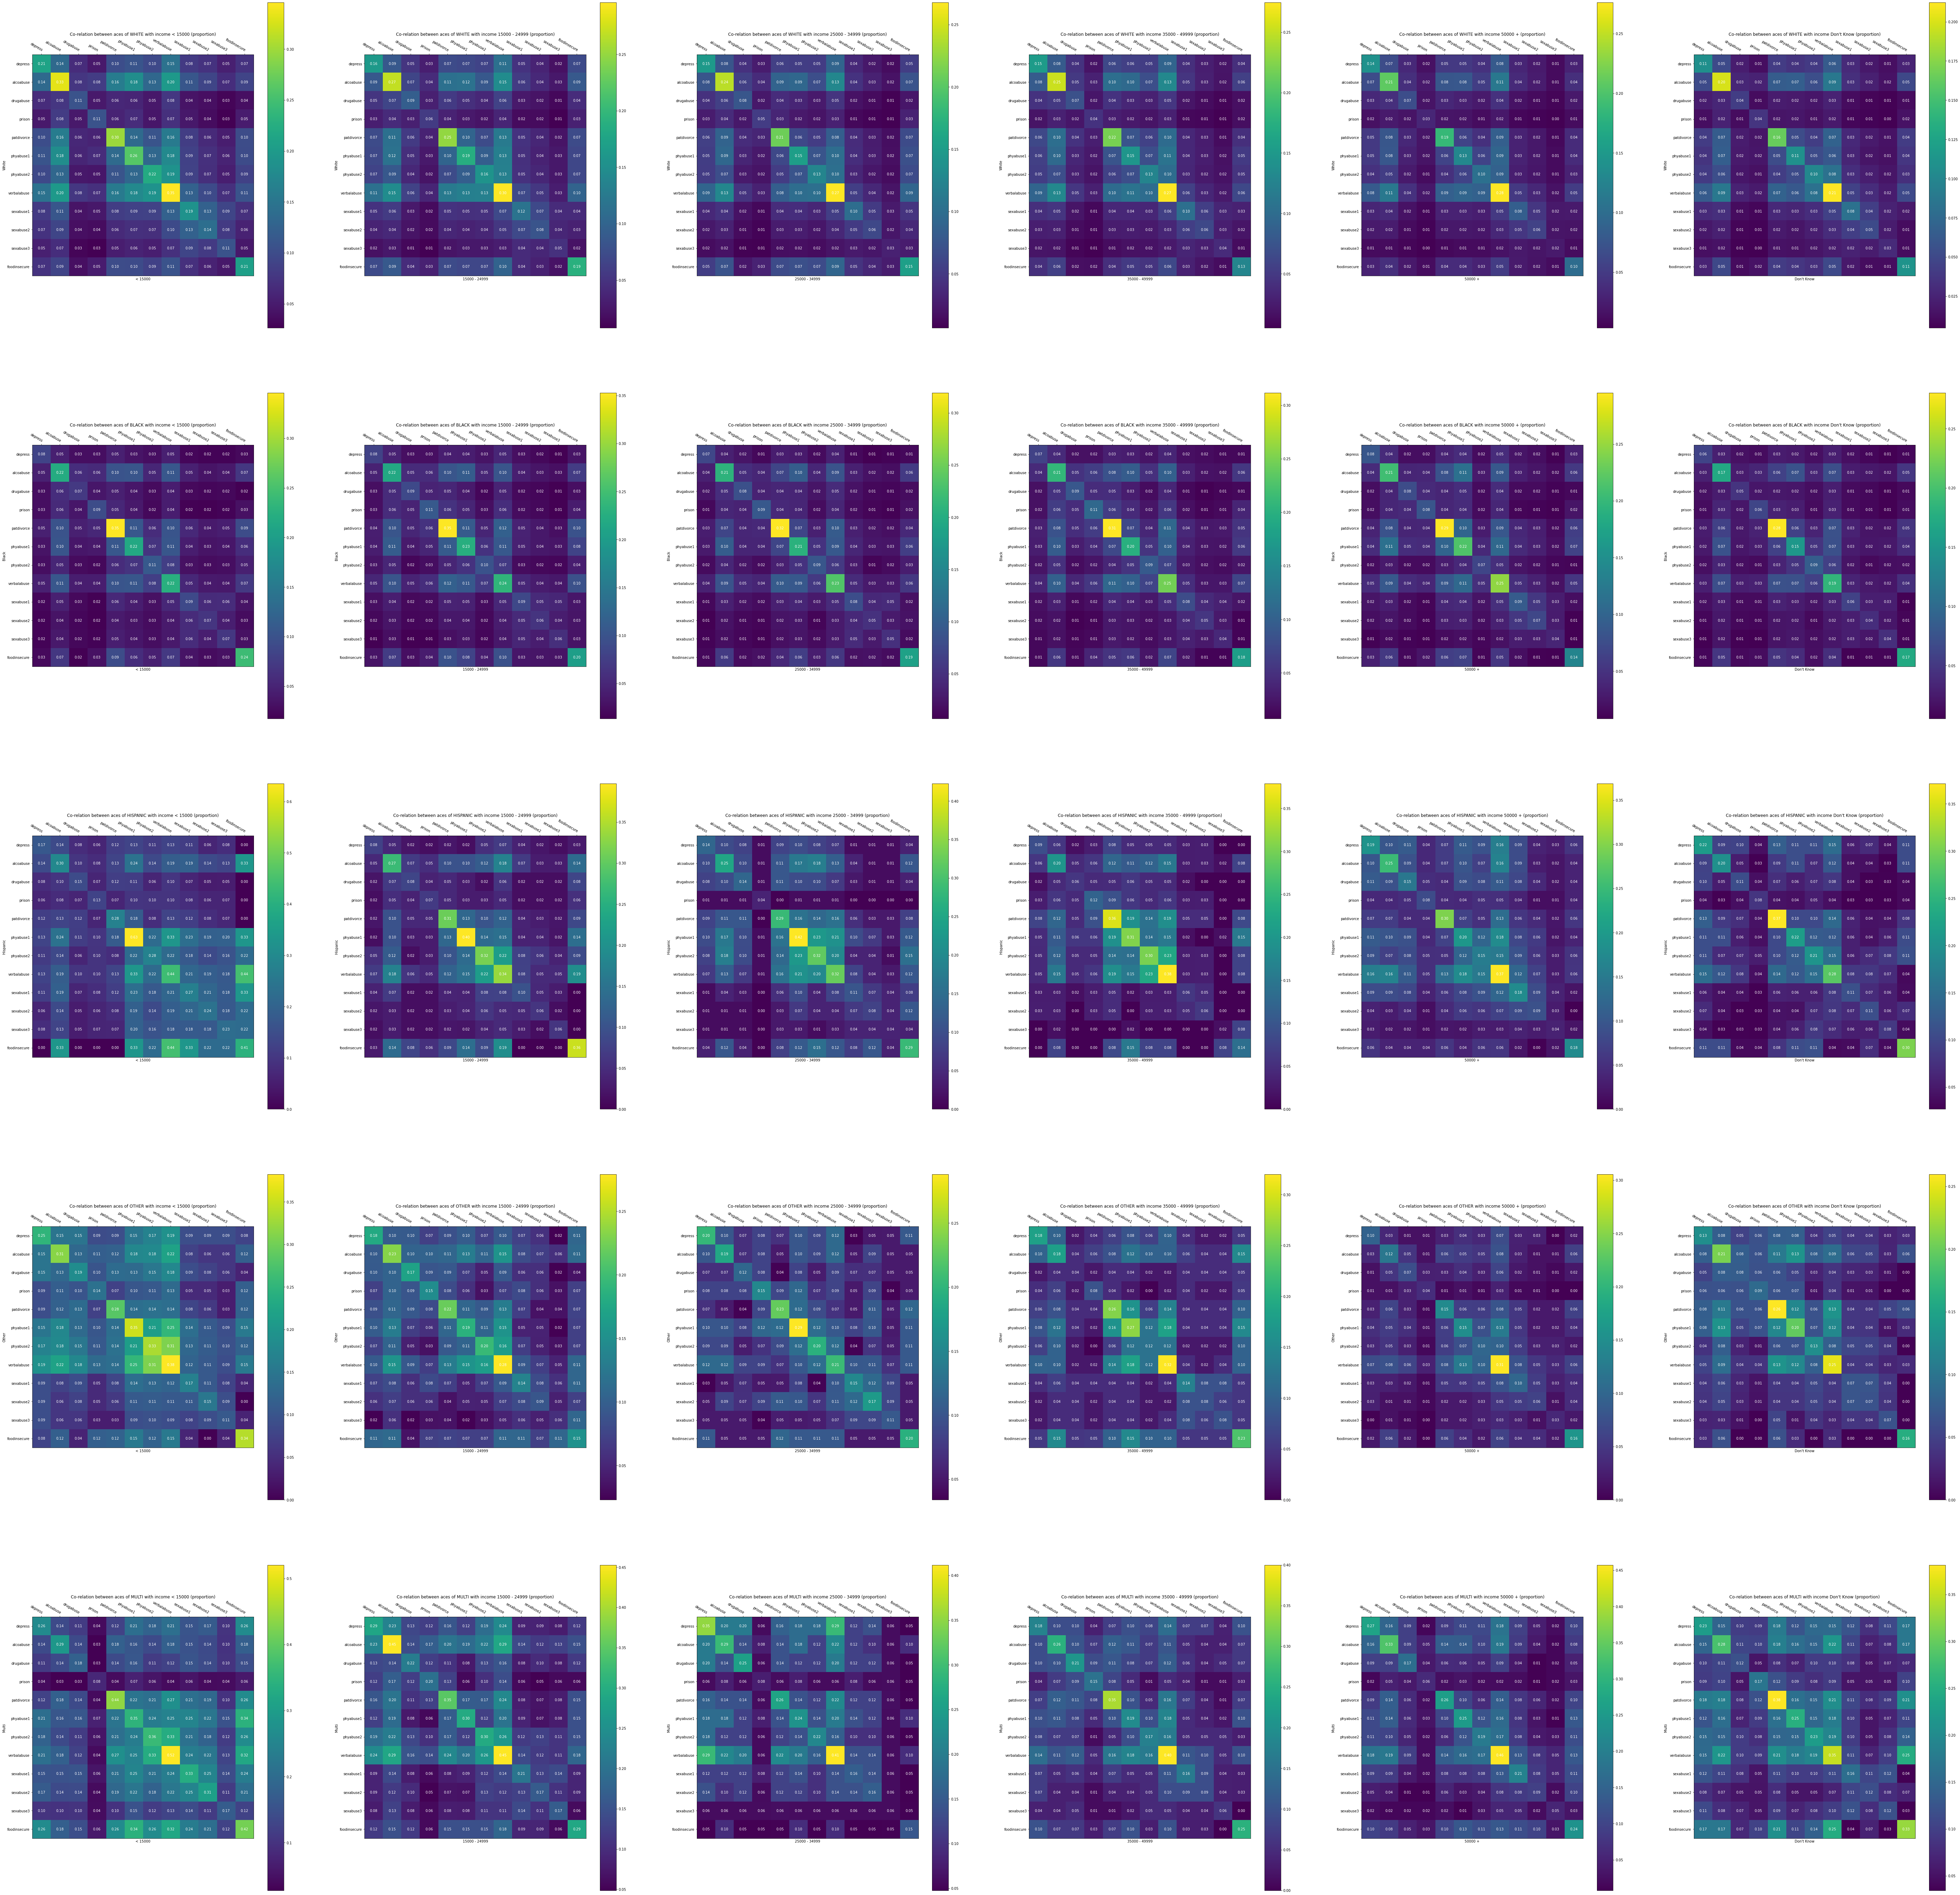

In [63]:
fig, axs = plt.subplots(len(race_list), len(income_list), figsize = (100, 100))
for r_index in range(len(race_list)):
    for i_index in range(len(income_list)):
        r = list(race_list.keys())[r_index]
        i = list(income_list.keys())[i_index]
        
        ri_dist = ri_group_dist[r][i]
        ax = axs[r_index, i_index]
        im = ax.imshow(ri_dist.to_numpy())
        cbar = ax.figure.colorbar(im, ax = ax)
        cbar.ax.set_ylabel('', rotation = -90, va = 'bottom')

        ax.set_xticks(np.arange(len(ace_list)))
        ax.set_yticks(np.arange(len(ace_list)))
        # ... and label them with the respective list entries
        ax.set_xticklabels(list(ace_list.values()))
        ax.set_yticklabels(list(ace_list.values()))

        ax.tick_params(top=True, bottom=False,
                           labeltop=True, labelbottom=False)

        ax.set_title('Co-relation between aces of ' + \
                     race_list[r].upper() + ' with income ' + 
                     income_list[i] + ' (proportion)')

        plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
                     rotation_mode="anchor")

        for m in range(len(ace_list)):
            for n in range(len(ace_list)):
                text = ax.text(n, m, '{:.2f}'.format(ri_dist.to_numpy()[m, n]),
                               ha="center", va="center", color="w")

        ax.set(xlabel=income_list[i], ylabel=race_list[r])

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
plt.show()
# plt.savefig('co_rel_dist.pdf')

In [64]:
# calculate Correlation of multiple aces combination
def multi_coh(gpdata, aces):
    gpdata = gpdata[gpdata[aces].isin([0,1]).all(axis = 1)]
    if len(aces) < 2:
        return 0
    return gpdata[aces[0]].corr(gpdata[aces[1]])

In [69]:
coh_rel_matrix = []
for ace1 in ace_list.values():
    two_dist = [multi_coh(bf_uni_code, [ace1, ace2]) for ace2 in ace_list.values()]    
    coh_rel_matrix.append(two_dist)
coh_rel_matrix = pd.DataFrame(coh_rel_matrix, index = list(ace_list.values()), 
                              columns = list(ace_list.values()))
coh_rel_matrix

depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       1.000000   0.271605   0.314063  0.188478    0.162860   0.243295   
alcoabuse     0.271605   1.000000   0.290821  0.245762    0.206487   0.375321   
drugabuse     0.314063   0.290821   1.000000  0.375520    0.212120   0.233381   
prison        0.188478   0.245762   0.375520  1.000000    0.197858   0.223808   
patdivorce    0.162860   0.206487   0.212120  0.197858    1.000000   0.249571   
phyabuse1     0.243295   0.375321   0.233381  0.223808    0.249571   1.000000   
phyabuse2     0.287580   0.265716   0.214547  0.168359    0.179992   0.410095   
verbalabuse   0.305399   0.311541   0.235399  0.175389    0.194386   0.367056   
sexabuse1     0.239794   0.186025   0.187016  0.139740    0.144053   0.216376   
sexabuse2     0.217600   0.161006   0.181871  0.141290    0.135245   0.200500   
sexabuse3     0.181540   0.155666   0.173364  0.133806    0.122906   0.198943   
foodinsecure  0.181512   0.210778   0.157159  0.188783    0.180882   0.268779   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.287580     0.305399   0.239794   0.217600   0.181540   
alcoabuse      0.265716     0.311541   0.186025   0.161006   0.155666   
drugabuse      0.214547     0.235399   0.187016   0.181871   0.173364   
prison         0.168359     0.175389   0.139740   0.141290   0.133806   
patdivorce     0.179992     0.194386   0.144053   0.135245   0.122906   
phyabuse1      0.410095     0.367056   0.216376   0.200500   0.198943   
phyabuse2      1.000000     0.454939   0.258856   0.237144   0.233873   
verbalabuse    0.454939     1.000000   0.244162   0.211761   0.187544   
sexabuse1      0.258856     0.244162   1.000000   0.675409   0.550025   
sexabuse2      0.237144     0.211761   0.675409   1.000000   0.554704   
sexabuse3      0.233873     0.187544   0.550025   0.554704   1.000000   
foodinsecure   0.245791     0.228721   0.166670   0.168556   0.178605   

              foodinsecure  
depress           0.181512  
alcoabuse         0.210778  
drugabuse         0.157159  
prison            0.188783  
patdivorce        0.180882  
phyabuse1         0.268779  
phyabuse2         0.245791  
verbalabuse       0.228721  
sexabuse1         0.166670  
sexabuse2         0.168556  
sexabuse3         0.178605  
foodinsecure      1.000000

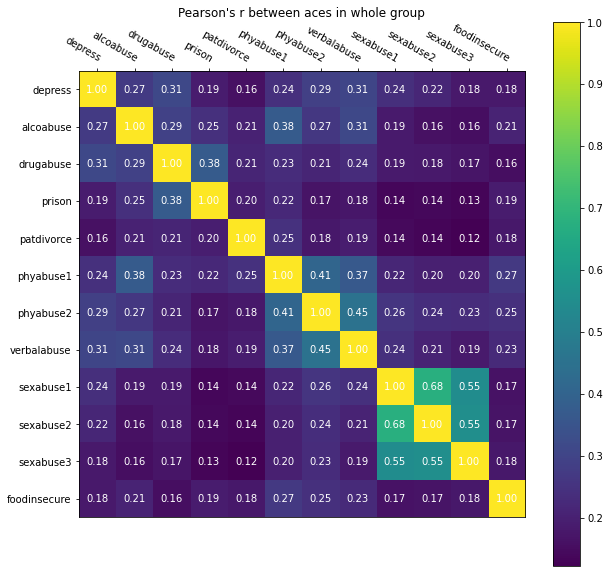

In [70]:
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(coh_rel_matrix.to_numpy())
cbar = ax.figure.colorbar(im, ax = ax)
cbar.ax.set_ylabel('', rotation = -90, va = 'bottom')

ax.set_xticks(np.arange(len(ace_list)))
ax.set_yticks(np.arange(len(ace_list)))
# ... and label them with the respective list entries
ax.set_xticklabels(list(ace_list.values()))
ax.set_yticklabels(list(ace_list.values()))

ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

ax.set_title("Pearson's r between aces in whole group")

plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

for i in range(len(ace_list)):
    for j in range(len(ace_list)):
        text = ax.text(j, i, '{:.2f}'.format(coh_rel_matrix.to_numpy()[i, j]),
                       ha="center", va="center", color="w")

#fig.tight_layout()
plt.show()

In [66]:
ri_group_psr = {}
for r in race_list.keys():
    ri_group_psr[r] = {}
    for i in income_list.keys():
        gpdata = bf_uni_code[(bf_uni_code[['_RACE_G1', '_INCOMG']] == [r,i]).all(axis = 1)]
        
        coh_rel_matrix = []
        for ace1 in ace_list.values():
            two_dist = [multi_coh(gpdata, [ace1, ace2]) for ace2 in ace_list.values()]    
            coh_rel_matrix.append(two_dist)
        coh_rel_matrix = pd.DataFrame(coh_rel_matrix, index = list(ace_list.values()), 
                                      columns = list(ace_list.values()))
        ri_group_psr[r][i] = coh_rel_matrix

In [67]:
for r in race_list.keys():
    for i in income_list.keys():
        ri_psr = ri_group_psr[r][i]
        print('Race: ' + race_list[r] + ', Income: ' + income_list[i])
        display(ri_psr)
        print('')

Race: White, Income: < 15000


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       1.000000   0.339260   0.341352  0.199269    0.212803   0.316143   
alcoabuse     0.339260   1.000000   0.276311  0.326182    0.288413   0.469793   
drugabuse     0.341352   0.276311   1.000000  0.389138    0.221294   0.228331   
prison        0.199269   0.326182   0.389138  1.000000    0.201474   0.285583   
patdivorce    0.212803   0.288413   0.221294  0.201474    1.000000   0.312183   
phyabuse1     0.316143   0.469793   0.228331  0.285583    0.312183   1.000000   
phyabuse2     0.301149   0.300629   0.182851  0.173409    0.232137   0.424864   
verbalabuse   0.376113   0.368790   0.276458  0.232346    0.257858   0.429557   
sexabuse1     0.253194   0.265218   0.192003  0.222500    0.161777   0.236059   
sexabuse2     0.300498   0.276977   0.225612  0.208643    0.145765   0.234518   
sexabuse3     0.251883   0.224851   0.203603  0.155199    0.146975   0.227308   
foodinsecure  0.187607   0.183750   0.144701  0.241050    0.232281   0.262772   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.301149     0.376113   0.253194   0.300498   0.251883   
alcoabuse      0.300629     0.368790   0.265218   0.276977   0.224851   
drugabuse      0.182851     0.276458   0.192003   0.225612   0.203603   
prison         0.173409     0.232346   0.222500   0.208643   0.155199   
patdivorce     0.232137     0.257858   0.161777   0.145765   0.146975   
phyabuse1      0.424864     0.429557   0.236059   0.234518   0.227308   
phyabuse2      1.000000     0.566333   0.302290   0.281692   0.243674   
verbalabuse    0.566333     1.000000   0.328587   0.302290   0.234350   
sexabuse1      0.302290     0.328587   1.000000   0.746567   0.617500   
sexabuse2      0.281692     0.302290   0.746567   1.000000   0.632486   
sexabuse3      0.243674     0.234350   0.617500   0.632486   1.000000   
foodinsecure   0.269104     0.192328   0.182936   0.193765   0.188029   

              foodinsecure  
depress           0.187607  
alcoabuse         0.183750  
drugabuse         0.144701  
prison            0.241050  
patdivorce        0.232281  
phyabuse1         0.262772  
phyabuse2         0.269104  
verbalabuse       0.192328  
sexabuse1         0.182936  
sexabuse2         0.193765  
sexabuse3         0.188029  
foodinsecure      1.000000


Race: White, Income: 15000 - 24999


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       1.000000   0.264880   0.341026  0.259900    0.209799   0.277435   
alcoabuse     0.264880   1.000000   0.324522  0.264794    0.242944   0.384458   
drugabuse     0.341026   0.324522   1.000000  0.414593    0.261279   0.249844   
prison        0.259900   0.264794   0.414593  1.000000    0.206683   0.191290   
patdivorce    0.209799   0.242944   0.261279  0.206683    1.000000   0.318997   
phyabuse1     0.277435   0.384458   0.249844  0.191290    0.318997   1.000000   
phyabuse2     0.302740   0.281098   0.234588  0.171055    0.222092   0.462175   
verbalabuse   0.385822   0.341143   0.274043  0.195051    0.269076   0.434614   
sexabuse1     0.255795   0.183667   0.183467  0.138171    0.148865   0.207269   
sexabuse2     0.224992   0.155182   0.186641  0.178099    0.154147   0.194116   
sexabuse3     0.162013   0.141875   0.160600  0.101800    0.114326   0.204312   
foodinsecure  0.308531   0.221275   0.231657  0.224888    0.176000   0.262432   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.302740     0.385822   0.255795   0.224992   0.162013   
alcoabuse      0.281098     0.341143   0.183667   0.155182   0.141875   
drugabuse      0.234588     0.274043   0.183467   0.186641   0.160600   
prison         0.171055     0.195051   0.138171   0.178099   0.101800   
patdivorce     0.222092     0.269076   0.148865   0.154147   0.114326   
phyabuse1      0.462175     0.434614   0.207269   0.194116   0.204312   
phyabuse2      1.000000     0.522938   0.266402   0.263250   0.239864   
verbalabuse    0.522938     1.000000   0.252910   0.235594   0.175010   
sexabuse1      0.266402     0.252910   1.000000   0.704971   0.556099   
sexabuse2      0.263250     0.235594   0.704971   1.000000   0.601657   
sexabuse3      0.239864     0.175010   0.556099   0.601657   1.000000   
foodinsecure   0.309047     0.265065   0.169520   0.162660   0.145838   

              foodinsecure  
depress           0.308531  
alcoabuse         0.221275  
drugabuse         0.231657  
prison            0.224888  
patdivorce        0.176000  
phyabuse1         0.262432  
phyabuse2         0.309047  
verbalabuse       0.265065  
sexabuse1         0.169520  
sexabuse2         0.162660  
sexabuse3         0.145838  
foodinsecure      1.000000


Race: White, Income: 25000 - 34999


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       1.000000   0.269499   0.348657  0.241956    0.176527   0.247052   
alcoabuse     0.269499   1.000000   0.334093  0.272021    0.225585   0.376419   
drugabuse     0.348657   0.334093   1.000000  0.324981    0.225296   0.235952   
prison        0.241956   0.272021   0.324981  1.000000    0.249586   0.203069   
patdivorce    0.176527   0.225585   0.225296  0.249586    1.000000   0.217907   
phyabuse1     0.247052   0.376419   0.235952  0.203069    0.217907   1.000000   
phyabuse2     0.300142   0.276137   0.186444  0.194159    0.196783   0.467750   
verbalabuse   0.330682   0.336985   0.215442  0.168632    0.159325   0.366890   
sexabuse1     0.214179   0.164998   0.159138  0.113773    0.159499   0.246530   
sexabuse2     0.165568   0.148029   0.151304  0.113616    0.131069   0.204723   
sexabuse3     0.180914   0.169539   0.134508  0.132791    0.136393   0.205189   
foodinsecure  0.261340   0.229992   0.178462  0.311336    0.238456   0.354384   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.300142     0.330682   0.214179   0.165568   0.180914   
alcoabuse      0.276137     0.336985   0.164998   0.148029   0.169539   
drugabuse      0.186444     0.215442   0.159138   0.151304   0.134508   
prison         0.194159     0.168632   0.113773   0.113616   0.132791   
patdivorce     0.196783     0.159325   0.159499   0.131069   0.136393   
phyabuse1      0.467750     0.366890   0.246530   0.204723   0.205189   
phyabuse2      1.000000     0.465402   0.230009   0.180202   0.205568   
verbalabuse    0.465402     1.000000   0.212991   0.173484   0.160373   
sexabuse1      0.230009     0.212991   1.000000   0.626477   0.440954   
sexabuse2      0.180202     0.173484   0.626477   1.000000   0.492178   
sexabuse3      0.205568     0.160373   0.440954   0.492178   1.000000   
foodinsecure   0.339499     0.289632   0.257661   0.244902   0.277616   

              foodinsecure  
depress           0.261340  
alcoabuse         0.229992  
drugabuse         0.178462  
prison            0.311336  
patdivorce        0.238456  
phyabuse1         0.354384  
phyabuse2         0.339499  
verbalabuse       0.289632  
sexabuse1         0.257661  
sexabuse2         0.244902  
sexabuse3         0.277616  
foodinsecure      1.000000


Race: White, Income: 35000 - 49999


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       1.000000   0.276286   0.358969  0.173184    0.203682   0.267952   
alcoabuse     0.276286   1.000000   0.282615  0.210078    0.260745   0.399319   
drugabuse     0.358969   0.282615   1.000000  0.352873    0.273001   0.265194   
prison        0.173184   0.210078   0.352873  1.000000    0.212405   0.243836   
patdivorce    0.203682   0.260745   0.273001  0.212405    1.000000   0.300334   
phyabuse1     0.267952   0.399319   0.265194  0.243836    0.300334   1.000000   
phyabuse2     0.290969   0.263494   0.246410  0.194736    0.216224   0.451344   
verbalabuse   0.314545   0.318177   0.243699  0.183149    0.214920   0.436717   
sexabuse1     0.229067   0.158837   0.170757  0.106005    0.099467   0.194706   
sexabuse2     0.205673   0.125807   0.156269  0.137611    0.116797   0.206634   
sexabuse3     0.217976   0.121462   0.132816  0.090500    0.070684   0.174380   
foodinsecure  0.221110   0.203699   0.115973  0.163822    0.146468   0.334966   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.290969     0.314545   0.229067   0.205673   0.217976   
alcoabuse      0.263494     0.318177   0.158837   0.125807   0.121462   
drugabuse      0.246410     0.243699   0.170757   0.156269   0.132816   
prison         0.194736     0.183149   0.106005   0.137611   0.090500   
patdivorce     0.216224     0.214920   0.099467   0.116797   0.070684   
phyabuse1      0.451344     0.436717   0.194706   0.206634   0.174380   
phyabuse2      1.000000     0.437515   0.213446   0.207936   0.208471   
verbalabuse    0.437515     1.000000   0.206595   0.157871   0.159564   
sexabuse1      0.213446     0.206595   1.000000   0.650010   0.516378   
sexabuse2      0.207936     0.157871   0.650010   1.000000   0.540935   
sexabuse3      0.208471     0.159564   0.516378   0.540935   1.000000   
foodinsecure   0.316935     0.247432   0.183521   0.166697   0.154683   

              foodinsecure  
depress           0.221110  
alcoabuse         0.203699  
drugabuse         0.115973  
prison            0.163822  
patdivorce        0.146468  
phyabuse1         0.334966  
phyabuse2         0.316935  
verbalabuse       0.247432  
sexabuse1         0.183521  
sexabuse2         0.166697  
sexabuse3         0.154683  
foodinsecure      1.000000


Race: White, Income: 50000 +


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       1.000000   0.259868   0.292024  0.177763    0.168045   0.260421   
alcoabuse     0.259868   1.000000   0.259872  0.216357    0.241143   0.372234   
drugabuse     0.292024   0.259872   1.000000  0.343628    0.218438   0.229365   
prison        0.177763   0.216357   0.343628  1.000000    0.179941   0.224162   
patdivorce    0.168045   0.241143   0.218438  0.179941    1.000000   0.265769   
phyabuse1     0.260421   0.372234   0.229365  0.224162    0.265769   1.000000   
phyabuse2     0.265649   0.255197   0.204822  0.160102    0.187447   0.437288   
verbalabuse   0.269742   0.301297   0.210826  0.142380    0.200735   0.378609   
sexabuse1     0.204927   0.157449   0.153769  0.116341    0.130249   0.197441   
sexabuse2     0.185053   0.126963   0.133679  0.095534    0.116991   0.179135   
sexabuse3     0.150414   0.109454   0.145837  0.096874    0.089209   0.163828   
foodinsecure  0.172081   0.187735   0.215073  0.178601    0.187447   0.247817   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.265649     0.269742   0.204927   0.185053   0.150414   
alcoabuse      0.255197     0.301297   0.157449   0.126963   0.109454   
drugabuse      0.204822     0.210826   0.153769   0.133679   0.145837   
prison         0.160102     0.142380   0.116341   0.095534   0.096874   
patdivorce     0.187447     0.200735   0.130249   0.116991   0.089209   
phyabuse1      0.437288     0.378609   0.197441   0.179135   0.163828   
phyabuse2      1.000000     0.430542   0.208573   0.191896   0.188158   
verbalabuse    0.430542     1.000000   0.202380   0.170836   0.154778   
sexabuse1      0.208573     0.202380   1.000000   0.652210   0.474955   
sexabuse2      0.191896     0.170836   0.652210   1.000000   0.499094   
sexabuse3      0.188158     0.154778   0.474955   0.499094   1.000000   
foodinsecure   0.217487     0.214890   0.189772   0.179002   0.222364   

              foodinsecure  
depress           0.172081  
alcoabuse         0.187735  
drugabuse         0.215073  
prison            0.178601  
patdivorce        0.187447  
phyabuse1         0.247817  
phyabuse2         0.217487  
verbalabuse       0.214890  
sexabuse1         0.189772  
sexabuse2         0.179002  
sexabuse3         0.222364  
foodinsecure      1.000000


Race: White, Income: Don't Know


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       1.000000   0.241442   0.273152  0.144752    0.211077   0.247840   
alcoabuse     0.241442   1.000000   0.236295  0.228816    0.223863   0.366084   
drugabuse     0.273152   0.236295   1.000000  0.277615    0.187711   0.242522   
prison        0.144752   0.228816   0.277615  1.000000    0.153237   0.228014   
patdivorce    0.211077   0.223863   0.187711  0.153237    1.000000   0.312877   
phyabuse1     0.247840   0.366084   0.242522  0.228014    0.312877   1.000000   
phyabuse2     0.318212   0.292993   0.211581  0.187942    0.233717   0.443830   
verbalabuse   0.329107   0.289967   0.200147  0.153976    0.238210   0.321521   
sexabuse1     0.251889   0.153582   0.147656  0.108671    0.154958   0.203890   
sexabuse2     0.196215   0.148474   0.137745  0.119471    0.143925   0.164791   
sexabuse3     0.190822   0.139829   0.142786  0.119565    0.155567   0.198134   
foodinsecure  0.171313   0.244101   0.133291  0.206915    0.218144   0.277159   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.318212     0.329107   0.251889   0.196215   0.190822   
alcoabuse      0.292993     0.289967   0.153582   0.148474   0.139829   
drugabuse      0.211581     0.200147   0.147656   0.137745   0.142786   
prison         0.187942     0.153976   0.108671   0.119471   0.119565   
patdivorce     0.233717     0.238210   0.154958   0.143925   0.155567   
phyabuse1      0.443830     0.321521   0.203890   0.164791   0.198134   
phyabuse2      1.000000     0.501398   0.292451   0.264681   0.266008   
verbalabuse    0.501398     1.000000   0.249309   0.225954   0.210278   
sexabuse1      0.292451     0.249309   1.000000   0.660830   0.492502   
sexabuse2      0.264681     0.225954   0.660830   1.000000   0.524948   
sexabuse3      0.266008     0.210278   0.492502   0.524948   1.000000   
foodinsecure   0.254293     0.247308   0.123336   0.091689   0.149852   

              foodinsecure  
depress           0.171313  
alcoabuse         0.244101  
drugabuse         0.133291  
prison            0.206915  
patdivorce        0.218144  
phyabuse1         0.277159  
phyabuse2         0.254293  
verbalabuse       0.247308  
sexabuse1         0.123336  
sexabuse2         0.091689  
sexabuse3         0.149852  
foodinsecure      1.000000


Race: Black, Income: < 15000


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       1.000000   0.243634   0.329052  0.281809    0.144338   0.152716   
alcoabuse     0.243634   1.000000   0.417480  0.300781    0.145853   0.348756   
drugabuse     0.329052   0.417480   1.000000  0.413271    0.184086   0.207636   
prison        0.281809   0.300781   0.413271  1.000000    0.160766   0.165727   
patdivorce    0.144338   0.145853   0.184086  0.160766    1.000000   0.167880   
phyabuse1     0.152716   0.348756   0.207636  0.165727    0.167880   1.000000   
phyabuse2     0.254821   0.234826   0.239670  0.154630    0.163576   0.345998   
verbalabuse   0.238443   0.331304   0.247820  0.188718    0.150076   0.344653   
sexabuse1     0.209542   0.222362   0.263711  0.134011    0.213609   0.207467   
sexabuse2     0.224879   0.197658   0.278503  0.168840    0.178270   0.193079   
sexabuse3     0.215543   0.231729   0.302734  0.187964    0.194712   0.213541   
foodinsecure  0.083096   0.172380   0.055213  0.108578    0.156971   0.130824   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.254821     0.238443   0.209542   0.224879   0.215543   
alcoabuse      0.234826     0.331304   0.222362   0.197658   0.231729   
drugabuse      0.239670     0.247820   0.263711   0.278503   0.302734   
prison         0.154630     0.188718   0.134011   0.168840   0.187964   
patdivorce     0.163576     0.150076   0.213609   0.178270   0.194712   
phyabuse1      0.345998     0.344653   0.207467   0.193079   0.213541   
phyabuse2      1.000000     0.426087   0.262437   0.267608   0.267770   
verbalabuse    0.426087     1.000000   0.283204   0.244997   0.230710   
sexabuse1      0.262437     0.283204   1.000000   0.714105   0.725224   
sexabuse2      0.267608     0.244997   0.714105   1.000000   0.627843   
sexabuse3      0.267770     0.230710   0.725224   0.627843   1.000000   
foodinsecure   0.203267     0.190582   0.163704   0.131604   0.199400   

              foodinsecure  
depress           0.083096  
alcoabuse         0.172380  
drugabuse         0.055213  
prison            0.108578  
patdivorce        0.156971  
phyabuse1         0.130824  
phyabuse2         0.203267  
verbalabuse       0.190582  
sexabuse1         0.163704  
sexabuse2         0.131604  
sexabuse3         0.199400  
foodinsecure      1.000000


Race: Black, Income: 15000 - 24999


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       1.000000   0.258386   0.273369  0.219250    0.108742   0.198979   
alcoabuse     0.258386   1.000000   0.302067  0.255481    0.142031   0.364775   
drugabuse     0.273369   0.302067   1.000000  0.426826    0.147859   0.149710   
prison        0.219250   0.255481   0.426826  1.000000    0.178923   0.188372   
patdivorce    0.108742   0.142031   0.147859  0.178923    1.000000   0.151596   
phyabuse1     0.198979   0.364775   0.149710  0.188372    0.151596   1.000000   
phyabuse2     0.299711   0.232232   0.127915  0.172319    0.098508   0.322402   
verbalabuse   0.264914   0.297075   0.216276  0.249463    0.177344   0.300939   
sexabuse1     0.269446   0.199988   0.185455  0.170446    0.136367   0.216334   
sexabuse2     0.250032   0.182359   0.200880  0.182911    0.123960   0.210944   
sexabuse3     0.161190   0.148220   0.126046  0.116964    0.077759   0.194874   
foodinsecure  0.128053   0.185368   0.092595  0.157487    0.198051   0.253929   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.299711     0.264914   0.269446   0.250032   0.161190   
alcoabuse      0.232232     0.297075   0.199988   0.182359   0.148220   
drugabuse      0.127915     0.216276   0.185455   0.200880   0.126046   
prison         0.172319     0.249463   0.170446   0.182911   0.116964   
patdivorce     0.098508     0.177344   0.136367   0.123960   0.077759   
phyabuse1      0.322402     0.300939   0.216334   0.210944   0.194874   
phyabuse2      1.000000     0.380251   0.200045   0.195543   0.195303   
verbalabuse    0.380251     1.000000   0.257734   0.231106   0.220463   
sexabuse1      0.200045     0.257734   1.000000   0.709871   0.683313   
sexabuse2      0.195543     0.231106   0.709871   1.000000   0.635138   
sexabuse3      0.195303     0.220463   0.683313   0.635138   1.000000   
foodinsecure   0.182225     0.290786   0.124863   0.164372   0.150517   

              foodinsecure  
depress           0.128053  
alcoabuse         0.185368  
drugabuse         0.092595  
prison            0.157487  
patdivorce        0.198051  
phyabuse1         0.253929  
phyabuse2         0.182225  
verbalabuse       0.290786  
sexabuse1         0.124863  
sexabuse2         0.164372  
sexabuse3         0.150517  
foodinsecure      1.000000


Race: Black, Income: 25000 - 34999


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       1.000000   0.187633   0.262083  0.095806    0.080389   0.140101   
alcoabuse     0.187633   1.000000   0.269139  0.179951    0.037056   0.341762   
drugabuse     0.262083   0.269139   1.000000  0.365853    0.118629   0.190364   
prison        0.095806   0.179951   0.365853  1.000000    0.118677   0.163913   
patdivorce    0.080389   0.037056   0.118629  0.118677    1.000000   0.025846   
phyabuse1     0.140101   0.341762   0.190364  0.163913    0.025846   1.000000   
phyabuse2     0.132051   0.186706   0.213737  0.107742    0.055260   0.296124   
verbalabuse   0.167301   0.225125   0.222329  0.148707    0.119300   0.263084   
sexabuse1     0.124299   0.155814   0.206417  0.127886    0.067248   0.209372   
sexabuse2     0.063199   0.129133   0.163602  0.111035    0.066459   0.170061   
sexabuse3     0.127779   0.095007   0.147674  0.076928    0.046709   0.161771   
foodinsecure  0.020127   0.172702   0.049639  0.022505   -0.043965   0.195013   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.132051     0.167301   0.124299   0.063199   0.127779   
alcoabuse      0.186706     0.225125   0.155814   0.129133   0.095007   
drugabuse      0.213737     0.222329   0.206417   0.163602   0.147674   
prison         0.107742     0.148707   0.127886   0.111035   0.076928   
patdivorce     0.055260     0.119300   0.067248   0.066459   0.046709   
phyabuse1      0.296124     0.263084   0.209372   0.170061   0.161771   
phyabuse2      1.000000     0.309623   0.284442   0.114077   0.193092   
verbalabuse    0.309623     1.000000   0.235723   0.187015   0.191593   
sexabuse1      0.284442     0.235723   1.000000   0.652031   0.731034   
sexabuse2      0.114077     0.187015   0.652031   1.000000   0.598047   
sexabuse3      0.193092     0.191593   0.731034   0.598047   1.000000   
foodinsecure   0.141366     0.104326   0.085040   0.150096   0.108214   

              foodinsecure  
depress           0.020127  
alcoabuse         0.172702  
drugabuse         0.049639  
prison            0.022505  
patdivorce       -0.043965  
phyabuse1         0.195013  
phyabuse2         0.141366  
verbalabuse       0.104326  
sexabuse1         0.085040  
sexabuse2         0.150096  
sexabuse3         0.108214  
foodinsecure      1.000000


Race: Black, Income: 35000 - 49999


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       1.000000   0.294900   0.210752  0.171364    0.115868   0.175565   
alcoabuse     0.294900   1.000000   0.294753  0.319702    0.118239   0.344956   
drugabuse     0.210752   0.294753   1.000000  0.411928    0.178212   0.121033   
prison        0.171364   0.319702   0.411928  1.000000    0.200440   0.184391   
patdivorce    0.115868   0.118239   0.178212  0.200440    1.000000   0.066587   
phyabuse1     0.175565   0.344956   0.121033  0.184391    0.066587   1.000000   
phyabuse2     0.230151   0.260209   0.110514  0.161184    0.089810   0.315613   
verbalabuse   0.206074   0.283205   0.152892  0.219868    0.169988   0.310411   
sexabuse1     0.221637   0.168747   0.088278  0.133093    0.168637   0.193604   
sexabuse2     0.245373   0.114277   0.039619  0.071925    0.113370   0.160876   
sexabuse3     0.213228   0.145010   0.126204  0.161807    0.162818   0.192142   
foodinsecure  0.028219   0.183204   0.027807  0.180401    0.052134   0.217368   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.230151     0.206074   0.221637   0.245373   0.213228   
alcoabuse      0.260209     0.283205   0.168747   0.114277   0.145010   
drugabuse      0.110514     0.152892   0.088278   0.039619   0.126204   
prison         0.161184     0.219868   0.133093   0.071925   0.161807   
patdivorce     0.089810     0.169988   0.168637   0.113370   0.162818   
phyabuse1      0.315613     0.310411   0.193604   0.160876   0.192142   
phyabuse2      1.000000     0.372879   0.251651   0.220323   0.228667   
verbalabuse    0.372879     1.000000   0.241880   0.130119   0.180489   
sexabuse1      0.251651     0.241880   1.000000   0.660255   0.590837   
sexabuse2      0.220323     0.130119   0.660255   1.000000   0.558397   
sexabuse3      0.228667     0.180489   0.590837   0.558397   1.000000   
foodinsecure   0.110335     0.214933   0.117558   0.065632   0.100104   

              foodinsecure  
depress           0.028219  
alcoabuse         0.183204  
drugabuse         0.027807  
prison            0.180401  
patdivorce        0.052134  
phyabuse1         0.217368  
phyabuse2         0.110335  
verbalabuse       0.214933  
sexabuse1         0.117558  
sexabuse2         0.065632  
sexabuse3         0.100104  
foodinsecure      1.000000


Race: Black, Income: 50000 +


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       1.000000   0.233165   0.178260  0.145913    0.097688   0.230743   
alcoabuse     0.233165   1.000000   0.205667  0.191921    0.104769   0.419267   
drugabuse     0.178260   0.205667   1.000000  0.489088    0.139116   0.268783   
prison        0.145913   0.191921   0.489088  1.000000    0.126063   0.226003   
patdivorce    0.097688   0.104769   0.139116  0.126063    1.000000   0.195064   
phyabuse1     0.230743   0.419267   0.268783  0.226003    0.195064   1.000000   
phyabuse2     0.174073   0.145347   0.179703  0.161485    0.100216   0.262877   
verbalabuse   0.206496   0.207259   0.224849  0.159983    0.070941   0.298976   
sexabuse1     0.219353   0.115174   0.137720  0.062462    0.113189   0.202745   
sexabuse2     0.182168   0.092634   0.177368  0.083191    0.110116   0.181779   
sexabuse3     0.131066   0.109354   0.161194  0.117662    0.064340   0.148538   
foodinsecure  0.219241   0.200193   0.071141  0.154939    0.147666   0.239447   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.174073     0.206496   0.219353   0.182168   0.131066   
alcoabuse      0.145347     0.207259   0.115174   0.092634   0.109354   
drugabuse      0.179703     0.224849   0.137720   0.177368   0.161194   
prison         0.161485     0.159983   0.062462   0.083191   0.117662   
patdivorce     0.100216     0.070941   0.113189   0.110116   0.064340   
phyabuse1      0.262877     0.298976   0.202745   0.181779   0.148538   
phyabuse2      1.000000     0.280273   0.245479   0.227456   0.222747   
verbalabuse    0.280273     1.000000   0.196723   0.155115   0.141615   
sexabuse1      0.245479     0.196723   1.000000   0.673904   0.521039   
sexabuse2      0.227456     0.155115   0.673904   1.000000   0.577132   
sexabuse3      0.222747     0.141615   0.521039   0.577132   1.000000   
foodinsecure   0.049539     0.161554   0.079431   0.019373   0.072004   

              foodinsecure  
depress           0.219241  
alcoabuse         0.200193  
drugabuse         0.071141  
prison            0.154939  
patdivorce        0.147666  
phyabuse1         0.239447  
phyabuse2         0.049539  
verbalabuse       0.161554  
sexabuse1         0.079431  
sexabuse2         0.019373  
sexabuse3         0.072004  
foodinsecure      1.000000


Race: Black, Income: Don't Know


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       1.000000   0.216700   0.311829  0.187949    0.099573   0.169388   
alcoabuse     0.216700   1.000000   0.238424  0.249118    0.063385   0.365757   
drugabuse     0.311829   0.238424   1.000000  0.378334    0.108265   0.209219   
prison        0.187949   0.249118   0.378334  1.000000    0.155404   0.210021   
patdivorce    0.099573   0.063385   0.108265  0.155404    1.000000   0.103566   
phyabuse1     0.169388   0.365757   0.209219  0.210021    0.103566   1.000000   
phyabuse2     0.168540   0.182543   0.188632  0.114998    0.068136   0.333924   
verbalabuse   0.187834   0.281793   0.239494  0.200408    0.130994   0.320464   
sexabuse1     0.231201   0.177291   0.217835  0.168055    0.138507   0.201721   
sexabuse2     0.165112   0.206143   0.232175  0.146491    0.106016   0.211899   
sexabuse3     0.083624   0.177300   0.127264  0.053360    0.090426   0.215366   
foodinsecure  0.025777   0.208316   0.064149  0.055873    0.057552   0.159730   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.168540     0.187834   0.231201   0.165112   0.083624   
alcoabuse      0.182543     0.281793   0.177291   0.206143   0.177300   
drugabuse      0.188632     0.239494   0.217835   0.232175   0.127264   
prison         0.114998     0.200408   0.168055   0.146491   0.053360   
patdivorce     0.068136     0.130994   0.138507   0.106016   0.090426   
phyabuse1      0.333924     0.320464   0.201721   0.211899   0.215366   
phyabuse2      1.000000     0.374245   0.219841   0.156773   0.202462   
verbalabuse    0.374245     1.000000   0.239659   0.208903   0.186708   
sexabuse1      0.219841     0.239659   1.000000   0.566569   0.554760   
sexabuse2      0.156773     0.208903   0.566569   1.000000   0.523907   
sexabuse3      0.202462     0.186708   0.554760   0.523907   1.000000   
foodinsecure   0.088263     0.118539  -0.011071   0.073088   0.059356   

              foodinsecure  
depress           0.025777  
alcoabuse         0.208316  
drugabuse         0.064149  
prison            0.055873  
patdivorce        0.057552  
phyabuse1         0.159730  
phyabuse2         0.088263  
verbalabuse       0.118539  
sexabuse1        -0.011071  
sexabuse2         0.073088  
sexabuse3         0.059356  
foodinsecure      1.000000


Race: Hispanic, Income: < 15000


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       1.000000   0.542108   0.441735  0.325010    0.371196   0.094449   
alcoabuse     0.542108   1.000000   0.362539  0.286436    0.213566   0.260643   
drugabuse     0.441735   0.362539   1.000000  0.424528    0.483450   0.119935   
prison        0.325010   0.286436   0.424528  1.000000    0.250459   0.084337   
patdivorce    0.371196   0.213566   0.483450  0.250459    1.000000  -0.003877   
phyabuse1     0.094449   0.260643   0.119935  0.084337   -0.003877   1.000000   
phyabuse2     0.379780   0.278111   0.157266  0.391965    0.044967   0.238152   
verbalabuse   0.277613   0.254214   0.206529  0.247717    0.055755   0.256968   
sexabuse1     0.440616   0.532525   0.168880  0.320350    0.206308   0.238418   
sexabuse2     0.182700   0.363479   0.102716  0.252413    0.118208   0.182821   
sexabuse3     0.284830   0.334459   0.099322  0.249907    0.099550   0.247546   
foodinsecure       NaN   0.550000        NaN       NaN   -0.316228   0.790569   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.379780     0.277613   0.440616   0.182700   0.284830   
alcoabuse      0.278111     0.254214   0.532525   0.363479   0.334459   
drugabuse      0.157266     0.206529   0.168880   0.102716   0.099322   
prison         0.391965     0.247717   0.320350   0.252413   0.249907   
patdivorce     0.044967     0.055755   0.206308   0.118208   0.099550   
phyabuse1      0.238152     0.256968   0.238418   0.182821   0.247546   
phyabuse2      1.000000     0.429082   0.546404   0.415800   0.532780   
verbalabuse    0.429082     1.000000   0.430163   0.419573   0.381481   
sexabuse1      0.546404     0.430163   1.000000   0.750285   0.690752   
sexabuse2      0.415800     0.419573   0.750285   1.000000   0.723214   
sexabuse3      0.532780     0.381481   0.690752   0.723214   1.000000   
foodinsecure   0.597614     1.000000   0.790569   0.597614   0.597614   

              foodinsecure  
depress                NaN  
alcoabuse         0.550000  
drugabuse              NaN  
prison                 NaN  
patdivorce       -0.316228  
phyabuse1         0.790569  
phyabuse2         0.597614  
verbalabuse       1.000000  
sexabuse1         0.790569  
sexabuse2         0.597614  
sexabuse3         0.597614  
foodinsecure      1.000000


Race: Hispanic, Income: 15000 - 24999


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       1.000000   0.216234   0.242149  0.149223   -0.002965  -0.100986   
alcoabuse     0.216234   1.000000   0.370015  0.307482    0.096269  -0.031492   
drugabuse     0.242149   0.370015   1.000000  0.462496    0.156624   0.001794   
prison        0.149223   0.307482   0.462496  1.000000    0.245404   0.026368   
patdivorce   -0.002965   0.096269   0.156624  0.245404    1.000000   0.025739   
phyabuse1    -0.100986  -0.031492   0.001794  0.026368    0.025739   1.000000   
phyabuse2     0.270518   0.174681  -0.036033  0.101739    0.026332   0.060974   
verbalabuse   0.348466   0.394942   0.250903  0.190229    0.091445   0.060072   
sexabuse1     0.413734   0.335823   0.111111  0.111111    0.070730  -0.012616   
sexabuse2     0.307698   0.143903   0.181913  0.181913    0.103288   0.115002   
sexabuse3     0.181913   0.138948   0.182356  0.182356    0.034816  -0.014730   
foodinsecure  0.094304   0.272166   0.227185  0.056796   -0.138292   0.430820   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.270518     0.348466   0.413734   0.307698   0.181913   
alcoabuse      0.174681     0.394942   0.335823   0.143903   0.138948   
drugabuse     -0.036033     0.250903   0.111111   0.181913   0.182356   
prison         0.101739     0.190229   0.111111   0.181913   0.182356   
patdivorce     0.026332     0.091445   0.070730   0.103288   0.034816   
phyabuse1      0.060974     0.060072  -0.012616   0.115002  -0.014730   
phyabuse2      1.000000     0.533502   0.324535   0.376116   0.169624   
verbalabuse    0.533502     1.000000   0.315865   0.231077   0.231993   
sexabuse1      0.324535     0.315865   1.000000   0.554545   0.341004   
sexabuse2      0.376116     0.231077   0.554545   1.000000   0.200413   
sexabuse3      0.169624     0.231993   0.341004   0.200413   1.000000   
foodinsecure   0.040379     0.426401  -0.167483  -0.167483  -0.161374   

              foodinsecure  
depress           0.094304  
alcoabuse         0.272166  
drugabuse         0.227185  
prison            0.056796  
patdivorce       -0.138292  
phyabuse1         0.430820  
phyabuse2         0.040379  
verbalabuse       0.426401  
sexabuse1        -0.167483  
sexabuse2        -0.167483  
sexabuse3        -0.161374  
foodinsecure      1.000000


Race: Hispanic, Income: 25000 - 34999


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       1.000000   0.417365   0.535484  0.117238    0.284019   0.227431   
alcoabuse     0.417365   1.000000   0.417365  0.040129    0.231772   0.321849   
drugabuse     0.535484   0.417365   1.000000  0.117238    0.512858   0.227431   
prison        0.117238   0.040129   0.117238  1.000000   -0.076139  -0.037930   
patdivorce    0.284019   0.231772   0.512858 -0.076139    1.000000   0.198140   
phyabuse1     0.227431   0.321849   0.227431 -0.037930    0.198140   1.000000   
phyabuse2     0.241654   0.498741   0.327788  0.006211    0.253012   0.413376   
verbalabuse   0.152321   0.246346   0.188565  0.064050    0.321131   0.367684   
sexabuse1    -0.014199   0.102062   0.113592 -0.073721    0.170389   0.326411   
sexabuse2     0.024218  -0.058026   0.024218 -0.062869    0.032275   0.252670   
sexabuse3     0.117238   0.040129   0.117238 -0.043478    0.178440   0.103809   
foodinsecure  0.150188   0.284961   0.150188 -0.121395    0.213844   0.342105   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.241654     0.152321  -0.014199   0.024218   0.117238   
alcoabuse      0.498741     0.246346   0.102062  -0.058026   0.040129   
drugabuse      0.327788     0.188565   0.113592   0.024218   0.117238   
prison         0.006211     0.064050  -0.073721  -0.062869  -0.043478   
patdivorce     0.253012     0.321131   0.170389   0.032275   0.178440   
phyabuse1      0.413376     0.367684   0.326411   0.252670   0.103809   
phyabuse2      1.000000     0.447328   0.042126   0.116758   0.006211   
verbalabuse    0.447328     1.000000   0.324426   0.114300   0.153824   
sexabuse1      0.042126     0.324426   1.000000   0.692902   0.589768   
sexabuse2      0.116758     0.114300   0.692902   1.000000   0.691564   
sexabuse3      0.006211     0.153824   0.589768   0.691564   1.000000   
foodinsecure   0.346844     0.218045   0.221842   0.363871   0.150188   

              foodinsecure  
depress           0.150188  
alcoabuse         0.284961  
drugabuse         0.150188  
prison           -0.121395  
patdivorce        0.213844  
phyabuse1         0.342105  
phyabuse2         0.346844  
verbalabuse       0.218045  
sexabuse1         0.221842  
sexabuse2         0.363871  
sexabuse3         0.150188  
foodinsecure      1.000000


Race: Hispanic, Income: 35000 - 49999


depress  alcoabuse  drugabuse    prison    patdivorce  \
depress       1.000000   0.373467   0.140563  0.205527  3.177064e-01   
alcoabuse     0.373467   1.000000   0.353197  0.282977  3.076549e-01   
drugabuse     0.140563   0.353197   1.000000  0.489354  2.960900e-01   
prison        0.205527   0.282977   0.489354  1.000000  3.635487e-01   
patdivorce    0.317706   0.307655   0.296090  0.363549  1.000000e+00   
phyabuse1     0.132874   0.284177   0.384111  0.156098  3.892336e-01   
phyabuse2     0.135534   0.336613   0.247037  0.058161  1.548018e-01   
verbalabuse   0.079018   0.398633   0.194374  0.092802  2.534464e-01   
sexabuse1     0.360669   0.192055   0.200820  0.293798  2.081718e-01   
sexabuse2     0.405889   0.206725  -0.057260  0.292770  2.168906e-01   
sexabuse3    -0.039862   0.250000  -0.032009 -0.046829 -9.630261e-02   
foodinsecure -0.158114   0.133333  -0.158114 -0.233550 -1.133117e-17   

              phyabuse1  phyabuse2  verbalabuse  sexabuse1  sexabuse2  \
depress        0.132874   0.135534     0.079018   0.360669   0.405889   
alcoabuse      0.284177   0.336613     0.398633   0.192055   0.206725   
drugabuse      0.384111   0.247037     0.194374   0.200820  -0.057260   
prison         0.156098   0.058161     0.092802   0.293798   0.292770   
patdivorce     0.389234   0.154802     0.253446   0.208172   0.216891   
phyabuse1      1.000000   0.231141     0.180647  -0.034816  -0.171102   
phyabuse2      0.231141   1.000000     0.504592   0.106697   0.114793   
verbalabuse    0.180647   0.504592     1.000000   0.069388   0.075673   
sexabuse1     -0.034816   0.106697     0.069388   1.000000   0.858898   
sexabuse2     -0.171102   0.114793     0.075673   0.858898   1.000000   
sexabuse3      0.186871  -0.083333    -0.095637  -0.032009  -0.032530   
foodinsecure   0.566667   0.030429    -0.057735  -0.233550  -0.300000   

              sexabuse3  foodinsecure  
depress       -0.039862 -1.581139e-01  
alcoabuse      0.250000  1.333333e-01  
drugabuse     -0.032009 -1.581139e-01  
prison        -0.046829 -2.335497e-01  
patdivorce    -0.096303 -1.133117e-17  
phyabuse1      0.186871  5.666667e-01  
phyabuse2     -0.083333  3.042903e-02  
verbalabuse   -0.095637 -5.773503e-02  
sexabuse1     -0.032009 -2.335497e-01  
sexabuse2     -0.032530 -3.000000e-01  
sexabuse3      1.000000  5.270463e-01  
foodinsecure   0.527046  1.000000e+00


Race: Hispanic, Income: 50000 +


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       1.000000   0.295161   0.556450  0.239906    0.062655   0.436440   
alcoabuse     0.295161   1.000000   0.351110  0.173117   -0.029902   0.282238   
drugabuse     0.556450   0.351110   1.000000  0.373221    0.030707   0.442515   
prison        0.239906   0.173117   0.373221  1.000000    0.185265   0.232015   
patdivorce    0.062655  -0.029902   0.030707  0.185265    1.000000   0.092269   
phyabuse1     0.436440   0.282238   0.442515  0.232015    0.092269   1.000000   
phyabuse2     0.436468   0.206721   0.479532  0.359715    0.082903   0.619379   
verbalabuse   0.469204   0.359471   0.321221  0.161318    0.133721   0.561966   
sexabuse1     0.352841   0.259228   0.396731  0.211155    0.055180   0.293205   
sexabuse2     0.156420   0.045091   0.280485  0.079137    0.137021   0.395047   
sexabuse3     0.296530   0.156712   0.243309  0.216691    0.171230   0.193415   
foodinsecure  0.442719   0.155380   0.311872  0.350000    0.340068   0.171518   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.436468     0.469204   0.352841   0.156420   0.296530   
alcoabuse      0.206721     0.359471   0.259228   0.045091   0.156712   
drugabuse      0.479532     0.321221   0.396731   0.280485   0.243309   
prison         0.359715     0.161318   0.211155   0.079137   0.216691   
patdivorce     0.082903     0.133721   0.055180   0.137021   0.171230   
phyabuse1      0.619379     0.561966   0.293205   0.395047   0.193415   
phyabuse2      1.000000     0.522004   0.483134   0.417531   0.350637   
verbalabuse    0.522004     1.000000   0.305889   0.269224   0.174248   
sexabuse1      0.483134     0.305889   1.000000   0.622290   0.413023   
sexabuse2      0.417531     0.269224   0.622290   1.000000   0.469306   
sexabuse3      0.350637     0.174248   0.413023   0.469306   1.000000   
foodinsecure   0.411262     0.259230   0.191881  -0.048507   0.566139   

              foodinsecure  
depress           0.442719  
alcoabuse         0.155380  
drugabuse         0.311872  
prison            0.350000  
patdivorce        0.340068  
phyabuse1         0.171518  
phyabuse2         0.411262  
verbalabuse       0.259230  
sexabuse1         0.191881  
sexabuse2        -0.048507  
sexabuse3         0.566139  
foodinsecure      1.000000


Race: Hispanic, Income: Don't Know


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       1.000000   0.306760   0.581320  0.204770    0.210540   0.359649   
alcoabuse     0.306760   1.000000   0.257468  0.098295    0.059131   0.386190   
drugabuse     0.581320   0.257468   1.000000  0.426427    0.246041   0.253917   
prison        0.204770   0.098295   0.426427  1.000000    0.131200   0.203140   
patdivorce    0.210540   0.059131   0.246041  0.131200    1.000000   0.109253   
phyabuse1     0.359649   0.386190   0.253917  0.203140    0.109253   1.000000   
phyabuse2     0.386190   0.160920   0.384626  0.341569    0.092300   0.466147   
verbalabuse   0.470334   0.353662   0.374447  0.142460    0.162411   0.321659   
sexabuse1     0.272960   0.145095   0.409096  0.213201    0.108894   0.234244   
sexabuse2     0.364254   0.147189   0.208791  0.214344    0.005568   0.129925   
sexabuse3     0.232781   0.092803   0.312197  0.272727    0.092746   0.320911   
foodinsecure  0.132453   0.238095   0.160128  0.333333    0.016062   0.471405   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.386190     0.470334   0.272960   0.364254   0.232781   
alcoabuse      0.160920     0.353662   0.145095   0.147189   0.092803   
drugabuse      0.384626     0.374447   0.409096   0.208791   0.312197   
prison         0.341569     0.142460   0.213201   0.214344   0.272727   
patdivorce     0.092300     0.162411   0.108894   0.005568   0.092746   
phyabuse1      0.466147     0.321659   0.234244   0.129925   0.320911   
phyabuse2      1.000000     0.500667   0.271214   0.384626   0.613045   
verbalabuse    0.500667     1.000000   0.372750   0.374447   0.373979   
sexabuse1      0.271214     0.372750   1.000000   0.578125   0.533002   
sexabuse2      0.384626     0.374447   0.578125   1.000000   0.533002   
sexabuse3      0.613045     0.373979   0.533002   0.533002   1.000000   
foodinsecure   0.370679    -0.100504   0.331497   0.333333   0.155380   

              foodinsecure  
depress           0.132453  
alcoabuse         0.238095  
drugabuse         0.160128  
prison            0.333333  
patdivorce        0.016062  
phyabuse1         0.471405  
phyabuse2         0.370679  
verbalabuse      -0.100504  
sexabuse1         0.331497  
sexabuse2         0.333333  
sexabuse3         0.155380  
foodinsecure      1.000000


Race: Other, Income: < 15000


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       1.000000   0.349168   0.582975  0.335624    0.079337   0.300818   
alcoabuse     0.349168   1.000000   0.388882  0.427141    0.145960   0.278593   
drugabuse     0.582975   0.388882   1.000000  0.539906    0.444922   0.345252   
prison        0.335624   0.427141   0.539906  1.000000    0.201110   0.301555   
patdivorce    0.079337   0.145960   0.444922  0.201110    1.000000   0.139103   
phyabuse1     0.300818   0.278593   0.345252  0.301555    0.139103   1.000000   
phyabuse2     0.412289   0.318182   0.457957  0.328688    0.223607   0.400892   
verbalabuse   0.472096   0.426164   0.540958  0.442300    0.126323   0.491008   
sexabuse1     0.350258   0.130931   0.421637  0.177705    0.171888   0.468965   
sexabuse2     0.391347   0.074231   0.348608  0.201498    0.109888   0.292253   
sexabuse3     0.558069   0.187282   0.347945  0.149905    0.003480   0.351231   
foodinsecure -0.028904   0.228218   0.120281  0.541736    0.300123   0.215587   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.412289     0.472096   0.350258   0.391347   0.558069   
alcoabuse      0.318182     0.426164   0.130931   0.074231   0.187282   
drugabuse      0.457957     0.540958   0.421637   0.348608   0.347945   
prison         0.328688     0.442300   0.177705   0.201498   0.149905   
patdivorce     0.223607     0.126323   0.171888   0.109888   0.003480   
phyabuse1      0.400892     0.491008   0.468965   0.292253   0.351231   
phyabuse2      1.000000     0.778962   0.430007   0.384900   0.409906   
verbalabuse    0.778962     1.000000   0.321278   0.279821   0.339669   
sexabuse1      0.430007     0.321278   1.000000   0.604743   0.505005   
sexabuse2      0.384900     0.279821   0.604743   1.000000   0.677182   
sexabuse3      0.409906     0.339669   0.505005   0.677182   1.000000   
foodinsecure   0.300123     0.346844   0.010555  -0.202289   0.020064   

              foodinsecure  
depress          -0.028904  
alcoabuse         0.228218  
drugabuse         0.120281  
prison            0.541736  
patdivorce        0.300123  
phyabuse1         0.215587  
phyabuse2         0.300123  
verbalabuse       0.346844  
sexabuse1         0.010555  
sexabuse2        -0.202289  
sexabuse3         0.020064  
foodinsecure      1.000000


Race: Other, Income: 15000 - 24999


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       1.000000   0.321082   0.431884  0.342624    0.307476   0.403811   
alcoabuse     0.321082   1.000000   0.399776  0.459244    0.341789   0.534864   
drugabuse     0.431884   0.399776   1.000000  0.492616    0.346112   0.274817   
prison        0.342624   0.459244   0.492616  1.000000    0.351764   0.238650   
patdivorce    0.307476   0.341789   0.346112  0.351764    1.000000   0.438286   
phyabuse1     0.403811   0.534864   0.274817  0.238650    0.438286   1.000000   
phyabuse2     0.227148   0.367109   0.099746  0.055078    0.319562   0.487618   
verbalabuse   0.255566   0.450781   0.260554  0.198348    0.395033   0.585997   
sexabuse1     0.393285   0.350159   0.278397  0.516667    0.314897   0.189292   
sexabuse2     0.378181   0.391116   0.381277  0.424504    0.147440   0.293666   
sexabuse3     0.145450   0.450694   0.148775  0.312088    0.280822   0.177235   
foodinsecure  0.609110   0.467001   0.188562  0.518545    0.377964   0.342624   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.227148     0.255566   0.393285   0.378181   0.145450   
alcoabuse      0.367109     0.450781   0.350159   0.391116   0.450694   
drugabuse      0.099746     0.260554   0.278397   0.381277   0.148775   
prison         0.055078     0.198348   0.516667   0.424504   0.312088   
patdivorce     0.319562     0.395033   0.314897   0.147440   0.280822   
phyabuse1      0.487618     0.585997   0.189292   0.293666   0.177235   
phyabuse2      1.000000     0.622312   0.334441   0.279364   0.250998   
verbalabuse    0.622312     1.000000   0.381075   0.334862   0.287490   
sexabuse1      0.334441     0.381075   1.000000   0.679754   0.616975   
sexabuse2      0.279364     0.334862   0.679754   1.000000   0.605063   
sexabuse3      0.250998     0.287490   0.616975   0.605063   1.000000   
foodinsecure   0.342624     0.419573   0.848528   0.679366   0.848528   

              foodinsecure  
depress           0.609110  
alcoabuse         0.467001  
drugabuse         0.188562  
prison            0.518545  
patdivorce        0.377964  
phyabuse1         0.342624  
phyabuse2         0.342624  
verbalabuse       0.419573  
sexabuse1         0.848528  
sexabuse2         0.679366  
sexabuse3         0.848528  
foodinsecure      1.000000


Race: Other, Income: 25000 - 34999


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       1.000000   0.406815   0.335470  0.371190    0.129550   0.236376   
alcoabuse     0.406815   1.000000   0.362685  0.402099    0.079075   0.271988   
drugabuse     0.335470   0.362685   1.000000  0.573233    0.086049   0.345233   
prison        0.371190   0.402099   0.573233  1.000000    0.382241   0.458689   
patdivorce    0.129550   0.079075   0.086049  0.382241    1.000000   0.311805   
phyabuse1     0.236376   0.271988   0.345233  0.458689    0.311805   1.000000   
phyabuse2     0.321212   0.321212   0.220847  0.273173    0.252935   0.441149   
verbalabuse   0.512904   0.512904   0.464049  0.368878    0.153984   0.256136   
sexabuse1     0.019850   0.160019   0.427454  0.213333    0.141493   0.250515   
sexabuse2     0.104907   0.361332   0.391345  0.434700    0.450369   0.307739   
sexabuse3     0.266841   0.266841   0.394180  0.165025    0.217145   0.167397   
foodinsecure  0.484481   0.050000   0.130437  0.130437    0.170697   0.277746   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.321212     0.512904   0.019850   0.104907   0.266841   
alcoabuse      0.321212     0.512904   0.160019   0.361332   0.266841   
drugabuse      0.220847     0.464049   0.427454   0.391345   0.394180   
prison         0.273173     0.368878   0.213333   0.434700   0.165025   
patdivorce     0.252935     0.153984   0.141493   0.450369   0.217145   
phyabuse1      0.441149     0.256136   0.250515   0.307739   0.167397   
phyabuse2      1.000000     0.547475   0.055048   0.266667   0.288675   
verbalabuse    0.547475     1.000000   0.486432   0.440664   0.383766   
sexabuse1      0.055048     0.486432   1.000000   0.686827   0.635345   
sexabuse2      0.266667     0.440664   0.686827   1.000000   0.593298   
sexabuse3      0.288675     0.383766   0.635345   0.593298   1.000000   
foodinsecure   0.484481     0.484481   0.130437   0.130437   0.243544   

              foodinsecure  
depress           0.484481  
alcoabuse         0.050000  
drugabuse         0.130437  
prison            0.130437  
patdivorce        0.170697  
phyabuse1         0.277746  
phyabuse2         0.484481  
verbalabuse       0.484481  
sexabuse1         0.130437  
sexabuse2         0.130437  
sexabuse3         0.243544  
foodinsecure      1.000000


Race: Other, Income: 35000 - 49999


depress  alcoabuse  drugabuse        prison  patdivorce  \
depress       1.000000   0.503452   0.304290  3.464102e-01    0.097549   
alcoabuse     0.503452   1.000000   0.435677  4.732871e-01    0.197012   
drugabuse     0.304290   0.435677   1.000000  4.841229e-01    0.344369   
prison        0.346410   0.473287   0.484123  1.000000e+00    0.176865   
patdivorce    0.097549   0.197012   0.344369  1.768651e-01    1.000000   
phyabuse1     0.215717   0.431220   0.343278 -4.831626e-17    0.476496   
phyabuse2     0.305156   0.627973   0.238696 -1.005038e-01    0.202050   
verbalabuse   0.231661   0.236588   0.078766 -3.630541e-02    0.277598   
sexabuse1     0.144375   0.261049   0.505917  3.433884e-01    0.023653   
sexabuse2     0.098703   0.245617   0.692219  2.347610e-01    0.161347   
sexabuse3     0.098703   0.245617   0.692219  2.347610e-01    0.161347   
foodinsecure  0.135929   0.572478   0.326732  3.217980e-01    0.228665   

                 phyabuse1  phyabuse2  verbalabuse  sexabuse1  sexabuse2  \
depress       2.157167e-01   0.305156     0.231661   0.144375   0.098703   
alcoabuse     4.312202e-01   0.627973     0.236588   0.261049   0.245617   
drugabuse     3.432777e-01   0.238696     0.078766   0.505917   0.692219   
prison       -4.831626e-17  -0.100504    -0.036305   0.343388   0.234761   
patdivorce    4.764957e-01   0.202050     0.277598   0.023653   0.161347   
phyabuse1     1.000000e+00   0.621614     0.468723   0.018871   0.158489   
phyabuse2     6.216143e-01   1.000000     0.538305   0.028380   0.117968   
verbalabuse   4.687228e-01   0.538305     1.000000  -0.029655  -0.044251   
sexabuse1     1.887128e-02   0.028380    -0.029655   1.000000   0.730864   
sexabuse2     1.584888e-01   0.117968    -0.044251   0.730864   1.000000   
sexabuse3     1.584888e-01   0.117968     0.113787   0.730864   0.728261   
foodinsecure  5.724780e-01   0.490098     0.336123   0.140028   0.215686   

              sexabuse3  foodinsecure  
depress        0.098703      0.135929  
alcoabuse      0.245617      0.572478  
drugabuse      0.692219      0.326732  
prison         0.234761      0.321798  
patdivorce     0.161347      0.228665  
phyabuse1      0.158489      0.572478  
phyabuse2      0.117968      0.490098  
verbalabuse    0.113787      0.336123  
sexabuse1      0.730864      0.140028  
sexabuse2      0.728261      0.215686  
sexabuse3      1.000000      0.215686  
foodinsecure   0.215686      1.000000


Race: Other, Income: 50000 +


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       1.000000   0.231652   0.083304  0.166945    0.127555   0.251564   
alcoabuse     0.231652   1.000000   0.446631  0.133579    0.379279   0.308672   
drugabuse     0.083304   0.446631   1.000000  0.464404    0.196728   0.315535   
prison        0.166945   0.133579   0.464404  1.000000    0.012308   0.106210   
patdivorce    0.127555   0.379279   0.196728  0.012308    1.000000   0.273514   
phyabuse1     0.251564   0.308672   0.315535  0.106210    0.273514   1.000000   
phyabuse2     0.272880   0.355066   0.246742  0.044927    0.374389   0.551543   
verbalabuse   0.321370   0.271240   0.320042  0.163461    0.211700   0.493913   
sexabuse1     0.195652   0.149031   0.160907  0.044487    0.309303   0.298884   
sexabuse2     0.303412   0.078901   0.143890  0.091368    0.137169   0.131486   
sexabuse3    -0.061327   0.159634   0.089914 -0.038169    0.244058   0.236882   
foodinsecure  0.006715   0.346496   0.123091 -0.085280    0.443346   0.179664   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.272880     0.321370   0.195652   0.303412  -0.061327   
alcoabuse      0.355066     0.271240   0.149031   0.078901   0.159634   
drugabuse      0.246742     0.320042   0.160907   0.143890   0.089914   
prison         0.044927     0.163461   0.044487   0.091368  -0.038169   
patdivorce     0.374389     0.211700   0.309303   0.137169   0.244058   
phyabuse1      0.551543     0.493913   0.298884   0.131486   0.236882   
phyabuse2      1.000000     0.494727   0.480702   0.289679   0.433085   
verbalabuse    0.494727     1.000000   0.316669   0.264690   0.285924   
sexabuse1      0.480702     0.316669   1.000000   0.664011   0.432879   
sexabuse2      0.289679     0.264690   0.664011   1.000000   0.265625   
sexabuse3      0.433085     0.285924   0.432879   0.265625   1.000000   
foodinsecure   0.123091     0.071429   0.222523   0.222523   0.123091   

              foodinsecure  
depress           0.006715  
alcoabuse         0.346496  
drugabuse         0.123091  
prison           -0.085280  
patdivorce        0.443346  
phyabuse1         0.179664  
phyabuse2         0.123091  
verbalabuse       0.071429  
sexabuse1         0.222523  
sexabuse2         0.222523  
sexabuse3         0.123091  
foodinsecure      1.000000


Race: Other, Income: Don't Know


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       1.000000   0.373460   0.464948  0.550449    0.299786   0.393767   
alcoabuse     0.373460   1.000000   0.567612  0.394766    0.277746   0.615947   
drugabuse     0.464948   0.567612   1.000000  0.751033    0.380267   0.345206   
prison        0.550449   0.394766   0.751033  1.000000    0.327805   0.413665   
patdivorce    0.299786   0.277746   0.380267  0.327805    1.000000   0.376889   
phyabuse1     0.393767   0.615947   0.345206  0.413665    0.376889   1.000000   
phyabuse2     0.197059   0.373460   0.177123  0.013761    0.211681   0.329835   
verbalabuse   0.198030   0.271706   0.214498  0.169031    0.390495   0.483189   
sexabuse1     0.393186   0.397992   0.313766  0.095879    0.234069   0.278662   
sexabuse2     0.395529   0.400892   0.315952  0.099014    0.225282   0.282354   
sexabuse3     0.231266   0.133631   0.119129 -0.084524    0.350438   0.007430   
foodinsecure  0.358168   0.449766  -0.059761 -0.085960    0.271391   0.153112   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.197059     0.198030   0.393186   0.395529   0.231266   
alcoabuse      0.373460     0.271706   0.397992   0.400892   0.133631   
drugabuse      0.177123     0.214498   0.313766   0.315952   0.119129   
prison         0.013761     0.169031   0.095879   0.099014  -0.084524   
patdivorce     0.211681     0.390495   0.234069   0.225282   0.350438   
phyabuse1      0.329835     0.483189   0.278662   0.282354   0.007430   
phyabuse2      1.000000     0.396059   0.522884   0.524744   0.367734   
verbalabuse    0.396059     1.000000   0.292334   0.282346   0.143055   
sexabuse1      0.522884     0.292334   1.000000   1.000000   0.649620   
sexabuse2      0.524744     0.282346   1.000000   1.000000   0.571831   
sexabuse3      0.367734     0.143055   0.649620   0.571831   1.000000   
foodinsecure  -0.107143     0.031016        NaN        NaN  -0.051434   

              foodinsecure  
depress           0.358168  
alcoabuse         0.449766  
drugabuse        -0.059761  
prison           -0.085960  
patdivorce        0.271391  
phyabuse1         0.153112  
phyabuse2        -0.107143  
verbalabuse       0.031016  
sexabuse1              NaN  
sexabuse2              NaN  
sexabuse3        -0.051434  
foodinsecure      1.000000


Race: Multi, Income: < 15000


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       1.000000   0.309098   0.393810  0.172140    0.035232   0.500236   
alcoabuse     0.309098   1.000000   0.493191  0.037398    0.231420   0.244398   
drugabuse     0.393810   0.493191   1.000000  0.133214    0.306811   0.501766   
prison        0.172140   0.037398   0.133214  1.000000    0.042286   0.325544   
patdivorce    0.035232   0.231420   0.306811  0.042286    1.000000   0.257993   
phyabuse1     0.500236   0.244398   0.501766  0.325544    0.257993   1.000000   
phyabuse2     0.399012   0.153741   0.260959  0.200089    0.200438   0.458019   
verbalabuse   0.313861   0.125297   0.167565 -0.008379    0.184713   0.272796   
sexabuse1     0.336432   0.259281   0.508549  0.222503    0.256935   0.549242   
sexabuse2     0.449657   0.237700   0.491135  0.135954    0.256196   0.475930   
sexabuse3     0.358798   0.281232   0.463398  0.287120    0.128637   0.479673   
foodinsecure  0.525093   0.272480   0.205360  0.056929    0.230370   0.380392   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.399012     0.313861   0.336432   0.449657   0.358798   
alcoabuse      0.153741     0.125297   0.259281   0.237700   0.281232   
drugabuse      0.260959     0.167565   0.508549   0.491135   0.463398   
prison         0.200089    -0.008379   0.222503   0.135954   0.287120   
patdivorce     0.200438     0.184713   0.256935   0.256196   0.128637   
phyabuse1      0.458019     0.272796   0.549242   0.475930   0.479673   
phyabuse2      1.000000     0.615500   0.383876   0.312539   0.290520   
verbalabuse    0.615500     1.000000   0.275092   0.283195   0.214521   
sexabuse1      0.383876     0.275092   1.000000   0.682242   0.488819   
sexabuse2      0.312539     0.283195   0.682242   1.000000   0.363947   
sexabuse3      0.290520     0.214521   0.488819   0.363947   1.000000   
foodinsecure   0.339836     0.312281   0.164912   0.154158   0.221917   

              foodinsecure  
depress           0.525093  
alcoabuse         0.272480  
drugabuse         0.205360  
prison            0.056929  
patdivorce        0.230370  
phyabuse1         0.380392  
phyabuse2         0.339836  
verbalabuse       0.312281  
sexabuse1         0.164912  
sexabuse2         0.154158  
sexabuse3         0.221917  
foodinsecure      1.000000


Race: Multi, Income: 15000 - 24999


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       1.000000   0.435286   0.391959  0.391152    0.281233   0.188275   
alcoabuse     0.435286   1.000000   0.217868  0.403728    0.216417   0.244285   
drugabuse     0.391959   0.217868   1.000000  0.483558    0.161374   0.069824   
prison        0.391152   0.403728   0.483558  1.000000    0.333838  -0.010439   
patdivorce    0.281233   0.216417   0.161374  0.333838    1.000000   0.270243   
phyabuse1     0.188275   0.244285   0.069824 -0.010439    0.270243   1.000000   
phyabuse2     0.513073   0.383094   0.376657  0.250544    0.291952   0.172779   
verbalabuse   0.498689   0.321968   0.268613  0.265167    0.336712   0.295261   
sexabuse1     0.186670   0.231234   0.218452  0.114955    0.048903   0.147489   
sexabuse2     0.255443   0.231881   0.405081  0.099579    0.070466   0.115470   
sexabuse3     0.194327   0.281963   0.275487  0.162650    0.101232   0.182424   
foodinsecure  0.197952   0.066667   0.295840  0.127336    0.297582   0.395556   

              phyabuse2  verbalabuse     sexabuse1  sexabuse2  sexabuse3  \
depress        0.513073     0.498689  1.866697e-01   0.255443   0.194327   
alcoabuse      0.383094     0.321968  2.312338e-01   0.231881   0.281963   
drugabuse      0.376657     0.268613  2.184524e-01   0.405081   0.275487   
prison         0.250544     0.265167  1.149548e-01   0.099579   0.162650   
patdivorce     0.291952     0.336712  4.890297e-02   0.070466   0.101232   
phyabuse1      0.172779     0.295261  1.474890e-01   0.115470   0.182424   
phyabuse2      1.000000     0.571048  3.367360e-01   0.476267   0.357898   
verbalabuse    0.571048     1.000000  2.245436e-01   0.265764   0.208351   
sexabuse1      0.336736     0.224544  1.000000e+00   0.647104   0.706127   
sexabuse2      0.476267     0.265764  6.471036e-01   1.000000   0.576471   
sexabuse3      0.357898     0.208351  7.061268e-01   0.576471   1.000000   
foodinsecure   0.254389     0.260875 -1.802778e-17   0.129904  -0.069444   

              foodinsecure  
depress       1.979525e-01  
alcoabuse     6.666667e-02  
drugabuse     2.958401e-01  
prison        1.273364e-01  
patdivorce    2.975821e-01  
phyabuse1     3.955556e-01  
phyabuse2     2.543891e-01  
verbalabuse   2.608746e-01  
sexabuse1    -1.802778e-17  
sexabuse2     1.299038e-01  
sexabuse3    -6.944444e-02  
foodinsecure  1.000000e+00


Race: Multi, Income: 25000 - 34999


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       1.000000   0.423761   0.509510  0.242389    0.344587   0.460882   
alcoabuse     0.423761   1.000000   0.313657  0.451946    0.341210   0.554989   
drugabuse     0.509510   0.313657   1.000000  0.331420    0.414235   0.311964   
prison        0.242389   0.451946   0.331420  1.000000    0.329416   0.525924   
patdivorce    0.344587   0.341210   0.414235  0.329416    1.000000   0.455690   
phyabuse1     0.460882   0.554989   0.311964  0.525924    0.455690   1.000000   
phyabuse2     0.510530   0.289265   0.349621  0.378984    0.387567   0.495831   
verbalabuse   0.632627   0.421762   0.424829  0.200493    0.539821   0.475145   
sexabuse1     0.358379   0.431556   0.490014  0.676348    0.549276   0.650487   
sexabuse2     0.471202   0.313226   0.490014  0.475803    0.549276   0.523380   
sexabuse3     0.336861   0.405134   0.426227  1.000000    0.424973   0.475716   
foodinsecure  0.000000   0.240192   0.091287  0.331133    0.215686   0.344265   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.510530     0.632627   0.358379   0.471202   0.336861   
alcoabuse      0.289265     0.421762   0.431556   0.313226   0.405134   
drugabuse      0.349621     0.424829   0.490014   0.490014   0.426227   
prison         0.378984     0.200493   0.676348   0.475803   1.000000   
patdivorce     0.387567     0.539821   0.549276   0.549276   0.424973   
phyabuse1      0.495831     0.475145   0.650487   0.523380   0.475716   
phyabuse2      1.000000     0.336184   0.429251   0.429251   0.475716   
verbalabuse    0.336184     1.000000   0.405987   0.405987   0.296894   
sexabuse1      0.429251     0.405987   1.000000   0.851744   0.626177   
sexabuse2      0.429251     0.405987   0.851744   1.000000   0.578884   
sexabuse3      0.475716     0.296894   0.626177   0.578884   1.000000   
foodinsecure   0.331133     0.240192   0.148522   0.222222   0.546119   

              foodinsecure  
depress           0.000000  
alcoabuse         0.240192  
drugabuse         0.091287  
prison            0.331133  
patdivorce        0.215686  
phyabuse1         0.344265  
phyabuse2         0.331133  
verbalabuse       0.240192  
sexabuse1         0.148522  
sexabuse2         0.222222  
sexabuse3         0.546119  
foodinsecure      1.000000


Race: Multi, Income: 35000 - 49999


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       1.000000   0.323197   0.384064  0.076139    0.079673   0.428856   
alcoabuse     0.323197   1.000000   0.287939  0.198973    0.154771   0.347888   
drugabuse     0.384064   0.287939   1.000000  0.421242    0.191620   0.281750   
prison        0.076139   0.198973   0.421242  1.000000    0.170889   0.146491   
patdivorce    0.079673   0.154771   0.191620  0.170889    1.000000   0.213675   
phyabuse1     0.428856   0.347888   0.281750  0.146491    0.213675   1.000000   
phyabuse2     0.350725   0.151893   0.215461 -0.108422   -0.037696   0.432381   
verbalabuse   0.388692   0.033408   0.192117 -0.055174    0.109298   0.554174   
sexabuse1     0.290137   0.027263   0.174449  0.075682    0.097941   0.140079   
sexabuse2     0.483188   0.085498   0.141019 -0.025022    0.047869   0.194114   
sexabuse3     0.274905   0.193456   0.374208  0.031467   -0.005091   0.143079   
foodinsecure  0.428701   0.247298   0.247298  0.134615    0.089562   0.479140   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.350725     0.388692   0.290137   0.483188   0.274905   
alcoabuse      0.151893     0.033408   0.027263   0.085498   0.193456   
drugabuse      0.215461     0.192117   0.174449   0.141019   0.374208   
prison        -0.108422    -0.055174   0.075682  -0.025022   0.031467   
patdivorce    -0.037696     0.109298   0.097941   0.047869  -0.005091   
phyabuse1      0.432381     0.554174   0.140079   0.194114   0.143079   
phyabuse2      1.000000     0.503953   0.144869   0.291374   0.427533   
verbalabuse    0.503953     1.000000   0.228924   0.403335   0.215594   
sexabuse1      0.144869     0.228924   1.000000   0.725880   0.309701   
sexabuse2      0.291374     0.403335   0.725880   1.000000   0.470291   
sexabuse3      0.427533     0.215594   0.309701   0.470291   1.000000   
foodinsecure   0.087706     0.250652   0.134615   0.134615  -0.104828   

              foodinsecure  
depress           0.428701  
alcoabuse         0.247298  
drugabuse         0.247298  
prison            0.134615  
patdivorce        0.089562  
phyabuse1         0.479140  
phyabuse2         0.087706  
verbalabuse       0.250652  
sexabuse1         0.134615  
sexabuse2         0.134615  
sexabuse3        -0.104828  
foodinsecure      1.000000


Race: Multi, Income: 50000 +


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       1.000000   0.308196   0.279562 -0.011102    0.076571   0.203837   
alcoabuse     0.308196   1.000000   0.210869  0.227273    0.279783   0.279220   
drugabuse     0.279562   0.210869   1.000000  0.346297    0.130466   0.121342   
prison       -0.011102   0.227273   0.346297  1.000000    0.092925   0.144835   
patdivorce    0.076571   0.279783   0.130466  0.092925    1.000000   0.206691   
phyabuse1     0.203837   0.279220   0.121342  0.144835    0.206691   1.000000   
phyabuse2     0.319868   0.211289   0.153967  0.118704    0.067911   0.432948   
verbalabuse   0.244700   0.166081   0.077244 -0.013844    0.111391   0.210663   
sexabuse1     0.202245   0.080845   0.029075  0.105615    0.130959   0.137082   
sexabuse2     0.165911   0.056614  -0.074259  0.028922    0.264387   0.058243   
sexabuse3     0.089713  -0.021725   0.072576  0.222170    0.097288  -0.062012   
foodinsecure  0.257488   0.176254   0.196725  0.220265    0.361478   0.444474   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.319868     0.244700   0.202245   0.165911   0.089713   
alcoabuse      0.211289     0.166081   0.080845   0.056614  -0.021725   
drugabuse      0.153967     0.077244   0.029075  -0.074259   0.072576   
prison         0.118704    -0.013844   0.105615   0.028922   0.222170   
patdivorce     0.067911     0.111391   0.130959   0.264387   0.097288   
phyabuse1      0.432948     0.210663   0.137082   0.058243  -0.062012   
phyabuse2      1.000000     0.415943   0.279436   0.181540   0.228844   
verbalabuse    0.415943     1.000000   0.177907   0.241693   0.264236   
sexabuse1      0.279436     0.177907   1.000000   0.557344   0.476761   
sexabuse2      0.181540     0.241693   0.557344   1.000000   0.294439   
sexabuse3      0.228844     0.264236   0.476761   0.294439   1.000000   
foodinsecure   0.453804     0.236555   0.374179   0.633827   0.286567   

              foodinsecure  
depress           0.257488  
alcoabuse         0.176254  
drugabuse         0.196725  
prison            0.220265  
patdivorce        0.361478  
phyabuse1         0.444474  
phyabuse2         0.453804  
verbalabuse       0.236555  
sexabuse1         0.374179  
sexabuse2         0.633827  
sexabuse3         0.286567  
foodinsecure      1.000000


Race: Multi, Income: Don't Know


depress  alcoabuse  drugabuse    prison  patdivorce  phyabuse1  \
depress       1.000000   0.465701   0.555135  0.392335    0.431874   0.358746   
alcoabuse     0.465701   1.000000   0.500774  0.328897    0.362637   0.456100   
drugabuse     0.555135   0.500774   1.000000  0.284966    0.230549   0.323748   
prison        0.392335   0.328897   0.284966  1.000000    0.301971   0.317652   
patdivorce    0.431874   0.362637   0.230549  0.301971    1.000000   0.306856   
phyabuse1     0.358746   0.456100   0.323748  0.317652    0.306856   1.000000   
phyabuse2     0.598214   0.442589   0.506358  0.275107    0.302550   0.541991   
verbalabuse   0.413083   0.541335   0.344005  0.180938    0.344031   0.487524   
sexabuse1     0.654742   0.394771   0.539873  0.204301    0.261514   0.346536   
sexabuse2     0.502226   0.243367   0.401985  0.286515    0.223946   0.174500   
sexabuse3     0.661438   0.334021   0.492063  0.284966    0.306440   0.268823   
foodinsecure  0.438454   0.524931   0.400000  0.340974    0.389474   0.132453   

              phyabuse2  verbalabuse  sexabuse1  sexabuse2  sexabuse3  \
depress        0.598214     0.413083   0.654742   0.502226   0.661438   
alcoabuse      0.442589     0.541335   0.394771   0.243367   0.334021   
drugabuse      0.506358     0.344005   0.539873   0.401985   0.492063   
prison         0.275107     0.180938   0.204301   0.286515   0.284966   
patdivorce     0.302550     0.344031   0.261514   0.223946   0.306440   
phyabuse1      0.541991     0.487524   0.346536   0.174500   0.268823   
phyabuse2      1.000000     0.612945   0.424771   0.240004   0.405638   
verbalabuse    0.612945     1.000000   0.338990   0.208877   0.341817   
sexabuse1      0.424771     0.338990   1.000000   0.734194   0.845804   
sexabuse2      0.240004     0.208877   0.734194   1.000000   0.621212   
sexabuse3      0.405638     0.341817   0.845804   0.621212   1.000000   
foodinsecure   0.547723     0.774597  -0.017213   0.230003   0.088852   

              foodinsecure  
depress           0.438454  
alcoabuse         0.524931  
drugabuse         0.400000  
prison            0.340974  
patdivorce        0.389474  
phyabuse1         0.132453  
phyabuse2         0.547723  
verbalabuse       0.774597  
sexabuse1        -0.017213  
sexabuse2         0.230003  
sexabuse3         0.088852  
foodinsecure      1.000000

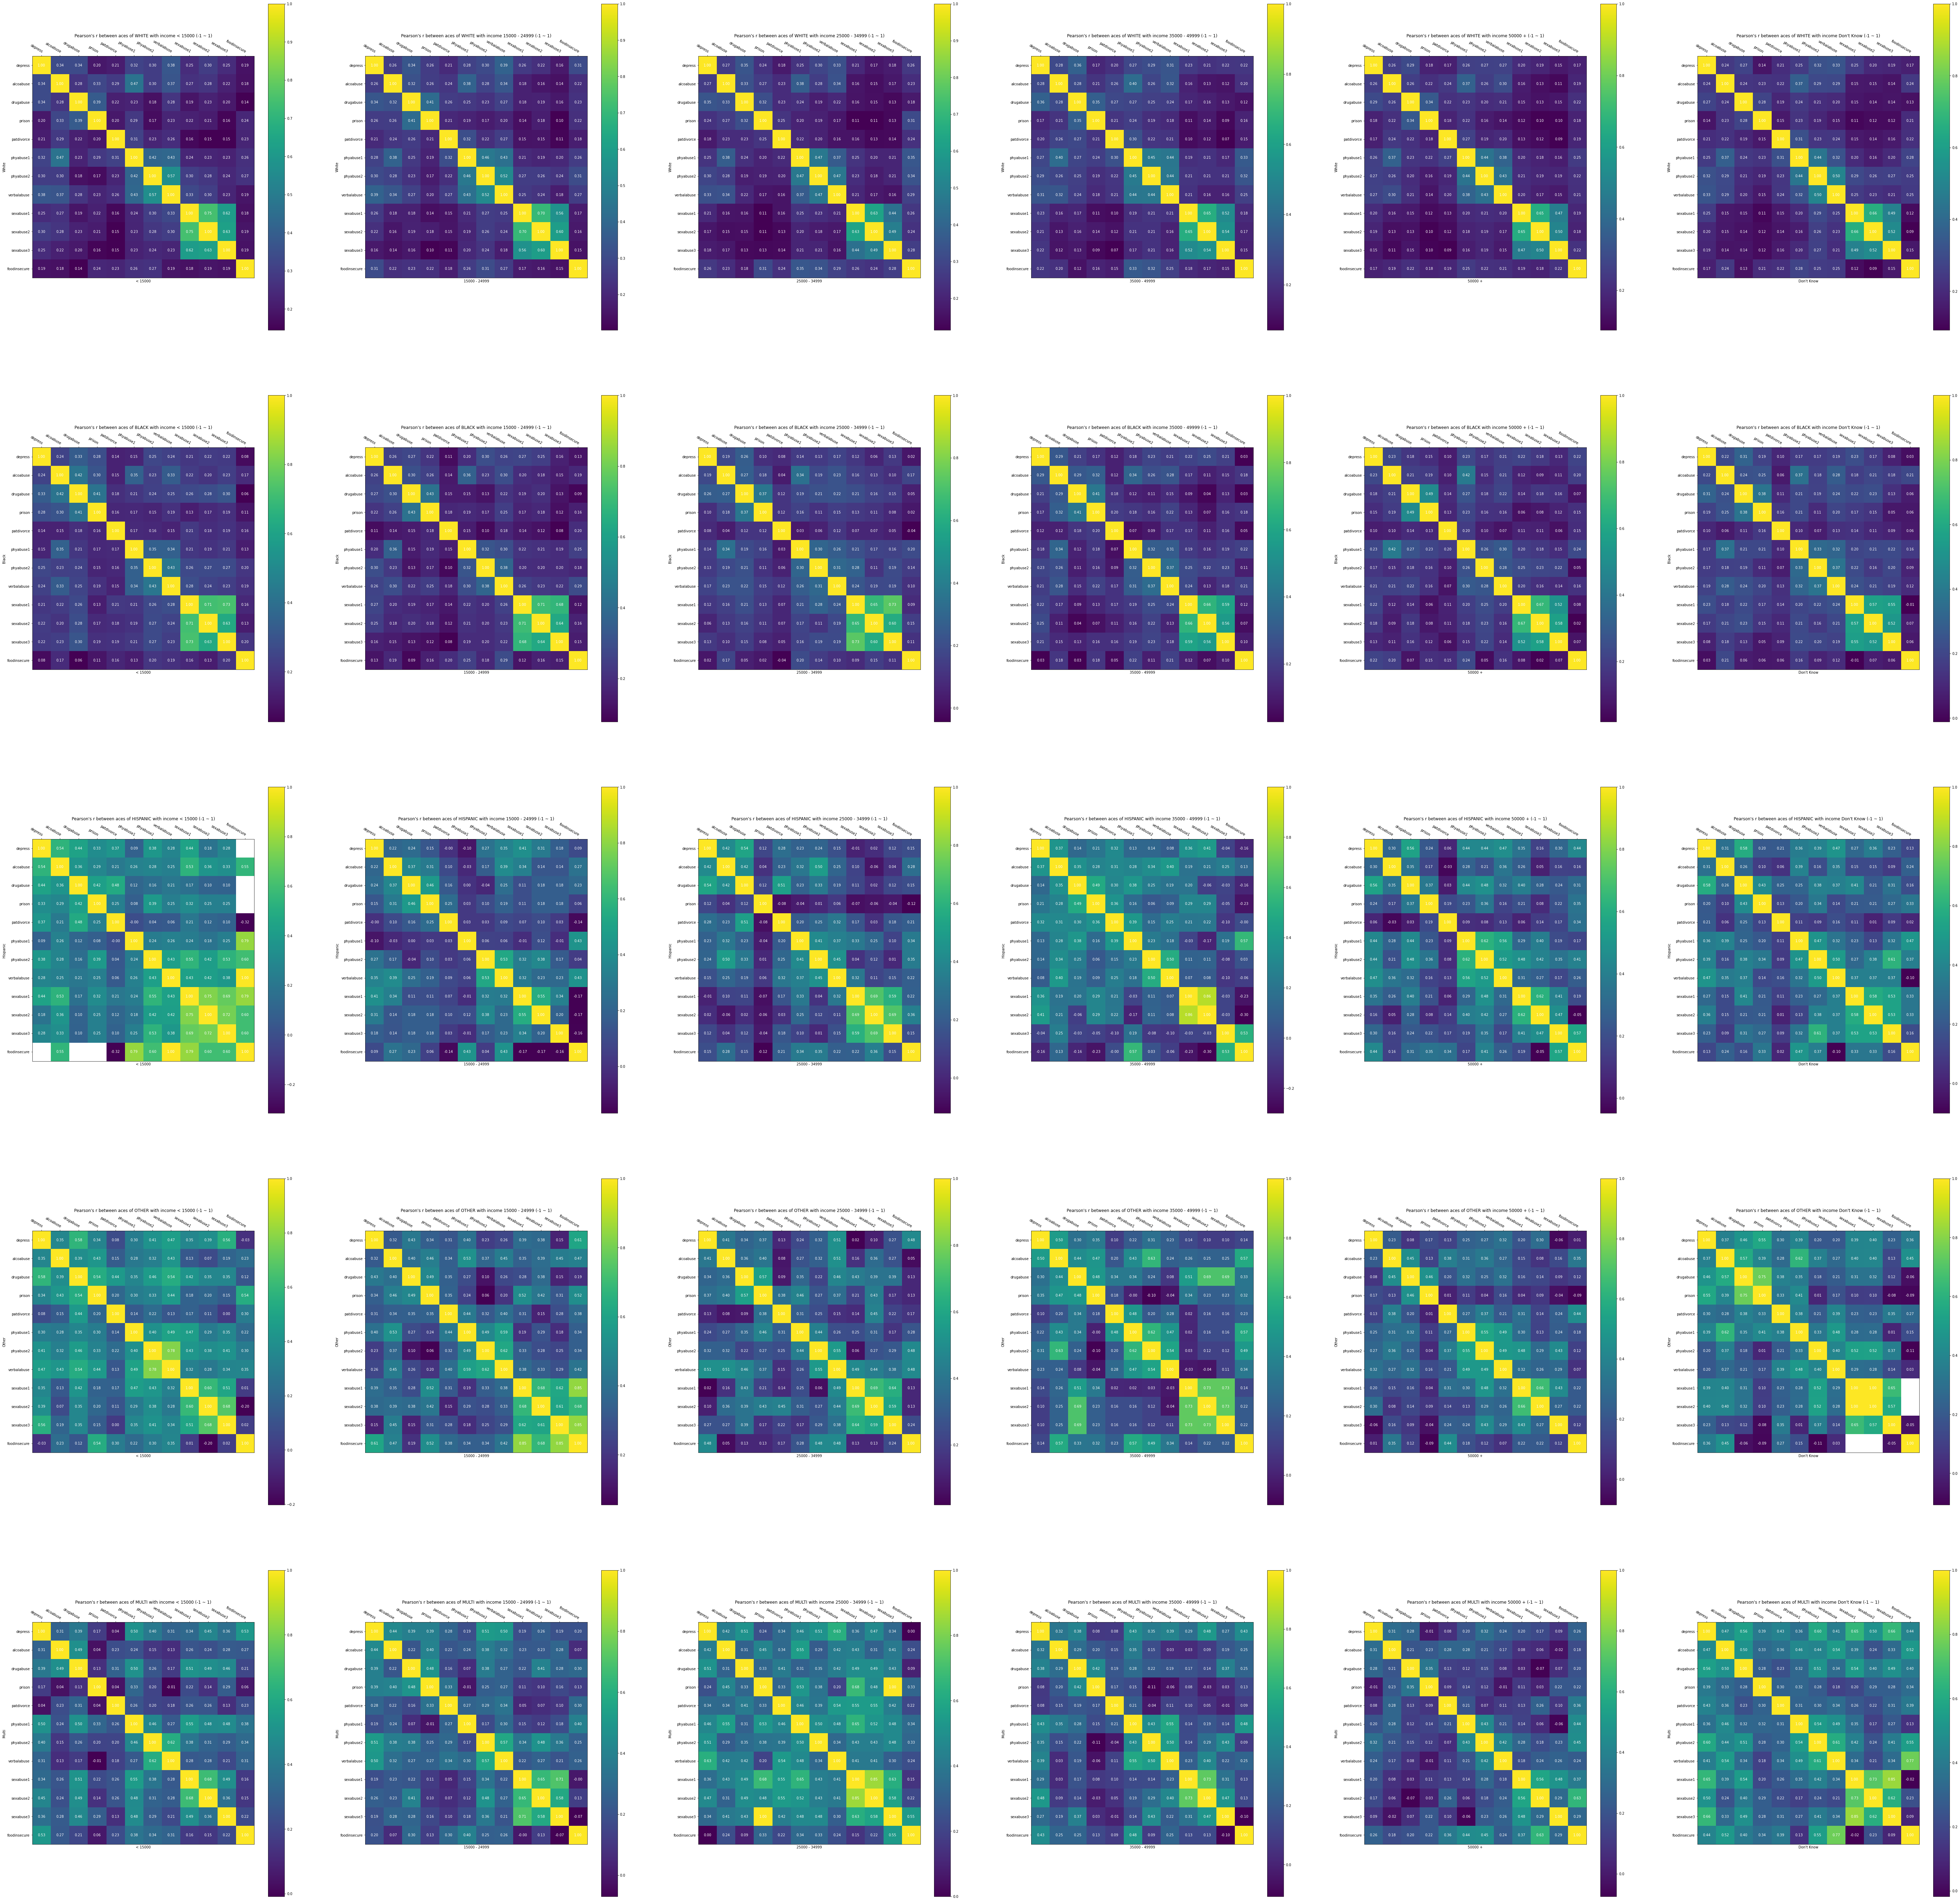

In [68]:
fig, axs = plt.subplots(len(race_list), len(income_list), figsize = (100, 100))
for r_index in range(len(race_list)):
    for i_index in range(len(income_list)):
        r = list(race_list.keys())[r_index]
        i = list(income_list.keys())[i_index]
        
        ri_dist = ri_group_psr[r][i]
        ax = axs[r_index, i_index]
        im = ax.imshow(ri_dist.to_numpy())
        cbar = ax.figure.colorbar(im, ax = ax)
        cbar.ax.set_ylabel('', rotation = -90, va = 'bottom')

        ax.set_xticks(np.arange(len(ace_list)))
        ax.set_yticks(np.arange(len(ace_list)))
        # ... and label them with the respective list entries
        ax.set_xticklabels(list(ace_list.values()))
        ax.set_yticklabels(list(ace_list.values()))

        ax.tick_params(top=True, bottom=False,
                           labeltop=True, labelbottom=False)

        ax.set_title('Pearson\'s r between aces of ' + \
                     race_list[r].upper() + ' with income ' + 
                     income_list[i] + ' (-1 ~ 1)')

        plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
                     rotation_mode="anchor")

        for m in range(len(ace_list)):
            for n in range(len(ace_list)):
                text = ax.text(n, m, '{:.2f}'.format(ri_dist.to_numpy()[m, n]),
                               ha="center", va="center", color="w")

        ax.set(xlabel=income_list[i], ylabel=race_list[r])

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
plt.show()
# plt.savefig('co_rel_psr.pdf')